In [1]:
# importing required libraries
import matplotlib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import pyvista as pv
import vtk
import os
from vtk import vtkStructuredPoints
from skimage import io, transform
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib.colors as mcolors

In [2]:
df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Patch13_9/Amateur/FinalAmateurPlayersDataset2.csv", dtype = {'skillSlot': str, 'buildingType': str, 'lane': str, 'monster': str, "itemName": str})
df

gameId  team       summoner region  champion  timestamp  \
0      EUW1_6390658537   Red    anonymous 8   euw1  JarvanIV   0.000000   
1      EUW1_6390658537   Red    anonymous 8   euw1  JarvanIV   1.000367   
2      EUW1_6390658537   Red    anonymous 8   euw1  JarvanIV   0.086533   
3      EUW1_6390658537   Red    anonymous 8   euw1  JarvanIV   0.095500   
4      EUW1_6390658537   Red    anonymous 8   euw1  JarvanIV   0.115067   
...                ...   ...            ...    ...       ...        ...   
64080  EUW1_6407761926  Blue  anonymous 172   euw1     Viego  15.004650   
64081  EUW1_6407761926  Blue  anonymous 172   euw1     Viego  16.005033   
64082  EUW1_6407761926  Blue  anonymous 172   euw1     Viego  15.268667   
64083  EUW1_6407761926  Blue  anonymous 172   euw1     Viego  15.639450   
64084  EUW1_6407761926  Blue  anonymous 172   euw1     Viego  16.162917   

       coordinate_x  coordinate_y  level  minionsKilled  ...  trueDamageTaken  \
0           14539.0       14394.0    1.0            0.0  ...              0.0   
1            9438.0        5576.0    1.0            0.0  ...              0.0   
2               NaN           NaN    NaN            NaN  ...              NaN   
3               NaN           NaN    NaN            NaN  ...              NaN   
4               NaN           NaN    NaN            NaN  ...              NaN   
...             ...           ...    ...            ...  ...              ...   
64080       10066.0        5786.0    8.0            2.0  ...            532.0   
64081        1211.0        7279.0    9.0            3.0  ...            532.0   
64082           NaN           NaN    NaN            NaN  ...              NaN   
64083           NaN           NaN    NaN            NaN  ...              NaN   
64084         933.0        7597.0    9.0            6.0  ...            532.0   

       victory       eventType  skillSlot  buildingType  lane  monster  \
0        False             NaN        NaN           NaN   NaN      NaN   
1        False             NaN        NaN           NaN   NaN      NaN   
2        False  Item purchased        NaN           NaN   NaN      NaN   
3        False  Item purchased        NaN           NaN   NaN      NaN   
4        False  Item purchased        NaN           NaN   NaN      NaN   
...        ...             ...        ...           ...   ...      ...   
64080    False             NaN        NaN           NaN   NaN      NaN   
64081    False             NaN        NaN           NaN   NaN      NaN   
64082    False    SkillLevelUp        1.0           NaN   NaN      NaN   
64083    False  Item purchased        NaN           NaN   NaN      NaN   
64084    False             NaN        NaN           NaN   NaN      NaN   

               itemName    role  rank  
0                   NaN  JUNGLE  Iron  
1                   NaN  JUNGLE  Iron  
2         Health Potion  JUNGLE  Iron  
3        Scorchclaw Pup  JUNGLE  Iron  
4          Stealth Ward  JUNGLE  Iron  
...                 ...     ...   ...  
64080               NaN  JUNGLE  Gold  
64081               NaN  JUNGLE  Gold  
64082               NaN  JUNGLE  Gold  
64083  Plated Steelcaps  JUNGLE  Gold  
64084               NaN  JUNGLE  Gold  

[64085 rows x 56 columns]

In [3]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death")]
jungler_deaths_df

gameId  team       summoner region  champion  timestamp  \
15     EUW1_6390658537   Red    anonymous 8   euw1  JarvanIV   6.206050   
26     EUW1_6390658537   Red    anonymous 8   euw1  JarvanIV  11.782183   
33     EUW1_6390658537   Red    anonymous 8   euw1  JarvanIV  13.607883   
48     EUW1_6390658537   Red    anonymous 8   euw1  JarvanIV  18.484383   
54     EUW1_6390658537   Red    anonymous 8   euw1  JarvanIV  20.061300   
...                ...   ...            ...    ...       ...        ...   
64019  EUW1_6407810599   Red  anonymous 172   euw1     Viego  30.194417   
64052  EUW1_6407761926  Blue  anonymous 172   euw1     Viego   3.635767   
64060  EUW1_6407761926  Blue  anonymous 172   euw1     Viego   6.848700   
64075  EUW1_6407761926  Blue  anonymous 172   euw1     Viego  12.076533   
64078  EUW1_6407761926  Blue  anonymous 172   euw1     Viego  13.335150   

       coordinate_x  coordinate_y  level  minionsKilled  ...  trueDamageTaken  \
15          10554.0        8703.0    NaN            NaN  ...              NaN   
26            825.0        9975.0    NaN            NaN  ...              NaN   
33           8685.0        6583.0    NaN            NaN  ...              NaN   
48           2004.0        7767.0    NaN            NaN  ...              NaN   
54          10027.0        5606.0    NaN            NaN  ...              NaN   
...             ...           ...    ...            ...  ...              ...   
64019        6263.0        7130.0    NaN            NaN  ...              NaN   
64052       11589.0        2129.0    NaN            NaN  ...              NaN   
64060       11220.0        4287.0    NaN            NaN  ...              NaN   
64075       11809.0        2140.0    NaN            NaN  ...              NaN   
64078        4986.0        6000.0    NaN            NaN  ...              NaN   

       victory  eventType  skillSlot  buildingType  lane  monster  itemName  \
15       False      Death        NaN           NaN   NaN      NaN       NaN   
26       False      Death        NaN           NaN   NaN      NaN       NaN   
33       False      Death        NaN           NaN   NaN      NaN       NaN   
48       False      Death        NaN           NaN   NaN      NaN       NaN   
54       False      Death        NaN           NaN   NaN      NaN       NaN   
...        ...        ...        ...           ...   ...      ...       ...   
64019     True      Death        NaN           NaN   NaN      NaN       NaN   
64052    False      Death        NaN           NaN   NaN      NaN       NaN   
64060    False      Death        NaN           NaN   NaN      NaN       NaN   
64075    False      Death        NaN           NaN   NaN      NaN       NaN   
64078    False      Death        NaN           NaN   NaN      NaN       NaN   

         role  rank  
15     JUNGLE  Iron  
26     JUNGLE  Iron  
33     JUNGLE  Iron  
48     JUNGLE  Iron  
54     JUNGLE  Iron  
...       ...   ...  
64019  JUNGLE  Gold  
64052  JUNGLE  Gold  
64060  JUNGLE  Gold  
64075  JUNGLE  Gold  
64078  JUNGLE  Gold  

[4800 rows x 56 columns]

In [4]:
print("This dataset contains {} matches in which the jungler died at least once".format(len(np.unique(jungler_deaths_df["gameId"]))))

This dataset contains 727 matches in which the jungler died at least once


In [5]:
print("{} players died a total of {} times".format(len(np.unique(jungler_deaths_df["summoner"])), jungler_deaths_df.shape[0]))

24 players died a total of 4800 times


In [6]:
print("This Dataset contains an average of {} deaths per game".format((jungler_deaths_df.shape[0]/len(np.unique(jungler_deaths_df["gameId"])))))

This Dataset contains an average of 6.6024759284731775 deaths per game


In [4]:
blueSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
blueSide_jungler_deaths_df

gameId  team       summoner region  champion  timestamp  \
159    EUW1_6390357282  Blue    anonymous 8   euw1  JarvanIV   0.947567   
201    EUW1_6390357282  Blue    anonymous 8   euw1  JarvanIV  21.346967   
229    EUW1_6390357282  Blue    anonymous 8   euw1  JarvanIV  29.740000   
235    EUW1_6390357282  Blue    anonymous 8   euw1  JarvanIV  31.812333   
239    EUW1_6390357282  Blue    anonymous 8   euw1  JarvanIV  33.597550   
...                ...   ...            ...    ...       ...        ...   
63923  EUW1_6407724842  Blue  anonymous 155   euw1      Kayn  19.345400   
64052  EUW1_6407761926  Blue  anonymous 172   euw1     Viego   3.635767   
64060  EUW1_6407761926  Blue  anonymous 172   euw1     Viego   6.848700   
64075  EUW1_6407761926  Blue  anonymous 172   euw1     Viego  12.076533   
64078  EUW1_6407761926  Blue  anonymous 172   euw1     Viego  13.335150   

       coordinate_x  coordinate_y  level  minionsKilled  ...  trueDamageTaken  \
159          8896.0        6325.0    NaN            NaN  ...              NaN   
201         10686.0        1274.0    NaN            NaN  ...              NaN   
229         10966.0        5200.0    NaN            NaN  ...              NaN   
235          4793.0        6047.0    NaN            NaN  ...              NaN   
239          1960.0        2504.0    NaN            NaN  ...              NaN   
...             ...           ...    ...            ...  ...              ...   
63923        6868.0        4248.0    NaN            NaN  ...              NaN   
64052       11589.0        2129.0    NaN            NaN  ...              NaN   
64060       11220.0        4287.0    NaN            NaN  ...              NaN   
64075       11809.0        2140.0    NaN            NaN  ...              NaN   
64078        4986.0        6000.0    NaN            NaN  ...              NaN   

       victory  eventType  skillSlot  buildingType  lane  monster  itemName  \
159      False      Death        NaN           NaN   NaN      NaN       NaN   
201      False      Death        NaN           NaN   NaN      NaN       NaN   
229      False      Death        NaN           NaN   NaN      NaN       NaN   
235      False      Death        NaN           NaN   NaN      NaN       NaN   
239      False      Death        NaN           NaN   NaN      NaN       NaN   
...        ...        ...        ...           ...   ...      ...       ...   
63923     True      Death        NaN           NaN   NaN      NaN       NaN   
64052    False      Death        NaN           NaN   NaN      NaN       NaN   
64060    False      Death        NaN           NaN   NaN      NaN       NaN   
64075    False      Death        NaN           NaN   NaN      NaN       NaN   
64078    False      Death        NaN           NaN   NaN      NaN       NaN   

         role  rank  
159    JUNGLE  Iron  
201    JUNGLE  Iron  
229    JUNGLE  Iron  
235    JUNGLE  Iron  
239    JUNGLE  Iron  
...       ...   ...  
63923  JUNGLE  Gold  
64052  JUNGLE  Gold  
64060  JUNGLE  Gold  
64075  JUNGLE  Gold  
64078  JUNGLE  Gold  

[2564 rows x 56 columns]

In [5]:
gamesBlueSide = len(np.unique(blueSide_jungler_deaths_df["gameId"]))
gamesBlueSide

390

In [9]:
players_df = np.unique(blueSide_jungler_deaths_df["summoner"])
for player in players_df:
    temp_df = blueSide_jungler_deaths_df[blueSide_jungler_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 114 played 4 matches
anonymous 115 played 12 matches
anonymous 129 played 2 matches
anonymous 138 played 2 matches
anonymous 141 played 16 matches
anonymous 153 played 8 matches
anonymous 155 played 25 matches
anonymous 161 played 11 matches
anonymous 172 played 55 matches
anonymous 179 played 6 matches
anonymous 21 played 46 matches
anonymous 22 played 11 matches
anonymous 3 played 1 matches
anonymous 34 played 17 matches
anonymous 36 played 17 matches
anonymous 37 played 29 matches
anonymous 44 played 1 matches
anonymous 68 played 3 matches
anonymous 79 played 23 matches
anonymous 8 played 15 matches
anonymous 90 played 20 matches
anonymous 94 played 7 matches
anonymous 96 played 59 matches


In [10]:
print("Blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSide_jungler_deaths_df["gameId"]))))

Blue side contains 390 matches in which the jungler died at least once


In [11]:
print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSide_jungler_deaths_df["summoner"])), blueSide_jungler_deaths_df.shape[0]))

23 players died a total of 2564 times on the blue side


In [6]:
redSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
redSide_jungler_deaths_df

gameId team       summoner region  champion  timestamp  \
15     EUW1_6390658537  Red    anonymous 8   euw1  JarvanIV   6.206050   
26     EUW1_6390658537  Red    anonymous 8   euw1  JarvanIV  11.782183   
33     EUW1_6390658537  Red    anonymous 8   euw1  JarvanIV  13.607883   
48     EUW1_6390658537  Red    anonymous 8   euw1  JarvanIV  18.484383   
54     EUW1_6390658537  Red    anonymous 8   euw1  JarvanIV  20.061300   
...                ...  ...            ...    ...       ...        ...   
63601  EUW1_6408276184  Red  anonymous 114   euw1     Sylas  26.395250   
63995  EUW1_6407810599  Red  anonymous 172   euw1     Viego  19.547567   
64004  EUW1_6407810599  Red  anonymous 172   euw1     Viego  25.212050   
64012  EUW1_6407810599  Red  anonymous 172   euw1     Viego  27.111500   
64019  EUW1_6407810599  Red  anonymous 172   euw1     Viego  30.194417   

       coordinate_x  coordinate_y  level  minionsKilled  ...  trueDamageTaken  \
15          10554.0        8703.0    NaN            NaN  ...              NaN   
26            825.0        9975.0    NaN            NaN  ...              NaN   
33           8685.0        6583.0    NaN            NaN  ...              NaN   
48           2004.0        7767.0    NaN            NaN  ...              NaN   
54          10027.0        5606.0    NaN            NaN  ...              NaN   
...             ...           ...    ...            ...  ...              ...   
63601       13272.0       14153.0    NaN            NaN  ...              NaN   
63995       13405.0        3908.0    NaN            NaN  ...              NaN   
64004        8455.0        9787.0    NaN            NaN  ...              NaN   
64012        7934.0        8580.0    NaN            NaN  ...              NaN   
64019        6263.0        7130.0    NaN            NaN  ...              NaN   

       victory  eventType  skillSlot  buildingType  lane  monster  itemName  \
15       False      Death        NaN           NaN   NaN      NaN       NaN   
26       False      Death        NaN           NaN   NaN      NaN       NaN   
33       False      Death        NaN           NaN   NaN      NaN       NaN   
48       False      Death        NaN           NaN   NaN      NaN       NaN   
54       False      Death        NaN           NaN   NaN      NaN       NaN   
...        ...        ...        ...           ...   ...      ...       ...   
63601    False      Death        NaN           NaN   NaN      NaN       NaN   
63995     True      Death        NaN           NaN   NaN      NaN       NaN   
64004     True      Death        NaN           NaN   NaN      NaN       NaN   
64012     True      Death        NaN           NaN   NaN      NaN       NaN   
64019     True      Death        NaN           NaN   NaN      NaN       NaN   

         role    rank  
15     JUNGLE    Iron  
26     JUNGLE    Iron  
33     JUNGLE    Iron  
48     JUNGLE    Iron  
54     JUNGLE    Iron  
...       ...     ...  
63601  JUNGLE  Bronze  
63995  JUNGLE    Gold  
64004  JUNGLE    Gold  
64012  JUNGLE    Gold  
64019  JUNGLE    Gold  

[2236 rows x 56 columns]

In [7]:
gamesRedSide = len(np.unique(redSide_jungler_deaths_df["gameId"]))
gamesRedSide

337

In [8]:
redSideVictory_jungler_deaths_df = redSide_jungler_deaths_df[redSide_jungler_deaths_df["victory"] == True]
blueSideVictory_jungler_deaths_df = blueSide_jungler_deaths_df[blueSide_jungler_deaths_df["victory"] == True]

winsRedSide = len(np.unique(redSideVictory_jungler_deaths_df["gameId"]))
winsBlueSide = len(np.unique(blueSideVictory_jungler_deaths_df["gameId"]))

print("Red Team Victories: {}".format(winsRedSide))
print("Blue Team Victories: {}".format(winsBlueSide))

Red Team Victories: 162
Blue Team Victories: 202


In [15]:
players_df = np.unique(redSide_jungler_deaths_df["summoner"])
for player in players_df:
    temp_df = redSide_jungler_deaths_df[redSide_jungler_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 106 played 2 matches
anonymous 114 played 5 matches
anonymous 115 played 13 matches
anonymous 138 played 2 matches
anonymous 141 played 4 matches
anonymous 153 played 6 matches
anonymous 155 played 19 matches
anonymous 161 played 15 matches
anonymous 172 played 34 matches
anonymous 179 played 2 matches
anonymous 21 played 42 matches
anonymous 22 played 3 matches
anonymous 3 played 1 matches
anonymous 34 played 19 matches
anonymous 36 played 26 matches
anonymous 37 played 25 matches
anonymous 44 played 1 matches
anonymous 68 played 4 matches
anonymous 79 played 23 matches
anonymous 8 played 15 matches
anonymous 90 played 20 matches
anonymous 94 played 2 matches
anonymous 96 played 54 matches


In [16]:
print("Red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSide_jungler_deaths_df["gameId"]))))

Red side contains 337 matches in which the jungler died at least once


In [17]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_jungler_deaths_df["summoner"])), redSide_jungler_deaths_df.shape[0]))

23 players died a total of 2236 times on the red side


function to visualize the results

In [18]:
def visualizeResults(df, data_scaled, model, team, kmeans, cluster_colors,details = "None"):
    # Visualize the results
    image = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Riot Games API/map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    #scatter = ax.scatter(df['coordinate_x'], df['coordinate_y'], c=df['cluster'], cmap="plasma")
    #colors = np.array(["blueviolet", "yellow", "lime", "crimson"])
    
    for c in np.unique(df["cluster"]):
        temp_df = df[df["cluster"] == c]
        scatter = ax.scatter(temp_df['coordinate_x'], temp_df['coordinate_y'], color = cluster_colors[c])
    plt.xlabel('X')
    plt.ylabel('Y')


    if(details == "None"):
        title = "Jungle Players' Deaths in the " + team + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"]) 
    else:
        title = "Jungle Players' Deaths in the " + team + " " + details + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"])
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(["0", "1", "2", "3"], frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")

    plt.show()

    #drawSillouette(data_scaled, model.labels_, silhouetteTitle)
    silhouette_visualizer(kmeans, data_scaled, colors=cluster_colors, title = title)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))
    print("{}".format(df["cluster"].value_counts()))

    colors = []
    for color in cluster_colors:
        colors.append(matplotlib.colors.cnames[color])


    return colors

function to view the average values in each cluster

In [19]:
def clusterMeanValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Mean values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.mean(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.mean(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.mean(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the standard deviation in each cluster

In [20]:
def clusterStandardDeviation(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Standard deviation for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.std(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.std(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.std(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the max and min values in each cluster

In [21]:
def clusterMinMaxValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "max coordinate_x": [],
    "min coordinate_x": [],
    "max coordinate_y": [],
    "min coordinate_y": [],
    "max timestamp": [],
    "min timestamp": []}

    print("Max and Min values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["max coordinate_x"].append(np.amax(temporary_df["coordinate_x"]))
        D["min coordinate_x"].append(np.amin(temporary_df["coordinate_x"]))
        D["max coordinate_y"].append(np.amax(temporary_df["coordinate_y"]))
        D["min coordinate_y"].append(np.amin(temporary_df["coordinate_y"]))
        D["max timestamp"].append(np.amax(temporary_df["timestamp"]))
        D["min timestamp"].append(np.amin(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

Function to view the number of deaths in each stage of the game (early, mid, and late game) for each cluster:

In [22]:
def stagesPerClusterV2(df, colors):
    c = 0

    #for cluster in np.unique(df["cluster"]):
        #temporary_df = df[df["cluster"] == cluster].copy()
    temporary_df = df.sort_values(by=["timestamp"])
    stage = []
    for time in temporary_df["timestamp"]:
        if(time == -1):
            stage.append("early game")
        elif(time == 0):
            stage.append("mid game")
        else:
            stage.append("late game")
    
    stage = np.array(stage)
    temporary_df["stages"] = stage
    plt.figure(figsize=(14, 6))
    g = sns.histplot(x='stages', data=temporary_df, hue="cluster", palette=colors, multiple="dodge", shrink=.9);
    plt.title('Game stages in the clusters')
    ax=g.axes
    c += 1

Function that returns a kernel density estimate (KDE) plot of the timestamps in each cluster:

In [23]:

def kdeTimestamp(profiling_df, cluster_colors):
    c = {"color": cluster_colors}

    sns.set_style("whitegrid")
    clusters = profiling_df.cluster.value_counts().index
    sea = sns.FacetGrid(profiling_df, row = "cluster",
                        row_order = clusters,
                        height = 1.7, aspect = 4, hue="cluster", hue_kws=c)
    
    sea.map(sns.kdeplot, "timestamp")
    sea.set(yticklabels=[])
    sea.set(ylabel=None)
    
    #move overall title up
    sea.fig.subplots_adjust(top=0.9)

    #add overall title
    sea.fig.suptitle("Timestamp KDE plot:")
    plt.show()

---
### Iron Players

#### Clustering Red Team Victory

In [24]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Iron")]

redSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)]
redSideVictory_df

gameId team     summoner region  champion  timestamp  \
476    EUW1_6389189627  Red  anonymous 8   euw1  JarvanIV   7.085800   
490    EUW1_6389189627  Red  anonymous 8   euw1  JarvanIV  12.553583   
524    EUW1_6389189627  Red  anonymous 8   euw1  JarvanIV  23.419633   
537    EUW1_6389189627  Red  anonymous 8   euw1  JarvanIV  27.492133   
544    EUW1_6389189627  Red  anonymous 8   euw1  JarvanIV  30.037567   
552    EUW1_6389189627  Red  anonymous 8   euw1  JarvanIV  32.232483   
764    EUW1_6388081267  Red  anonymous 8   euw1  JarvanIV   8.029067   
1253   EUW1_6387024509  Red  anonymous 8   euw1  JarvanIV   3.575017   
54834  EUW1_6406430413  Red  anonymous 8   euw1  Pantheon   4.624717   
54848  EUW1_6406430413  Red  anonymous 8   euw1  Pantheon   9.534967   
54861  EUW1_6406430413  Red  anonymous 8   euw1  Pantheon  14.648983   
54894  EUW1_6406430413  Red  anonymous 8   euw1  Pantheon  23.093700   
54904  EUW1_6406430413  Red  anonymous 8   euw1  Pantheon  27.573800   
54920  EUW1_6406430413  Red  anonymous 8   euw1  Pantheon  34.310117   
54927  EUW1_6406430413  Red  anonymous 8   euw1  Pantheon  36.372867   
61213  EUW1_6407508237  Red  anonymous 3   euw1      Kayn   5.866733   
61228  EUW1_6407508237  Red  anonymous 3   euw1      Kayn  11.028333   
61263  EUW1_6407508237  Red  anonymous 3   euw1      Kayn  23.850483   
61275  EUW1_6407508237  Red  anonymous 3   euw1      Kayn  28.755383   

       coordinate_x  coordinate_y  level  minionsKilled  ...  trueDamageTaken  \
476         13316.0        4381.0    NaN            NaN  ...              NaN   
490          1556.0       11508.0    NaN            NaN  ...              NaN   
524          6943.0       12893.0    NaN            NaN  ...              NaN   
537         12014.0        1921.0    NaN            NaN  ...              NaN   
544          9956.0        6567.0    NaN            NaN  ...              NaN   
552         11471.0        4614.0    NaN            NaN  ...              NaN   
764         10056.0        4678.0    NaN            NaN  ...              NaN   
1253         8149.0        7679.0    NaN            NaN  ...              NaN   
54834       12319.0        2287.0    NaN            NaN  ...              NaN   
54848       11126.0        1850.0    NaN            NaN  ...              NaN   
54861        8745.0        5501.0    NaN            NaN  ...              NaN   
54894        3378.0        8602.0    NaN            NaN  ...              NaN   
54904        1382.0        6992.0    NaN            NaN  ...              NaN   
54920        4894.0       11541.0    NaN            NaN  ...              NaN   
54927        3379.0        3078.0    NaN            NaN  ...              NaN   
61213       12680.0        2244.0    NaN            NaN  ...              NaN   
61228        1840.0       12328.0    NaN            NaN  ...              NaN   
61263        9646.0        4330.0    NaN            NaN  ...              NaN   
61275        1912.0        1214.0    NaN            NaN  ...              NaN   

       victory  eventType  skillSlot  buildingType  lane  monster  itemName  \
476       True      Death        NaN           NaN   NaN      NaN       NaN   
490       True      Death        NaN           NaN   NaN      NaN       NaN   
524       True      Death        NaN           NaN   NaN      NaN       NaN   
537       True      Death        NaN           NaN   NaN      NaN       NaN   
544       True      Death        NaN           NaN   NaN      NaN       NaN   
552       True      Death        NaN           NaN   NaN      NaN       NaN   
764       True      Death        NaN           NaN   NaN      NaN       NaN   
1253      True      Death        NaN           NaN   NaN      NaN       NaN   
54834     True      Death        NaN           NaN   NaN      NaN       NaN   
54848     True      Death        NaN           NaN   NaN      NaN       NaN   
54861     True      Death        NaN           NaN   NaN      NaN       NaN   
54894 

In [25]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)].copy()

In [26]:
redSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [27]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

5

In [28]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

31.25

In [29]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_jungler_deaths_df.shape[0]) * 100
winRateRedSide

0.8497316636851521

In [30]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 3 won 1 matches on the red side
anonymous 3 has an average of 4.0 deaths per game when winning on the red side

anonymous 8 won 4 matches on the red side
anonymous 8 has an average of 3.75 deaths per game when winning on the red side



In [31]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 5 matches in which the jungler died at least once
2 players died a total of 19 times on the red side
Victory games on red side contains an average of 3.8 deaths per game


In [32]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
476         13316.0        4381.0   7.085800
490          1556.0       11508.0  12.553583
524          6943.0       12893.0  23.419633
537         12014.0        1921.0  27.492133
544          9956.0        6567.0  30.037567
552         11471.0        4614.0  32.232483
764         10056.0        4678.0   8.029067
1253         8149.0        7679.0   3.575017
54834       12319.0        2287.0   4.624717
54848       11126.0        1850.0   9.534967
54861        8745.0        5501.0  14.648983
54894        3378.0        8602.0  23.093700
54904        1382.0        6992.0  27.573800
54920        4894.0       11541.0  34.310117
54927        3379.0        3078.0  36.372867
61213       12680.0        2244.0   5.866733
61228        1840.0       12328.0  11.028333
61263        9646.0        4330.0  23.850483
61275        1912.0        1214.0  28.755383

Time discretization

In [33]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [34]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [35]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [36]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [37]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
476        1.368757     -0.438920         -1
490       -1.456718      1.480274         -1
524       -0.162429      1.853234          0
537        1.055936     -1.101362          1
544        0.561478      0.149737          1
552        0.925474     -0.376177          1
764        0.585504     -0.358943         -1
1253       0.127326      0.449182         -1
54834      1.129216     -1.002803         -1
54848      0.842584     -1.120481         -1
54861      0.270522     -0.137321         -1
54894     -1.018961      0.697732          0
54904     -1.498523      0.264183          1
54920     -0.654725      1.489161          1
54927     -1.018721     -0.789799          1
61213      1.215950     -1.014383         -1
61228     -1.388483      1.701088         -1
61263      0.486997     -0.452654          0
61275     -1.371185     -1.291746          1

In [38]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.36855814149347105
Silhouette score for k=3: 0.41091120032109485
Silhouette score for k=4: 0.4517190002203794
Silhouette score for k=5: 0.4631809223587571
Silhouette score for k=6: 0.4564001982717219
Silhouette score for k=7: 0.4601293191781162
Silhouette score for k=8: 0.4266849333528051
Silhouette score for k=9: 0.38706601410825275
Silhouette score for k=10: 0.35145568200588323
Silhouette score for k=11: 0.36738166206654405
Silhouette score for k=12: 0.33322366823237964
Silhouette score for k=13: 0.3198217865616726
Silhouette score for k=14: 0.2890213822001696
Silhouette score for k=15: 0.2323112101877453


K-Means with k = 3

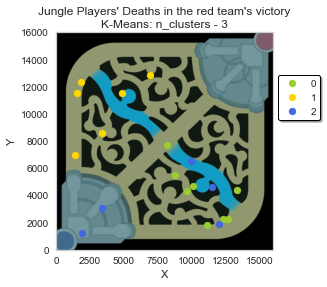

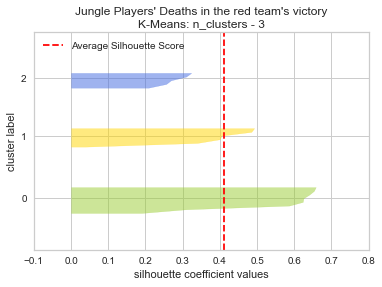

Silhouette score: 0.41091120032109485
0    8
1    6
2    5
Name: cluster, dtype: int64

Inertia: 18.223879635031825

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  10754.625000       4118.75     -0.875
1        1   3332.166667      10644.00      0.000
2        2   7746.400000       3478.80      1.000

In [39]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "royalblue"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [40]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1781.779303   1838.116546   0.330719
1        1   2027.478764   2119.427202   0.816497
2        2   4244.568134   1925.739276   0.000000

In [41]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           13316.0            8149.0            7679.0   
1        1            6943.0            1382.0           12893.0   
2        2           12014.0            1912.0            6567.0   

   min coordinate_y  max timestamp  min timestamp  
0            1850.0              0             -1  
1            6992.0              1             -1  
2            1214.0              1              1

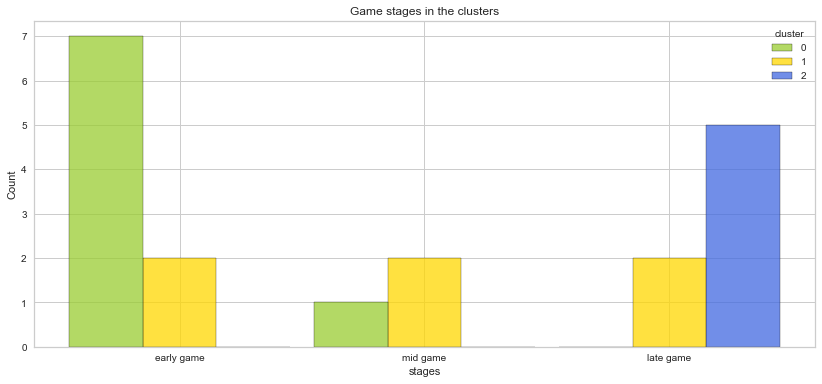

In [42]:
stagesPerClusterV2(redSideVictory_df, colors)

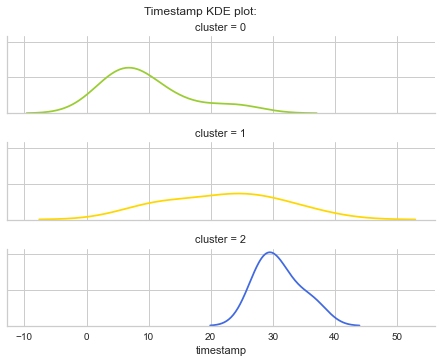

In [43]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [44]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
JarvanIV        3
Pantheon        1
Kayn            1

Deaths with each champion:

In [45]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



JarvanIV    8
Pantheon    7
Kayn        4
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [46]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 3 champions when they won on the red side

Cluster 0 - died with 3 champions:
 ['JarvanIV' 'Kayn' 'Pantheon']
JarvanIV    3
Pantheon    3
Kayn        2
Name: champion, dtype: int64

Cluster 1 - died with 3 champions:
 ['JarvanIV' 'Kayn' 'Pantheon']
Pantheon    3
JarvanIV    2
Kayn        1
Name: champion, dtype: int64

Cluster 2 - died with 3 champions:
 ['JarvanIV' 'Kayn' 'Pantheon']
JarvanIV    3
Pantheon    1
Kayn        1
Name: champion, dtype: int64



---
#### Clustering Red Team Defeat

In [47]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Iron")]

redSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team     summoner region  champion  timestamp  \
15     EUW1_6390658537  Red  anonymous 8   euw1  JarvanIV   6.206050   
26     EUW1_6390658537  Red  anonymous 8   euw1  JarvanIV  11.782183   
33     EUW1_6390658537  Red  anonymous 8   euw1  JarvanIV  13.607883   
48     EUW1_6390658537  Red  anonymous 8   euw1  JarvanIV  18.484383   
54     EUW1_6390658537  Red  anonymous 8   euw1  JarvanIV  20.061300   
...                ...  ...          ...    ...       ...        ...   
61412  EUW1_6407934398  Red  anonymous 8   euw1      Udyr  18.132350   
61416  EUW1_6407934398  Red  anonymous 8   euw1      Udyr  19.380217   
61421  EUW1_6407934398  Red  anonymous 8   euw1      Udyr  21.242583   
61432  EUW1_6407934398  Red  anonymous 8   euw1      Udyr  25.172950   
61453  EUW1_6407934398  Red  anonymous 8   euw1      Udyr  31.960783   

       coordinate_x  coordinate_y  level  minionsKilled  ...  trueDamageTaken  \
15          10554.0        8703.0    NaN            NaN  ...              NaN   
26            825.0        9975.0    NaN            NaN  ...              NaN   
33           8685.0        6583.0    NaN            NaN  ...              NaN   
48           2004.0        7767.0    NaN            NaN  ...              NaN   
54          10027.0        5606.0    NaN            NaN  ...              NaN   
...             ...           ...    ...            ...  ...              ...   
61412       11654.0        6753.0    NaN            NaN  ...              NaN   
61416        8199.0        8340.0    NaN            NaN  ...              NaN   
61421        9775.0        9338.0    NaN            NaN  ...              NaN   
61432        5185.0        9416.0    NaN            NaN  ...              NaN   
61453        4723.0        9184.0    NaN            NaN  ...              NaN   

       victory  eventType  skillSlot  buildingType  lane  monster  itemName  \
15       False      Death        NaN           NaN   NaN      NaN       NaN   
26       False      Death        NaN           NaN   NaN      NaN       NaN   
33       False      Death        NaN           NaN   NaN      NaN       NaN   
48       False      Death        NaN           NaN   NaN      NaN       NaN   
54       False      Death        NaN           NaN   NaN      NaN       NaN   
...        ...        ...        ...           ...   ...      ...       ...   
61412    False      Death        NaN           NaN   NaN      NaN       NaN   
61416    False      Death        NaN           NaN   NaN      NaN       NaN   
61421    False      Death        NaN           NaN   NaN      NaN       NaN   
61432    False      Death        NaN           NaN   NaN      NaN       NaN   
61453    False      Death        NaN           NaN   NaN      NaN       NaN   

         role  rank  
15     JUNGLE  Iron  
26     JUNGLE  Iron  
33     JUNGLE  Iron  
48     JUNGLE  Iron  
54     JUNGLE  Iron  
...       ...   ...  
61412  JUNGLE  Iron  
61416  JUNGLE  Iron  
61421  JUNGLE  Iron  
61432  JUNGLE  Iron  
61453  JUNGLE  Iron  

[79 rows x 56 columns]

In [48]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)].copy()

In [49]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 8 lost 11 matches on the red side
anonymous 8 has an average of 7.181818181818182 deaths per game when losing on the red side



In [50]:
print("Defeat games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 11 matches in which the jungler died at least once
1 players died a total of 79 times on the red side
Defeat games on red side contains an average of 7.181818181818182 deaths per game


In [51]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
15          10554.0        8703.0   6.206050
26            825.0        9975.0  11.782183
33           8685.0        6583.0  13.607883
48           2004.0        7767.0  18.484383
54          10027.0        5606.0  20.061300
...             ...           ...        ...
61412       11654.0        6753.0  18.132350
61416        8199.0        8340.0  19.380217
61421        9775.0        9338.0  21.242583
61432        5185.0        9416.0  25.172950
61453        4723.0        9184.0  31.960783

[79 rows x 3 columns]

Time discretization

In [52]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [53]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [54]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [55]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [56]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
15         0.550035     -0.060273         -1
26        -2.410351      0.418027         -1
33        -0.018673     -0.857440         -1
48        -2.051600     -0.412230          0
54         0.389677     -1.224814          0
...             ...           ...        ...
61412      0.884748     -0.793517          0
61416     -0.166555     -0.196769          0
61421      0.312997      0.178501          0
61432     -1.083670      0.207831          1
61453     -1.224249      0.120594          1

[79 rows x 3 columns]

In [57]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.30072562189421215
Silhouette score for k=3: 0.3380851728793889
Silhouette score for k=4: 0.31607204324499055
Silhouette score for k=5: 0.32616543468717735
Silhouette score for k=6: 0.32540305163057226
Silhouette score for k=7: 0.346592095016792
Silhouette score for k=8: 0.36544850266793677
Silhouette score for k=9: 0.37278200121891714
Silhouette score for k=10: 0.37027229025545705
Silhouette score for k=11: 0.4042754506928815
Silhouette score for k=12: 0.398486408554277
Silhouette score for k=13: 0.40181321978851586
Silhouette score for k=14: 0.41708251469199
Silhouette score for k=15: 0.44229966425100126
Silhouette score for k=16: 0.45497354697176057
Silhouette score for k=17: 0.46638554571916807
Silhouette score for k=18: 0.46289004922758126
Silhouette score for k=19: 0.47281951553040125
Silhouette score for k=20: 0.4989489565376797
Silhouette score for k=25: 0.5191380146638116


K-Means with k = 3

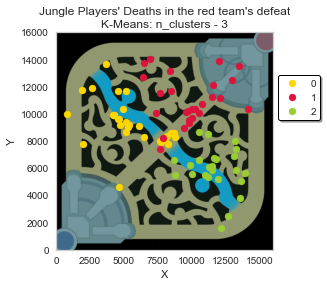

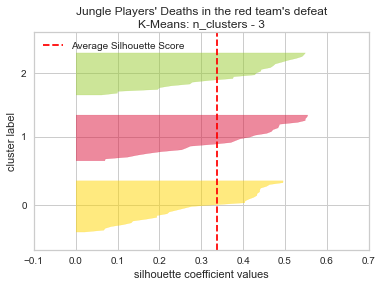

Silhouette score: 0.3380851728793889
0    29
1    26
2    24
Name: cluster, dtype: int64

Inertia: 94.22393926565154

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   5387.000000   9347.758621  -0.310345
1        1   9796.692308  11030.692308   0.692308
2        2  11667.750000   5929.875000  -0.083333

In [58]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "crimson", "yellowgreen"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [59]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2108.778009   1687.413970   0.699924
1        1   2091.209105   1741.735579   0.461538
2        2   1440.229011   1604.885284   0.812233

In [60]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            8776.0             825.0           13708.0   
1        1           14159.0            6382.0           14012.0   
2        2           13902.0            8685.0            8703.0   

   min coordinate_y  max timestamp  min timestamp  
0            4637.0              1             -1  
1            7453.0              1              0  
2            1578.0              1             -1

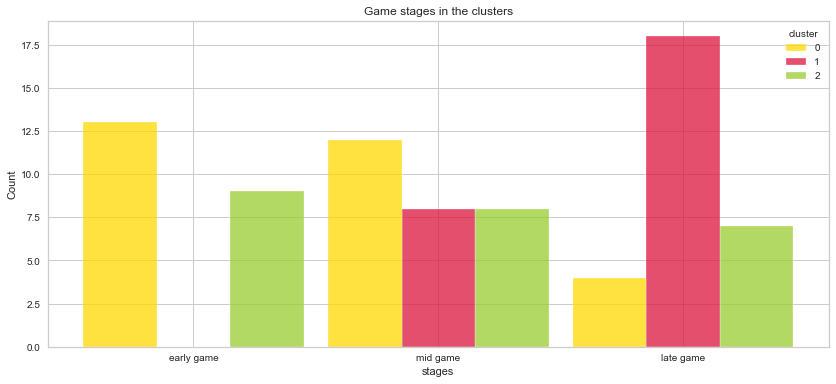

In [61]:
stagesPerClusterV2(redSideDefeat_df, colors)

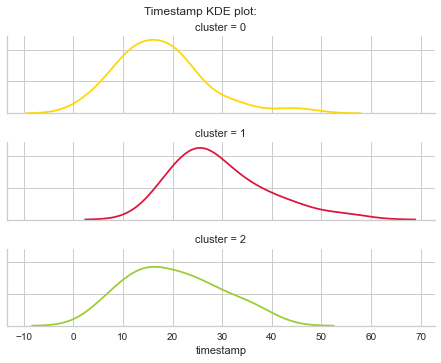

In [62]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [63]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
JarvanIV          5
Pantheon          3
Udyr              2
MonkeyKing        1

Deaths with each champion:

In [64]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



JarvanIV      33
Pantheon      23
Udyr          14
MonkeyKing     9
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [65]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 4 champions when they won on the red side

Cluster 0 - died with 4 champions:
 ['JarvanIV' 'MonkeyKing' 'Pantheon' 'Udyr']
JarvanIV      12
Pantheon       7
Udyr           7
MonkeyKing     3
Name: champion, dtype: int64

Cluster 1 - died with 4 champions:
 ['JarvanIV' 'MonkeyKing' 'Pantheon' 'Udyr']
JarvanIV      11
Pantheon       9
MonkeyKing     4
Udyr           2
Name: champion, dtype: int64

Cluster 2 - died with 4 champions:
 ['JarvanIV' 'MonkeyKing' 'Pantheon' 'Udyr']
JarvanIV      10
Pantheon       7
Udyr           5
MonkeyKing     2
Name: champion, dtype: int64



---
#### Clustering Blue Team Victory

In [66]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Iron")]

blueSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team     summoner region  champion  timestamp  \
878    EUW1_6387441854  Blue  anonymous 8   euw1  JarvanIV   9.213283   
885    EUW1_6387441854  Blue  anonymous 8   euw1  JarvanIV  11.136733   
888    EUW1_6387441854  Blue  anonymous 8   euw1  JarvanIV  12.522283   
908    EUW1_6387441854  Blue  anonymous 8   euw1  JarvanIV  19.465100   
915    EUW1_6387441854  Blue  anonymous 8   euw1  JarvanIV  21.341367   
920    EUW1_6387441854  Blue  anonymous 8   euw1  JarvanIV  23.799767   
931    EUW1_6387441854  Blue  anonymous 8   euw1  JarvanIV  26.143517   
962    EUW1_6387441854  Blue  anonymous 8   euw1  JarvanIV  34.962267   
1162   EUW1_6387043283  Blue  anonymous 8   euw1  JarvanIV   4.526900   
1171   EUW1_6387043283  Blue  anonymous 8   euw1  JarvanIV   7.998267   
1178   EUW1_6387043283  Blue  anonymous 8   euw1  JarvanIV  10.615133   
1195   EUW1_6387043283  Blue  anonymous 8   euw1  JarvanIV  17.258900   
1202   EUW1_6387043283  Blue  anonymous 8   euw1  JarvanIV  19.186233   
1208   EUW1_6387043283  Blue  anonymous 8   euw1  JarvanIV  20.762617   
1216   EUW1_6387043283  Blue  anonymous 8   euw1  JarvanIV  22.775550   
1227   EUW1_6387043283  Blue  anonymous 8   euw1  JarvanIV  26.254517   
21072  EUW1_6393944628  Blue  anonymous 8   euw1  Pantheon  20.638267   
24912  EUW1_6397303017  Blue  anonymous 8   euw1      Udyr  22.505567   
25046  EUW1_6397011852  Blue  anonymous 8   euw1  JarvanIV   8.838283   
25051  EUW1_6397011852  Blue  anonymous 8   euw1  JarvanIV   9.856683   
25056  EUW1_6397011852  Blue  anonymous 8   euw1  JarvanIV  12.393933   
25062  EUW1_6397011852  Blue  anonymous 8   euw1  JarvanIV  14.466233   
25070  EUW1_6397011852  Blue  anonymous 8   euw1  JarvanIV  17.361150   
25074  EUW1_6397011852  Blue  anonymous 8   euw1  JarvanIV  18.567950   
25079  EUW1_6397011852  Blue  anonymous 8   euw1  JarvanIV  20.706083   
25082  EUW1_6397011852  Blue  anonymous 8   euw1  JarvanIV  21.838250   
25090  EUW1_6397011852  Blue  anonymous 8   euw1  JarvanIV  23.412933   
25096  EUW1_6397011852  Blue  anonymous 8   euw1  JarvanIV  25.974117   
25106  EUW1_6397011852  Blue  anonymous 8   euw1  JarvanIV  28.251350   
25114  EUW1_6397011852  Blue  anonymous 8   euw1  JarvanIV  30.025750   
25121  EUW1_6397011852  Blue  anonymous 8   euw1  JarvanIV  33.393383   
25152  EUW1_6397011852  Blue  anonymous 8   euw1  JarvanIV  41.951033   
54726  EUW1_6407435455  Blue  anonymous 3   euw1      Kayn   6.767783   
54731  EUW1_6407435455  Blue  anonymous 3   euw1      Kayn   8.776917   
54747  EUW1_6407435455  Blue  anonymous 3   euw1      Kayn  14.070967   
54758  EUW1_6407435455  Blue  anonymous 3   euw1      Kayn  16.354467   
54765  EUW1_6407435455  Blue  anonymous 3   euw1      Kayn  19.112333   
54770  EUW1_6407435455  Blue  anonymous 3   euw1      Kayn  20.610833   
54776  EUW1_6407435455  Blue  anonymous 3   euw1      Kayn  22.795550   
54780  EUW1_6407435455  Blue  anonymous 3   euw1      Kayn  24.153000   
54783  EUW1_6407435455  Blue  anonymous 3   euw1      Kayn  26.147483   
54802  EUW1_6407435455  Blue  anonymous 3   euw1      Kayn  30.962533   

       coordinate_x  coordinate_y  level  minionsKilled  ...  trueDamageTaken  \
878         11426.0        3756.0    NaN            NaN  ...              NaN   
885          8514.0        2790.0    NaN            NaN  ...              NaN   
888          3532.0        7416.0    NaN            NaN  ...              NaN   
908          8736.0        8998.0    NaN            NaN  ...              NaN   
915          7841.0        1659.0    NaN            NaN  ...              NaN   
920          5801.0        9242.0    NaN            NaN  ...              NaN   
931          9077.0        3851.0    NaN            NaN  ...              NaN   
962          5188.0        8852.0    NaN            NaN  ...              NaN   
1162         6228.0        8980.0    NaN            NaN  ...              NaN   
1171         9704.0        4682.0    NaN            NaN  ...      

In [67]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)].copy()

In [68]:
blueSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [69]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

6

In [70]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

37.5

In [71]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_jungler_deaths_df.shape[0]) * 100
winRateBlueSide

1.6380655226209049

In [72]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 3 won 1 matches on the blue side
anonymous 3 has an average of 10.0 deaths per game when winning on the blue side

anonymous 8 won 5 matches on the blue side
anonymous 8 has an average of 6.4 deaths per game when winning on the blue side



In [73]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 6 matches in which the jungler died at least once
2 players died a total of 42 times on the blue side
Victory games on blue side contains an average of 7.0 deaths per game


In [74]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
878         11426.0        3756.0   9.213283
885          8514.0        2790.0  11.136733
888          3532.0        7416.0  12.522283
908          8736.0        8998.0  19.465100
915          7841.0        1659.0  21.341367
920          5801.0        9242.0  23.799767
931          9077.0        3851.0  26.143517
962          5188.0        8852.0  34.962267
1162         6228.0        8980.0   4.526900
1171         9704.0        4682.0   7.998267
1178         3760.0       10621.0  10.615133
1195         6976.0       10164.0  17.258900
1202         8552.0        1020.0  19.186233
1208         9586.0        7067.0  20.762617
1216         9774.0        9460.0  22.775550
1227         8186.0        5157.0  26.254517
21072        8344.0       13260.0  20.638267
24912       12510.0       12138.0  22.505567
25046        3543.0        8724.0   8.838283
25051       11329.0        1785.0   9.856683
25056       13327.0        2304.0  12.393933
25062        4918.0        9162.0  14.466233
25070       13579.0        2804.0  17.361150
25074       10121.0        5525.0  18.567950
25079       10561.0        4802.0  20.706083
25082        8524.0        5058.0  21.838250
25090       10183.0        7176.0  23.412933
25096        3500.0        7378.0  25.974117
25106        7346.0        8834.0  28.251350
25114        9804.0        5326.0  30.025750
25121        1258.0       10485.0  33.393383
25152       12824.0       11720.0  41.951033
54726        1247.0        9129.0   6.767783
54731        7742.0        8185.0   8.776917
54747        6682.0        9398.0  14.070967
54758        7518.0        8036.0  16.354467
54765        5828.0        6636.0  19.112333
54770        8621.0        5003.0  20.610833
54776       13184.0        8750.0  22.795550
54780        1437.0        9138.0  24.153000
54783        9372.0        4117.0  26.147483
54802       10313.0        9595.0  30.962533

Time discretization

In [75]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [76]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [77]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [78]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [79]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
878        1.058958     -1.100481         -1
885        0.155761     -1.418421         -1
888       -1.389475      0.104139         -1
908        0.224618      0.624824          0
915       -0.052979     -1.790669          0
920       -0.685713      0.705132          0
931        0.330384     -1.069213          1
962       -0.875844      0.576771          1
1162      -0.553273      0.618900         -1
1171       0.524856     -0.795706         -1
1178      -1.318758      1.159003         -1
1195      -0.321271      1.008591          0
1202       0.167548     -2.000983          0
1208       0.488257     -0.010728          0
1216       0.546568      0.776882          0
1227       0.054028     -0.639368          1
21072      0.103033      2.027580          0
24912      1.395176      1.658295          0
25046     -1.386063      0.534642         -1
25051      1.028872     -1.749198         -1
25056      1.648580     -1.578379         -1
25062     -0.959588      0.678801         -1
25070      1.726741     -1.413814          0
25074      0.654195     -0.518248          0
25079      0.790667     -0.756210          0
25082      0.158863     -0.671952          0
25090      0.673425      0.025147          0
25096     -1.399400      0.091632          1
25106     -0.206510      0.570846          1
25114      0.555873     -0.583745          1
25121     -2.094787      1.114242          1
25152      1.492567      1.520718          1
54726     -2.098199      0.667940         -1
54731     -0.083685      0.357240         -1
54747     -0.412459      0.756476         -1
54758     -0.153162      0.308200          0
54765     -0.677339     -0.152584          0
54770      0.188949     -0.690054          0
54776      1.604226      0.543199          0
54780     -2.039268      0.670902          0
54783      0.421882     -0.981665          1
54802      0.713746      0.821315          1

In [80]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3420198231009425
Silhouette score for k=3: 0.3340441507226235
Silhouette score for k=4: 0.3096227910803132
Silhouette score for k=5: 0.32706807776259733
Silhouette score for k=6: 0.31194596625529736
Silhouette score for k=7: 0.3010686700894607
Silhouette score for k=8: 0.2962418239827571
Silhouette score for k=9: 0.33913203955450505
Silhouette score for k=10: 0.3535304264190612
Silhouette score for k=11: 0.34259782748925655
Silhouette score for k=12: 0.3475169779935636
Silhouette score for k=13: 0.31240396714572294
Silhouette score for k=14: 0.3256096376243777
Silhouette score for k=15: 0.34371445208408485
Silhouette score for k=16: 0.32766725750028797
Silhouette score for k=17: 0.3078671145376263
Silhouette score for k=18: 0.3241038793074599
Silhouette score for k=19: 0.30935562090340013
Silhouette score for k=20: 0.33433951132390094
Silhouette score for k=25: 0.3143355151109099


K-Means with k = 3

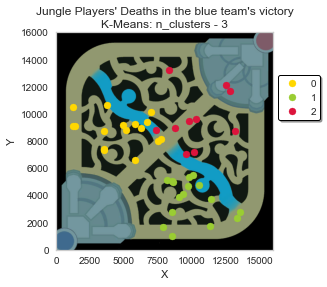

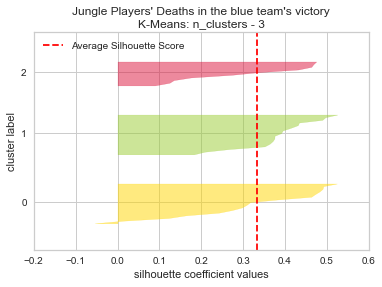

Silhouette score: 0.3340441507226235
1    16
0    16
2    10
Name: cluster, dtype: int64

Inertia: 44.75510784356946

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0      4697.375     8846.6250    -0.3125
1        1      9908.625     3727.4375    -0.0625
2        2     10280.000     9699.8000     0.3000

In [81]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "crimson"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [82]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2104.348619   1075.601975   0.768013
1        1   1687.879545   1427.429288   0.747391
2        2   1880.601234   1954.865561   0.458258

In [83]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            7742.0            1247.0           10621.0   
1        1           13579.0            7841.0            5525.0   
2        2           13184.0            7346.0           13260.0   

   min coordinate_y  max timestamp  min timestamp  
0            6636.0              1             -1  
1            1020.0              1             -1  
2            7067.0              1              0

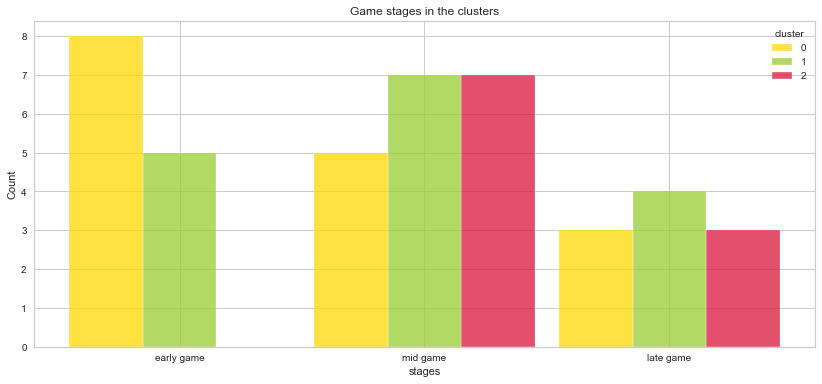

In [84]:
stagesPerClusterV2(blueSideVictory_df, colors)

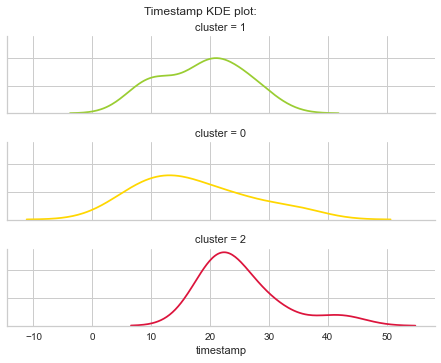

In [85]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [86]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
JarvanIV        3
Pantheon        1
Udyr            1
Kayn            1

Deaths with each champion:

In [87]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



JarvanIV    30
Kayn        10
Pantheon     1
Udyr         1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [88]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 4 champions when they won on the red side

Cluster 0 - died with 2 champions:
 ['JarvanIV' 'Kayn']
JarvanIV    10
Kayn         6
Name: champion, dtype: int64

Cluster 1 - died with 2 champions:
 ['JarvanIV' 'Kayn']
JarvanIV    14
Kayn         2
Name: champion, dtype: int64

Cluster 2 - died with 4 champions:
 ['JarvanIV' 'Kayn' 'Pantheon' 'Udyr']
JarvanIV    6
Kayn        2
Pantheon    1
Udyr        1
Name: champion, dtype: int64



---
#### Clustering Blue Team Defeat

In [89]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Iron")]

blueSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team     summoner region  champion  timestamp  \
159    EUW1_6390357282  Blue  anonymous 8   euw1  JarvanIV   0.947567   
201    EUW1_6390357282  Blue  anonymous 8   euw1  JarvanIV  21.346967   
229    EUW1_6390357282  Blue  anonymous 8   euw1  JarvanIV  29.740000   
235    EUW1_6390357282  Blue  anonymous 8   euw1  JarvanIV  31.812333   
239    EUW1_6390357282  Blue  anonymous 8   euw1  JarvanIV  33.597550   
...                ...   ...          ...    ...       ...        ...   
61508  EUW1_6407812886  Blue  anonymous 8   euw1  Pantheon  19.920167   
61524  EUW1_6407812886  Blue  anonymous 8   euw1  Pantheon  24.681667   
61538  EUW1_6407812886  Blue  anonymous 8   euw1  Pantheon  29.215767   
61551  EUW1_6407812886  Blue  anonymous 8   euw1  Pantheon  34.755733   
61554  EUW1_6407812886  Blue  anonymous 8   euw1  Pantheon  36.098467   

       coordinate_x  coordinate_y  level  minionsKilled  ...  trueDamageTaken  \
159          8896.0        6325.0    NaN            NaN  ...              NaN   
201         10686.0        1274.0    NaN            NaN  ...              NaN   
229         10966.0        5200.0    NaN            NaN  ...              NaN   
235          4793.0        6047.0    NaN            NaN  ...              NaN   
239          1960.0        2504.0    NaN            NaN  ...              NaN   
...             ...           ...    ...            ...  ...              ...   
61508       10457.0        5050.0    NaN            NaN  ...              NaN   
61524        7310.0        9846.0    NaN            NaN  ...              NaN   
61538        3969.0        9461.0    NaN            NaN  ...              NaN   
61551        5368.0        9247.0    NaN            NaN  ...              NaN   
61554        1625.0        6425.0    NaN            NaN  ...              NaN   

       victory  eventType  skillSlot  buildingType  lane  monster  itemName  \
159      False      Death        NaN           NaN   NaN      NaN       NaN   
201      False      Death        NaN           NaN   NaN      NaN       NaN   
229      False      Death        NaN           NaN   NaN      NaN       NaN   
235      False      Death        NaN           NaN   NaN      NaN       NaN   
239      False      Death        NaN           NaN   NaN      NaN       NaN   
...        ...        ...        ...           ...   ...      ...       ...   
61508    False      Death        NaN           NaN   NaN      NaN       NaN   
61524    False      Death        NaN           NaN   NaN      NaN       NaN   
61538    False      Death        NaN           NaN   NaN      NaN       NaN   
61551    False      Death        NaN           NaN   NaN      NaN       NaN   
61554    False      Death        NaN           NaN   NaN      NaN       NaN   

         role  rank  
159    JUNGLE  Iron  
201    JUNGLE  Iron  
229    JUNGLE  Iron  
235    JUNGLE  Iron  
239    JUNGLE  Iron  
...       ...   ...  
61508  JUNGLE  Iron  
61524  JUNGLE  Iron  
61538  JUNGLE  Iron  
61551  JUNGLE  Iron  
61554  JUNGLE  Iron  

[82 rows x 56 columns]

In [90]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)].copy()

In [91]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 8 lost 10 matches on the blue side
anonymous 8 has an average of 8.2 deaths per game when losing on the blue side



In [92]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 10 matches in which the jungler died at least once
1 players died a total of 82 times on the blue side
Defeat games on blue side contains an average of 8.2 deaths per game


In [93]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
159          8896.0        6325.0   0.947567
201         10686.0        1274.0  21.346967
229         10966.0        5200.0  29.740000
235          4793.0        6047.0  31.812333
239          1960.0        2504.0  33.597550
...             ...           ...        ...
61508       10457.0        5050.0  19.920167
61524        7310.0        9846.0  24.681667
61538        3969.0        9461.0  29.215767
61551        5368.0        9247.0  34.755733
61554        1625.0        6425.0  36.098467

[82 rows x 3 columns]

Time discretization

In [94]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [95]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [96]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [97]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [98]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
159        0.672163      0.032528         -1
201        1.181325     -1.555646          0
229        1.260970     -0.321203          1
235       -0.494925     -0.054883          1
239       -1.300765     -1.168900          1
...             ...           ...        ...
61508      1.116186     -0.368367          0
61524      0.221030      1.139627          0
61538     -0.729310      1.018573          1
61551     -0.331368      0.951285          1
61554     -1.396055      0.063971          1

[82 rows x 3 columns]

In [99]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.29644662849064746
Silhouette score for k=3: 0.34649360192375733
Silhouette score for k=4: 0.36299128002108344
Silhouette score for k=5: 0.3516341752943312
Silhouette score for k=6: 0.345812093010303
Silhouette score for k=7: 0.3424810763669292
Silhouette score for k=8: 0.3788793286946067
Silhouette score for k=9: 0.39445103186305414
Silhouette score for k=10: 0.40570103452714484
Silhouette score for k=11: 0.37951364199697674
Silhouette score for k=12: 0.399715917137746
Silhouette score for k=13: 0.41801057171378025
Silhouette score for k=14: 0.4258700794936393
Silhouette score for k=15: 0.43487133968950137
Silhouette score for k=16: 0.4561472451706306
Silhouette score for k=17: 0.45188437051486147
Silhouette score for k=18: 0.4618379905583465
Silhouette score for k=19: 0.4488168487499872
Silhouette score for k=20: 0.4827984102610386
Silhouette score for k=25: 0.4756958718258217


K-Means with k = 3

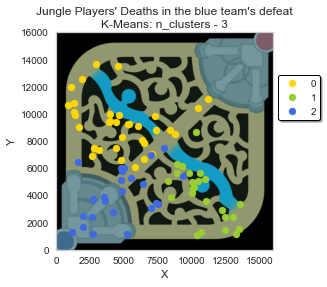

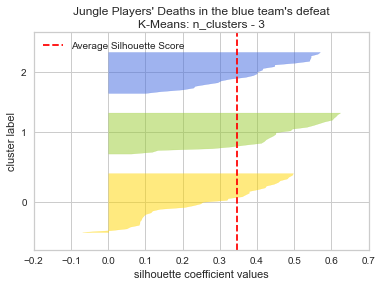

Silhouette score: 0.34649360192375733
0    34
1    24
2    24
Name: cluster, dtype: int64

Inertia: 92.62799224956217

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   4797.823529   9278.117647  -0.264706
1        1  10779.250000   4034.916667  -0.583333
2        2   4744.750000   4078.041667   0.666667

In [100]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "royalblue"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [101]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2602.072901   1858.679018   0.739985
1        1   1558.571949   1917.121147   0.571305
2        2   2170.911315   1837.982533   0.471405

In [102]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           11192.0             911.0           13680.0   
1        1           13555.0            8209.0            8652.0   
2        2            9323.0            1168.0            7459.0   

   min coordinate_y  max timestamp  min timestamp  
0            6056.0              1             -1  
1            1075.0              1             -1  
2            1143.0              1              0

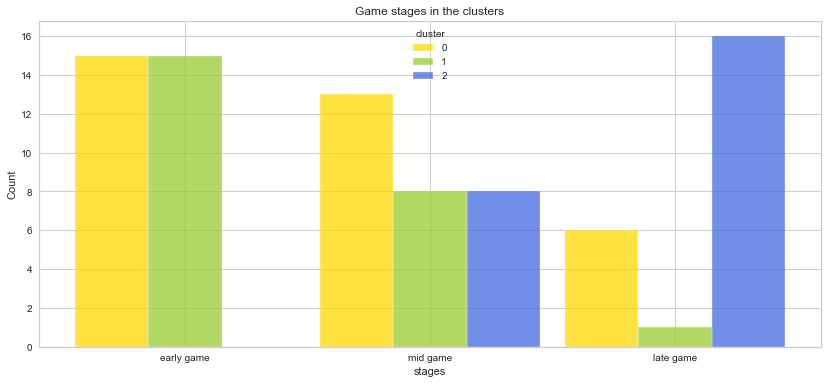

In [103]:
stagesPerClusterV2(blueSideDefeat_df, colors)

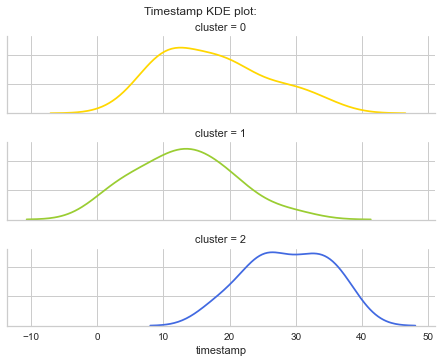

In [104]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [105]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
JarvanIV        4
Pantheon        4
Volibear        1
Udyr            1

Deaths with each champion:

In [106]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Pantheon    34
JarvanIV    27
Volibear    15
Udyr         6
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [107]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 4 champions when they won on the red side

Cluster 0 - died with 4 champions:
 ['JarvanIV' 'Pantheon' 'Udyr' 'Volibear']
Pantheon    17
Volibear     8
JarvanIV     7
Udyr         2
Name: champion, dtype: int64

Cluster 1 - died with 4 champions:
 ['JarvanIV' 'Pantheon' 'Udyr' 'Volibear']
JarvanIV    12
Pantheon     9
Volibear     2
Udyr         1
Name: champion, dtype: int64

Cluster 2 - died with 4 champions:
 ['JarvanIV' 'Pantheon' 'Udyr' 'Volibear']
JarvanIV    8
Pantheon    8
Volibear    5
Udyr        3
Name: champion, dtype: int64



---
### Bronze Players

#### Clustering Red Team Victory

In [108]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Bronze")]

redSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)]
redSideVictory_df

gameId team       summoner region champion  timestamp  \
10491  EUW1_6390847364  Red   anonymous 96   euw1   Lillia   8.655617   
10513  EUW1_6390847364  Red   anonymous 96   euw1   Lillia  15.899567   
10518  EUW1_6390847364  Red   anonymous 96   euw1   Lillia  17.506067   
10529  EUW1_6390847364  Red   anonymous 96   euw1   Lillia  20.289150   
10536  EUW1_6390847364  Red   anonymous 96   euw1   Lillia  22.915850   
...                ...  ...            ...    ...      ...        ...   
59477  EUW1_6405941222  Red  anonymous 114   euw1    Viego  37.532700   
59495  EUW1_6406054441  Red  anonymous 115   euw1    Sylas   3.419867   
59507  EUW1_6406054441  Red  anonymous 115   euw1    Sylas   8.936183   
59531  EUW1_6406054441  Red  anonymous 115   euw1    Sylas  15.441650   
59546  EUW1_6406054441  Red  anonymous 115   euw1    Sylas  19.399100   

       coordinate_x  coordinate_y  level  minionsKilled  ...  trueDamageTaken  \
10491        7499.0        7550.0    NaN            NaN  ...              NaN   
10513        3125.0        9641.0    NaN            NaN  ...              NaN   
10518       10028.0        5164.0    NaN            NaN  ...              NaN   
10529        3012.0        2224.0    NaN            NaN  ...              NaN   
10536       11988.0        2414.0    NaN            NaN  ...              NaN   
...             ...           ...    ...            ...  ...              ...   
59477        6092.0        8258.0    NaN            NaN  ...              NaN   
59495        6474.0       11322.0    NaN            NaN  ...              NaN   
59507        4740.0       10230.0    NaN            NaN  ...              NaN   
59531        9230.0        1313.0    NaN            NaN  ...              NaN   
59546        5571.0        5397.0    NaN            NaN  ...              NaN   

       victory  eventType  skillSlot  buildingType  lane  monster  itemName  \
10491     True      Death        NaN           NaN   NaN      NaN       NaN   
10513     True      Death        NaN           NaN   NaN      NaN       NaN   
10518     True      Death        NaN           NaN   NaN      NaN       NaN   
10529     True      Death        NaN           NaN   NaN      NaN       NaN   
10536     True      Death        NaN           NaN   NaN      NaN       NaN   
...        ...        ...        ...           ...   ...      ...       ...   
59477     True      Death        NaN           NaN   NaN      NaN       NaN   
59495     True      Death        NaN           NaN   NaN      NaN       NaN   
59507     True      Death        NaN           NaN   NaN      NaN       NaN   
59531     True      Death        NaN           NaN   NaN      NaN       NaN   
59546     True      Death        NaN           NaN   NaN      NaN       NaN   

         role    rank  
10491  JUNGLE  Bronze  
10513  JUNGLE  Bronze  
10518  JUNGLE  Bronze  
10529  JUNGLE  Bronze  
10536  JUNGLE  Bronze  
...       ...     ...  
59477  JUNGLE  Bronze  
59495  JUNGLE  Bronze  
59507  JUNGLE  Bronze  
59531  JUNGLE  Bronze  
59546  JUNGLE  Bronze  

[255 rows x 56 columns]

In [109]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)].copy()

In [110]:
redSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [111]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

47

In [112]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

48.95833333333333

In [113]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_jungler_deaths_df.shape[0]) * 100
winRateRedSide

11.404293381037567

In [114]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 106 won 2 matches on the red side
anonymous 106 has an average of 2.0 deaths per game when winning on the red side

anonymous 114 won 3 matches on the red side
anonymous 114 has an average of 10.333333333333334 deaths per game when winning on the red side

anonymous 115 won 6 matches on the red side
anonymous 115 has an average of 4.5 deaths per game when winning on the red side

anonymous 90 won 11 matches on the red side
anonymous 90 has an average of 4.818181818181818 deaths per game when winning on the red side

anonymous 96 won 25 matches on the red side
anonymous 96 has an average of 5.6 deaths per game when winning on the red side



In [115]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 47 matches in which the jungler died at least once
5 players died a total of 255 times on the red side
Victory games on red side contains an average of 5.425531914893617 deaths per game


In [116]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
10491        7499.0        7550.0   8.655617
10513        3125.0        9641.0  15.899567
10518       10028.0        5164.0  17.506067
10529        3012.0        2224.0  20.289150
10536       11988.0        2414.0  22.915850
...             ...           ...        ...
59477        6092.0        8258.0  37.532700
59495        6474.0       11322.0   3.419867
59507        4740.0       10230.0   8.936183
59531        9230.0        1313.0  15.441650
59546        5571.0        5397.0  19.399100

[255 rows x 3 columns]

Time discretization

In [117]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [118]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [119]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [120]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [121]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
10491      0.192611      0.303274         -1
10513     -1.204829      0.992058          0
10518      1.000596     -0.482684          0
10529     -1.240931     -1.451133          0
10536      1.626792     -1.388546          0
...             ...           ...        ...
59477     -0.256908      0.536492          1
59495     -0.134864      1.545787         -1
59507     -0.688856      1.186078         -1
59531      0.745645     -1.751220          0
59546     -0.423361     -0.405933          0

[255 rows x 3 columns]

In [122]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.32169405736722884
Silhouette score for k=3: 0.3116084361289933
Silhouette score for k=4: 0.27952940382840225
Silhouette score for k=5: 0.2764343392821612
Silhouette score for k=6: 0.2983709328501484
Silhouette score for k=7: 0.29201091770159493
Silhouette score for k=8: 0.30116662355375284
Silhouette score for k=9: 0.3155985864561006
Silhouette score for k=10: 0.32525012540919884
Silhouette score for k=11: 0.33651656002880587
Silhouette score for k=12: 0.33086664923492154
Silhouette score for k=13: 0.34480837857913843
Silhouette score for k=14: 0.363145616908127
Silhouette score for k=15: 0.3573289991382544
Silhouette score for k=16: 0.3669029040647858
Silhouette score for k=17: 0.36420814905664844
Silhouette score for k=18: 0.38319977999359905
Silhouette score for k=19: 0.3621817120452985
Silhouette score for k=20: 0.39147712694549097
Silhouette score for k=25: 0.39709709241090274


K-Means with k = 3

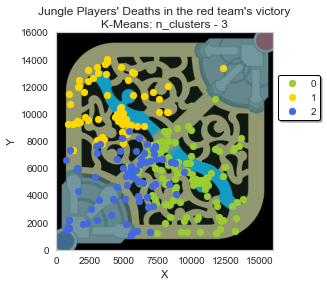

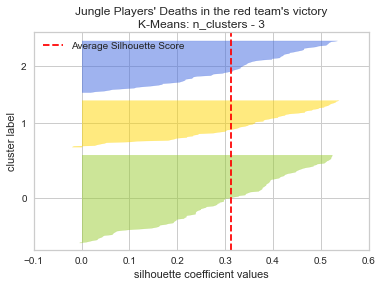

Silhouette score: 0.3116084361289933
0    120
2     71
1     64
Name: cluster, dtype: int64

Inertia: 322.4214039979595

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   9325.350000   5455.608333  -0.433333
1        1   4258.281250  10548.234375  -0.234375
2        2   5168.169014   5080.535211   0.732394

In [123]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "royalblue"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [124]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2032.448510   2094.821278   0.615540
1        1   2157.398060   1788.665125   0.744610
2        2   2185.701357   2056.245216   0.442711

In [125]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           13741.0            5412.0           11069.0   
1        1           12290.0             901.0           14015.0   
2        2            9458.0             732.0            8777.0   

   min coordinate_y  max timestamp  min timestamp  
0            1233.0              1             -1  
1            7344.0              1             -1  
2            1061.0              1              0

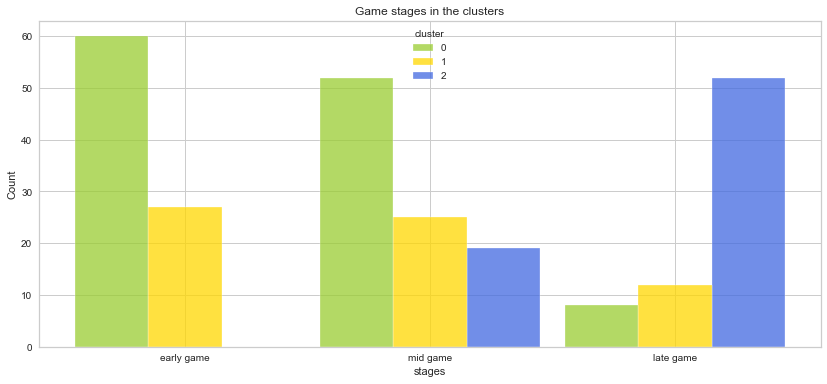

In [126]:
stagesPerClusterV2(redSideVictory_df, colors)

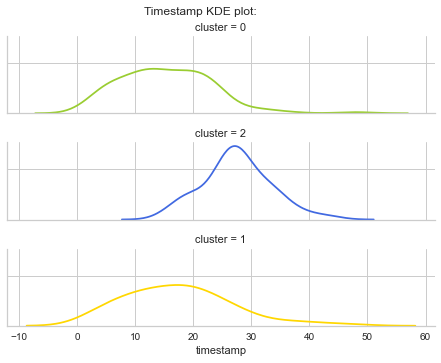

In [127]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [128]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Lillia         10
Vi              9
Nunu            8
Ekko            7
Diana           4
Warwick         2
JarvanIV        2
Amumu           1
Hecarim         1
Jax             1
Viego           1
Sylas           1

Deaths with each champion:

In [129]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Lillia      67
Vi          52
Nunu        36
Ekko        25
Diana       20
JarvanIV    19
Viego       12
Warwick      9
Jax          6
Sylas        4
Amumu        3
Hecarim      2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [130]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 12 champions when they won on the red side

Cluster 0 - died with 12 champions:
 ['Amumu' 'Diana' 'Ekko' 'Hecarim' 'JarvanIV' 'Jax' 'Lillia' 'Nunu' 'Sylas'
 'Vi' 'Viego' 'Warwick']
Lillia      28
Vi          26
Nunu        18
Ekko        15
Diana        8
JarvanIV     8
Warwick      6
Amumu        3
Viego        3
Hecarim      2
Jax          2
Sylas        1
Name: champion, dtype: int64

Cluster 1 - died with 10 champions:
 ['Diana' 'Ekko' 'JarvanIV' 'Jax' 'Lillia' 'Nunu' 'Sylas' 'Vi' 'Viego'
 'Warwick']
Lillia      17
Vi          13
Nunu        11
JarvanIV     7
Diana        5
Viego        3
Ekko         2
Warwick      2
Jax          2
Sylas        2
Name: champion, dtype: int64

Cluster 2 - died with 10 champions:
 ['Diana' 'Ekko' 'JarvanIV' 'Jax' 'Lillia' 'Nunu' 'Sylas' 'Vi' 'Viego'
 'Warwick']
Lillia      22
Vi          13
Ekko         8
Diana        7
Nunu         7
Viego        6
JarvanIV     4
Jax          2
Warwick      1
Sylas        1
Name: champio

---
#### Clustering Red Team Defeat

In [131]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Bronze")]

redSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team       summoner region champion  timestamp  \
9952   EUW1_6386889236  Red   anonymous 90   euw1      Jax   9.546350   
9973   EUW1_6386889236  Red   anonymous 90   euw1      Jax  17.215017   
9978   EUW1_6386889236  Red   anonymous 90   euw1      Jax  18.329950   
9983   EUW1_6386889236  Red   anonymous 90   euw1      Jax  20.641183   
9990   EUW1_6386889236  Red   anonymous 90   euw1      Jax  23.951250   
...                ...  ...            ...    ...      ...        ...   
63585  EUW1_6408276184  Red  anonymous 114   euw1    Sylas  20.815983   
63588  EUW1_6408276184  Red  anonymous 114   euw1    Sylas  21.825233   
63591  EUW1_6408276184  Red  anonymous 114   euw1    Sylas  22.941133   
63597  EUW1_6408276184  Red  anonymous 114   euw1    Sylas  24.943217   
63601  EUW1_6408276184  Red  anonymous 114   euw1    Sylas  26.395250   

       coordinate_x  coordinate_y  level  minionsKilled  ...  trueDamageTaken  \
9952         1113.0       11594.0    NaN            NaN  ...              NaN   
9973         4209.0        9506.0    NaN            NaN  ...              NaN   
9978         7108.0       13715.0    NaN            NaN  ...              NaN   
9983        12191.0        9638.0    NaN            NaN  ...              NaN   
9990         8860.0       10937.0    NaN            NaN  ...              NaN   
...             ...           ...    ...            ...  ...              ...   
63585       12496.0        7429.0    NaN            NaN  ...              NaN   
63588       10511.0       11178.0    NaN            NaN  ...              NaN   
63591       12784.0       10604.0    NaN            NaN  ...              NaN   
63597        7084.0       10855.0    NaN            NaN  ...              NaN   
63601       13272.0       14153.0    NaN            NaN  ...              NaN   

       victory  eventType  skillSlot  buildingType  lane  monster  itemName  \
9952     False      Death        NaN           NaN   NaN      NaN       NaN   
9973     False      Death        NaN           NaN   NaN      NaN       NaN   
9978     False      Death        NaN           NaN   NaN      NaN       NaN   
9983     False      Death        NaN           NaN   NaN      NaN       NaN   
9990     False      Death        NaN           NaN   NaN      NaN       NaN   
...        ...        ...        ...           ...   ...      ...       ...   
63585    False      Death        NaN           NaN   NaN      NaN       NaN   
63588    False      Death        NaN           NaN   NaN      NaN       NaN   
63591    False      Death        NaN           NaN   NaN      NaN       NaN   
63597    False      Death        NaN           NaN   NaN      NaN       NaN   
63601    False      Death        NaN           NaN   NaN      NaN       NaN   

         role    rank  
9952   JUNGLE  Bronze  
9973   JUNGLE  Bronze  
9978   JUNGLE  Bronze  
9983   JUNGLE  Bronze  
9990   JUNGLE  Bronze  
...       ...     ...  
63585  JUNGLE  Bronze  
63588  JUNGLE  Bronze  
63591  JUNGLE  Bronze  
63597  JUNGLE  Bronze  
63601  JUNGLE  Bronze  

[420 rows x 56 columns]

In [132]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)].copy()

In [133]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 114 lost 2 matches on the red side
anonymous 114 has an average of 7.0 deaths per game when losing on the red side

anonymous 115 lost 7 matches on the red side
anonymous 115 has an average of 6.571428571428571 deaths per game when losing on the red side

anonymous 90 lost 9 matches on the red side
anonymous 90 has an average of 7.555555555555555 deaths per game when losing on the red side

anonymous 94 lost 2 matches on the red side
anonymous 94 has an average of 4.0 deaths per game when losing on the red side

anonymous 96 lost 29 matches on the red side
anonymous 96 has an average of 9.793103448275861 deaths per game when losing on the red side



In [134]:
print("Defeat games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 49 matches in which the jungler died at least once
5 players died a total of 420 times on the red side
Defeat games on red side contains an average of 8.571428571428571 deaths per game


In [135]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
9952         1113.0       11594.0   9.546350
9973         4209.0        9506.0  17.215017
9978         7108.0       13715.0  18.329950
9983        12191.0        9638.0  20.641183
9990         8860.0       10937.0  23.951250
...             ...           ...        ...
63585       12496.0        7429.0  20.815983
63588       10511.0       11178.0  21.825233
63591       12784.0       10604.0  22.941133
63597        7084.0       10855.0  24.943217
63601       13272.0       14153.0  26.395250

[420 rows x 3 columns]

Time discretization

In [136]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [137]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [138]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [139]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [140]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
9952      -2.045578      1.083054         -1
9973      -1.139976      0.456357          0
9978      -0.291998      1.719656          0
9983       1.194816      0.495975          0
9990       0.220474      0.885861          0
...             ...           ...        ...
63585      1.284031     -0.167039          0
63588      0.703404      0.958195          0
63591      1.368273      0.785913          0
63597     -0.299018      0.861249          0
63601      1.511016      1.851119          1

[420 rows x 3 columns]

In [141]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.30785295688104897
Silhouette score for k=3: 0.32702825029847105
Silhouette score for k=4: 0.33417106183342987
Silhouette score for k=5: 0.3030060883390453
Silhouette score for k=6: 0.3067312059326927
Silhouette score for k=7: 0.31131895789275865
Silhouette score for k=8: 0.313902736783154
Silhouette score for k=9: 0.3227110220156588
Silhouette score for k=10: 0.3285897075181529
Silhouette score for k=11: 0.32819132308128107
Silhouette score for k=12: 0.3257260609697324
Silhouette score for k=13: 0.335633835743986
Silhouette score for k=14: 0.3246155898451123
Silhouette score for k=15: 0.34133088093484704
Silhouette score for k=16: 0.34264930162449647
Silhouette score for k=17: 0.36038960773168754
Silhouette score for k=18: 0.3656114983946545
Silhouette score for k=19: 0.36393157624706984
Silhouette score for k=20: 0.36526985779316795
Silhouette score for k=25: 0.38135018154093636


K-Means with k = 3

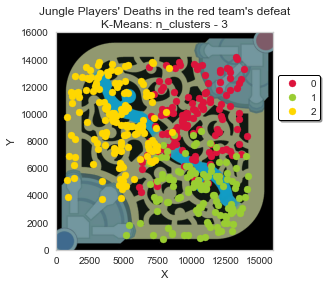

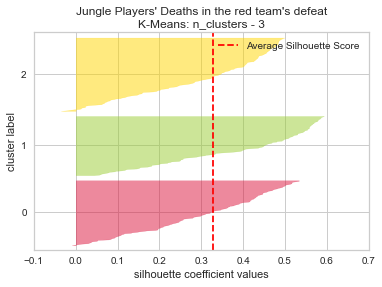

Silhouette score: 0.32702825029847105
2    156
0    138
1    126
Name: cluster, dtype: int64

Inertia: 507.2500985609868

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  10015.166667   9582.326087   0.543478
1        1  10500.928571   4364.190476  -0.563492
2        2   4483.455128   9497.916667  -0.243590

In [142]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "yellowgreen", "gold"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [143]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2042.196351   2414.378629   0.539989
1        1   2075.012837   1925.212281   0.623559
2        2   1822.053006   2569.206507   0.673413

In [144]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14022.0            6134.0           14153.0   
1        1           14123.0            5126.0            8777.0   
2        2            8538.0             784.0           13839.0   

   min coordinate_y  max timestamp  min timestamp  
0            4283.0              1             -1  
1             793.0              1             -1  
2            3706.0              1             -1

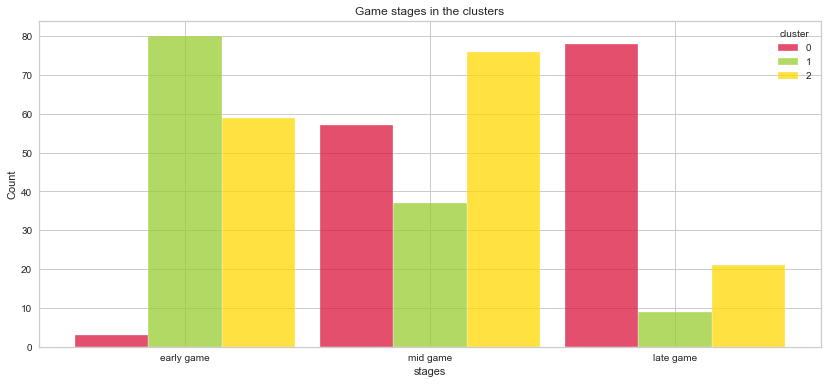

In [145]:
stagesPerClusterV2(redSideDefeat_df, colors)

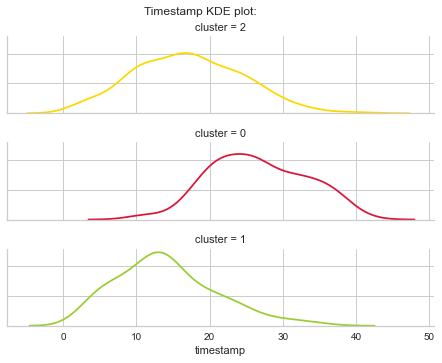

In [146]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [147]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Vi             12
Lillia          9
Nunu            6
Sylas           4
Warwick         3
Diana           2
Nocturne        2
Trundle         2
Qiyana          1
Amumu           1
DrMundo         1
Jax             1
Belveth         1
Ekko            1
Viego           1
Poppy           1
Udyr            1

Deaths with each champion:

In [148]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Lillia      96
Vi          93
Nunu        56
Warwick     35
Nocturne    26
Sylas       24
Trundle     19
Diana       14
DrMundo     13
Viego        9
Poppy        8
Qiyana       7
Jax          6
Amumu        6
Belveth      4
Udyr         3
Ekko         1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [149]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 17 champions when they won on the red side

Cluster 0 - died with 15 champions:
 ['Amumu' 'Belveth' 'Diana' 'DrMundo' 'Ekko' 'Jax' 'Lillia' 'Nocturne'
 'Nunu' 'Poppy' 'Sylas' 'Trundle' 'Vi' 'Viego' 'Warwick']
Lillia      32
Vi          31
Nunu        16
Warwick      9
Nocturne     9
Diana        7
Sylas        7
DrMundo      7
Poppy        5
Trundle      4
Jax          3
Viego        3
Amumu        2
Belveth      2
Ekko         1
Name: champion, dtype: int64

Cluster 1 - died with 15 champions:
 ['Amumu' 'Belveth' 'Diana' 'DrMundo' 'Lillia' 'Nocturne' 'Nunu' 'Poppy'
 'Qiyana' 'Sylas' 'Trundle' 'Udyr' 'Vi' 'Viego' 'Warwick']
Lillia      34
Vi          29
Warwick     16
Nunu        15
Nocturne     6
Sylas        5
Trundle      5
Qiyana       4
DrMundo      3
Diana        2
Amumu        2
Viego        2
Belveth      1
Poppy        1
Udyr         1
Name: champion, dtype: int64

Cluster 2 - died with 16 champions:
 ['Amumu' 'Belveth' 'Diana' 'DrMundo' 'Jax' 'Lill

---
#### Clustering Blue Team Victory

In [150]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Bronze")]

blueSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team       summoner region champion  timestamp  \
9626   EUW1_6388204073  Blue   anonymous 90   euw1     Ekko   4.538917   
9637   EUW1_6388204073  Blue   anonymous 90   euw1     Ekko   8.367350   
9648   EUW1_6388204073  Blue   anonymous 90   euw1     Ekko  11.594917   
9659   EUW1_6388204073  Blue   anonymous 90   euw1     Ekko  16.484500   
9668   EUW1_6388204073  Blue   anonymous 90   euw1     Ekko  19.950183   
...                ...   ...            ...    ...      ...        ...   
63712  EUW1_6408179967  Blue  anonymous 114   euw1    Sylas   4.650000   
63724  EUW1_6408179967  Blue  anonymous 114   euw1    Sylas   9.063400   
63729  EUW1_6408179967  Blue  anonymous 114   euw1    Sylas  11.030467   
63732  EUW1_6408179967  Blue  anonymous 114   euw1    Sylas  12.121700   
63779  EUW1_6408179967  Blue  anonymous 114   euw1    Sylas  26.902550   

       coordinate_x  coordinate_y  level  minionsKilled  ...  trueDamageTaken  \
9626         1582.0        9926.0    NaN            NaN  ...              NaN   
9637        11566.0        3164.0    NaN            NaN  ...              NaN   
9648         1277.0       12246.0    NaN            NaN  ...              NaN   
9659         5708.0        6025.0    NaN            NaN  ...              NaN   
9668        10029.0        1113.0    NaN            NaN  ...              NaN   
...             ...           ...    ...            ...  ...              ...   
63712        7420.0        5921.0    NaN            NaN  ...              NaN   
63724       11167.0        3361.0    NaN            NaN  ...              NaN   
63729        7100.0        7274.0    NaN            NaN  ...              NaN   
63732        2244.0        9721.0    NaN            NaN  ...              NaN   
63779       13562.0       12418.0    NaN            NaN  ...              NaN   

       victory  eventType  skillSlot  buildingType  lane  monster  itemName  \
9626      True      Death        NaN           NaN   NaN      NaN       NaN   
9637      True      Death        NaN           NaN   NaN      NaN       NaN   
9648      True      Death        NaN           NaN   NaN      NaN       NaN   
9659      True      Death        NaN           NaN   NaN      NaN       NaN   
9668      True      Death        NaN           NaN   NaN      NaN       NaN   
...        ...        ...        ...           ...   ...      ...       ...   
63712     True      Death        NaN           NaN   NaN      NaN       NaN   
63724     True      Death        NaN           NaN   NaN      NaN       NaN   
63729     True      Death        NaN           NaN   NaN      NaN       NaN   
63732     True      Death        NaN           NaN   NaN      NaN       NaN   
63779     True      Death        NaN           NaN   NaN      NaN       NaN   

         role    rank  
9626   JUNGLE  Bronze  
9637   JUNGLE  Bronze  
9648   JUNGLE  Bronze  
9659   JUNGLE  Bronze  
9668   JUNGLE  Bronze  
...       ...     ...  
63712  JUNGLE  Bronze  
63724  JUNGLE  Bronze  
63729  JUNGLE  Bronze  
63732  JUNGLE  Bronze  
63779  JUNGLE  Bronze  

[304 rows x 56 columns]

In [151]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)].copy()

In [152]:
blueSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [153]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

56

In [154]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

54.90196078431373

In [155]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_jungler_deaths_df.shape[0]) * 100
winRateBlueSide

11.856474258970358

In [156]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 114 won 4 matches on the blue side
anonymous 114 has an average of 6.25 deaths per game when winning on the blue side

anonymous 115 won 8 matches on the blue side
anonymous 115 has an average of 5.375 deaths per game when winning on the blue side

anonymous 90 won 9 matches on the blue side
anonymous 90 has an average of 5.333333333333333 deaths per game when winning on the blue side

anonymous 94 won 4 matches on the blue side
anonymous 94 has an average of 6.0 deaths per game when winning on the blue side

anonymous 96 won 31 matches on the blue side
anonymous 96 has an average of 5.290322580645161 deaths per game when winning on the blue side



In [157]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 56 matches in which the jungler died at least once
5 players died a total of 304 times on the blue side
Victory games on blue side contains an average of 5.428571428571429 deaths per game


In [158]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
9626         1582.0        9926.0   4.538917
9637        11566.0        3164.0   8.367350
9648         1277.0       12246.0  11.594917
9659         5708.0        6025.0  16.484500
9668        10029.0        1113.0  19.950183
...             ...           ...        ...
63712        7420.0        5921.0   4.650000
63724       11167.0        3361.0   9.063400
63729        7100.0        7274.0  11.030467
63732        2244.0        9721.0  12.121700
63779       13562.0       12418.0  26.902550

[304 rows x 3 columns]

Time discretization

In [159]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [160]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [161]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [162]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [163]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
9626      -1.950362      0.670080         -1
9637       0.893360     -1.396345         -1
9648      -2.037235      1.379057         -1
9659      -0.775162     -0.522042          0
9668       0.455579     -2.023118          0
...             ...           ...        ...
63712     -0.287537     -0.553823         -1
63724      0.779714     -1.336143         -1
63729     -0.378682     -0.140355         -1
63732     -1.761806      0.607433         -1
63779      1.461877      1.431619          1

[304 rows x 3 columns]

In [164]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3248391186294599
Silhouette score for k=3: 0.3609143853675498
Silhouette score for k=4: 0.35270953525369914
Silhouette score for k=5: 0.3155200008448907
Silhouette score for k=6: 0.3171170755071642
Silhouette score for k=7: 0.32875666017110544
Silhouette score for k=8: 0.3267783628288884
Silhouette score for k=9: 0.33830737631650115
Silhouette score for k=10: 0.3478852600898597
Silhouette score for k=11: 0.3671184308831942
Silhouette score for k=12: 0.36654490233536785
Silhouette score for k=13: 0.38089697991661026
Silhouette score for k=14: 0.37235728134205115
Silhouette score for k=15: 0.38267149042346393
Silhouette score for k=16: 0.3865929383341062
Silhouette score for k=17: 0.39747800522680193
Silhouette score for k=18: 0.3980178785874885
Silhouette score for k=19: 0.4070865914348071
Silhouette score for k=20: 0.3922458298334878
Silhouette score for k=25: 0.4224720521412072


K-Means with k = 3

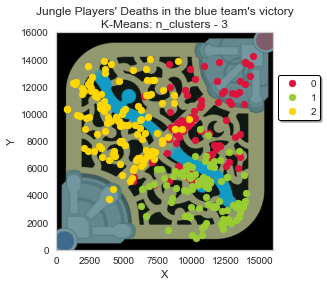

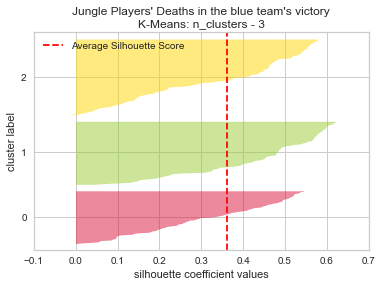

Silhouette score: 0.3609143853675498
2    120
1    100
0     84
Name: cluster, dtype: int64

Inertia: 343.07710499012967

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  10635.011905   9264.630952   0.654762
1        1  10832.280000   4280.620000  -0.550000
2        2   4883.350000   9538.566667  -0.508333

In [165]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "yellowgreen", "gold"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [166]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2144.411072   2542.657968   0.499858
1        1   1853.653145   1693.451445   0.589491
2        2   2086.424812   2318.850778   0.632401

In [167]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14516.0            5675.0           14234.0   
1        1           13988.0            6249.0            8874.0   
2        2            9767.0             777.0           14051.0   

   min coordinate_y  max timestamp  min timestamp  
0            4744.0              1             -1  
1             891.0              1             -1  
2            3745.0              1             -1

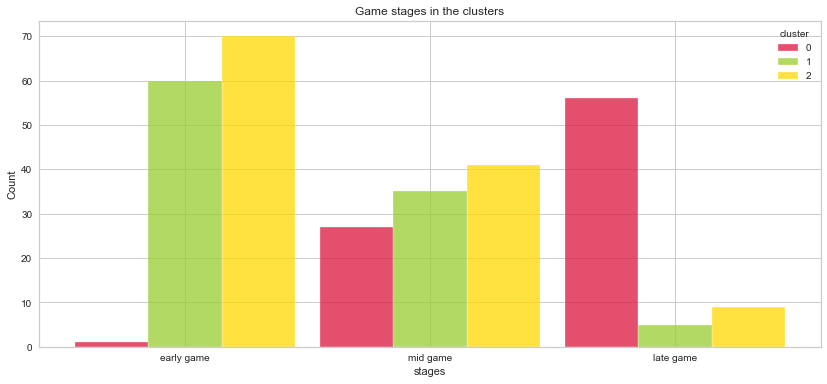

In [168]:
stagesPerClusterV2(blueSideVictory_df, colors)

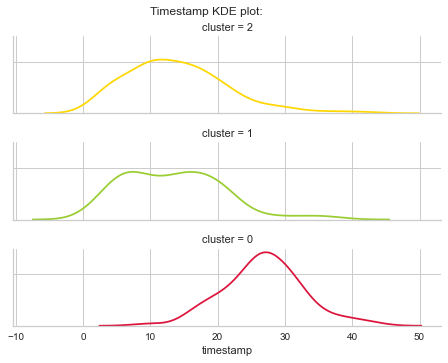

In [169]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [170]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Lillia            11
Ekko               8
Vi                 7
Nunu               6
Nocturne           5
Neeko              3
Sylas              3
Warwick            3
Mordekaiser        2
Shyvana            2
Diana              1
Gragas             1
Viego              1
Evelynn            1
Trundle            1
LeeSin             1

Deaths with each champion:

In [171]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Lillia         51
Vi             41
Ekko           38
Warwick        31
Nunu           27
Nocturne       24
Sylas          18
Shyvana        14
Neeko          13
Mordekaiser    12
Gragas         11
Trundle        10
LeeSin          7
Diana           3
Viego           2
Evelynn         2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [172]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 16 champions when they won on the red side

Cluster 0 - died with 14 champions:
 ['Diana' 'Ekko' 'Gragas' 'LeeSin' 'Lillia' 'Mordekaiser' 'Neeko'
 'Nocturne' 'Nunu' 'Shyvana' 'Sylas' 'Trundle' 'Vi' 'Warwick']
Warwick        15
Lillia         13
Ekko           11
Vi             10
Neeko           8
Nocturne        7
Nunu            4
Gragas          4
Mordekaiser     3
Shyvana         3
Diana           2
Trundle         2
LeeSin          1
Sylas           1
Name: champion, dtype: int64

Cluster 1 - died with 13 champions:
 ['Ekko' 'Gragas' 'LeeSin' 'Lillia' 'Mordekaiser' 'Neeko' 'Nocturne' 'Nunu'
 'Shyvana' 'Sylas' 'Trundle' 'Vi' 'Warwick']
Lillia         20
Ekko           11
Vi             11
Nocturne       10
Nunu            9
Sylas           9
Mordekaiser     6
Warwick         6
Trundle         5
Gragas          4
Shyvana         4
LeeSin          3
Neeko           2
Name: champion, dtype: int64

Cluster 2 - died with 16 champions:
 ['Diana' 'Ekko' 'Evelyn

---
#### Clustering Blue Team Defeat

In [173]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Bronze")]

blueSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team      summoner region champion  timestamp  \
9850   EUW1_6387154897  Blue  anonymous 90   euw1     Ekko   6.015783   
9860   EUW1_6387154897  Blue  anonymous 90   euw1     Ekko   9.036467   
9869   EUW1_6387154897  Blue  anonymous 90   euw1     Ekko  12.259433   
9880   EUW1_6387154897  Blue  anonymous 90   euw1     Ekko  15.210433   
10959  EUW1_6389301219  Blue  anonymous 96   euw1   Lillia   7.778717   
...                ...   ...           ...    ...      ...        ...   
63462  EUW1_6407997036  Blue  anonymous 94   euw1    Neeko  27.460200   
63467  EUW1_6407997036  Blue  anonymous 94   euw1    Neeko  29.017050   
63475  EUW1_6407997036  Blue  anonymous 94   euw1    Neeko  32.408467   
63478  EUW1_6407997036  Blue  anonymous 94   euw1    Neeko  33.895533   
63486  EUW1_6407997036  Blue  anonymous 94   euw1    Neeko  37.193450   

       coordinate_x  coordinate_y  level  minionsKilled  ...  trueDamageTaken  \
9850         6668.0        6691.0    NaN            NaN  ...              NaN   
9860        11218.0        3694.0    NaN            NaN  ...              NaN   
9869         5812.0        8570.0    NaN            NaN  ...              NaN   
9880        10566.0        2882.0    NaN            NaN  ...              NaN   
10959       12233.0        7870.0    NaN            NaN  ...              NaN   
...             ...           ...    ...            ...  ...              ...   
63462        5733.0        3687.0    NaN            NaN  ...              NaN   
63467        7016.0        6935.0    NaN            NaN  ...              NaN   
63475        3379.0        4371.0    NaN            NaN  ...              NaN   
63478        8806.0        3798.0    NaN            NaN  ...              NaN   
63486         781.0         893.0    NaN            NaN  ...              NaN   

       victory  eventType  skillSlot  buildingType  lane  monster  itemName  \
9850     False      Death        NaN           NaN   NaN      NaN       NaN   
9860     False      Death        NaN           NaN   NaN      NaN       NaN   
9869     False      Death        NaN           NaN   NaN      NaN       NaN   
9880     False      Death        NaN           NaN   NaN      NaN       NaN   
10959    False      Death        NaN           NaN   NaN      NaN       NaN   
...        ...        ...        ...           ...   ...      ...       ...   
63462    False      Death        NaN           NaN   NaN      NaN       NaN   
63467    False      Death        NaN           NaN   NaN      NaN       NaN   
63475    False      Death        NaN           NaN   NaN      NaN       NaN   
63478    False      Death        NaN           NaN   NaN      NaN       NaN   
63486    False      Death        NaN           NaN   NaN      NaN       NaN   

         role    rank  
9850   JUNGLE  Bronze  
9860   JUNGLE  Bronze  
9869   JUNGLE  Bronze  
9880   JUNGLE  Bronze  
10959  JUNGLE  Bronze  
...       ...     ...  
63462  JUNGLE  Bronze  
63467  JUNGLE  Bronze  
63475  JUNGLE  Bronze  
63478  JUNGLE  Bronze  
63486  JUNGLE  Bronze  

[434 rows x 56 columns]

In [174]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)].copy()

In [175]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 115 lost 4 matches on the blue side
anonymous 115 has an average of 9.0 deaths per game when losing on the blue side

anonymous 90 lost 11 matches on the blue side
anonymous 90 has an average of 6.2727272727272725 deaths per game when losing on the blue side

anonymous 94 lost 3 matches on the blue side
anonymous 94 has an average of 8.333333333333334 deaths per game when losing on the blue side

anonymous 96 lost 28 matches on the blue side
anonymous 96 has an average of 10.857142857142858 deaths per game when losing on the blue side



In [176]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 46 matches in which the jungler died at least once
4 players died a total of 434 times on the blue side
Defeat games on blue side contains an average of 9.434782608695652 deaths per game


In [177]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
9850         6668.0        6691.0   6.015783
9860        11218.0        3694.0   9.036467
9869         5812.0        8570.0  12.259433
9880        10566.0        2882.0  15.210433
10959       12233.0        7870.0   7.778717
...             ...           ...        ...
63462        5733.0        3687.0  27.460200
63467        7016.0        6935.0  29.017050
63475        3379.0        4371.0  32.408467
63478        8806.0        3798.0  33.895533
63486         781.0         893.0  37.193450

[434 rows x 3 columns]

Time discretization

In [178]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [179]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [180]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [181]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [182]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
9850      -0.253363      0.078401         -1
9860       1.084634     -0.865583         -1
9869      -0.505083      0.670241         -1
9880       0.892904     -1.121344          0
10959      1.383111      0.449758         -1
...             ...           ...        ...
63462     -0.528314     -0.867788          1
63467     -0.151028      0.155255          1
63475     -1.220544     -0.652344          1
63478      0.375349     -0.832826          1
63486     -1.984526     -1.747832          1

[434 rows x 3 columns]

In [183]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3066583515349869
Silhouette score for k=3: 0.32181927640265623
Silhouette score for k=4: 0.3342352940527543
Silhouette score for k=5: 0.3158107842704239
Silhouette score for k=6: 0.3221434744088348
Silhouette score for k=7: 0.3265297428087453
Silhouette score for k=8: 0.3247002820536537
Silhouette score for k=9: 0.3460155928587989
Silhouette score for k=10: 0.35197142183650465
Silhouette score for k=11: 0.34991570305287273
Silhouette score for k=12: 0.35896972753405937
Silhouette score for k=13: 0.35833272570327
Silhouette score for k=14: 0.36304601642523515
Silhouette score for k=15: 0.37396467461043165
Silhouette score for k=16: 0.38127068804863146
Silhouette score for k=17: 0.37821995990595336
Silhouette score for k=18: 0.3857040116215433
Silhouette score for k=19: 0.3895584645032732
Silhouette score for k=20: 0.3945887530084632
Silhouette score for k=25: 0.39797531011603665


K-Means with k = 3

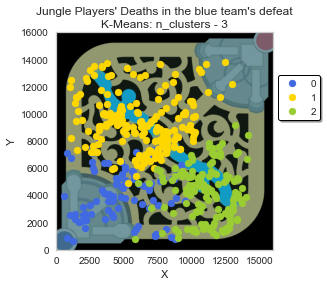

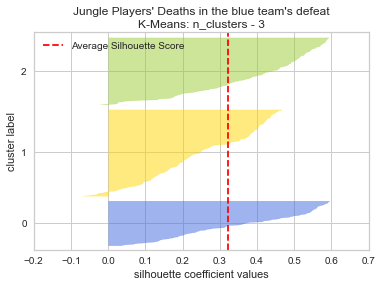

Silhouette score: 0.32181927640265623
1    189
2    147
0     98
Name: cluster, dtype: int64

Inertia: 555.0120454368637

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   4955.765306   4140.112245   0.714286
1        1   6168.592593   9320.835979  -0.169312
2        2  10995.319728   4275.496599  -0.387755

In [184]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "gold", "yellowgreen"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [185]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2415.662181   1810.847247   0.451754
1        1   2582.187352   1991.145851   0.757963
2        2   1693.938618   1895.660714   0.704205

In [186]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            9685.0             560.0            8000.0   
1        1           12945.0            1020.0           13829.0   
2        2           14116.0            5835.0            9158.0   

   min coordinate_y  max timestamp  min timestamp  
0             648.0              1              0  
1            4951.0              1             -1  
2             763.0              1             -1

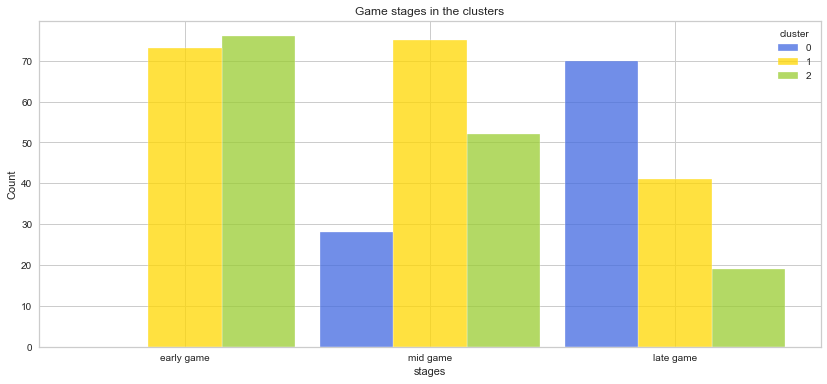

In [187]:
stagesPerClusterV2(blueSideDefeat_df, colors)

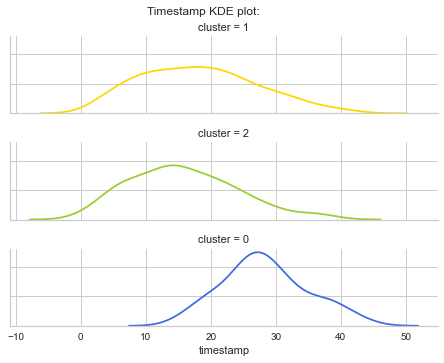

In [188]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [189]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Lillia         11
Vi              9
Nunu            6
Ekko            5
Shyvana         3
Poppy           2
Nocturne        2
Sylas           1
Nidalee         1
Gragas          1
Jax             1
Trundle         1
Warwick         1
Diana           1
Neeko           1

Deaths with each champion:

In [190]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Lillia      105
Vi           94
Nunu         79
Ekko         30
Shyvana      23
Trundle      18
Nocturne     17
Sylas        11
Neeko        11
Warwick      10
Poppy         9
Gragas        7
Nidalee       7
Diana         7
Jax           6
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [191]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 15 champions when they won on the red side

Cluster 0 - died with 13 champions:
 ['Diana' 'Ekko' 'Jax' 'Lillia' 'Neeko' 'Nidalee' 'Nocturne' 'Nunu' 'Poppy'
 'Shyvana' 'Sylas' 'Trundle' 'Vi']
Vi          25
Lillia      21
Nunu        20
Shyvana      6
Ekko         6
Neeko        6
Poppy        4
Sylas        3
Nidalee      2
Nocturne     2
Jax          1
Diana        1
Trundle      1
Name: champion, dtype: int64

Cluster 1 - died with 15 champions:
 ['Diana' 'Ekko' 'Gragas' 'Jax' 'Lillia' 'Neeko' 'Nidalee' 'Nocturne'
 'Nunu' 'Poppy' 'Shyvana' 'Sylas' 'Trundle' 'Vi' 'Warwick']
Lillia      41
Vi          38
Nunu        34
Ekko        13
Nocturne    12
Trundle     10
Shyvana      9
Sylas        7
Warwick      6
Gragas       4
Jax          4
Neeko        4
Poppy        3
Diana        3
Nidalee      1
Name: champion, dtype: int64

Cluster 2 - died with 15 champions:
 ['Diana' 'Ekko' 'Gragas' 'Jax' 'Lillia' 'Neeko' 'Nidalee' 'Nocturne'
 'Nunu' 'Poppy' 'Shyvana' 'Sy

---
### Silver Players

#### Clustering Red Team Victory

In [192]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Silver")]

redSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)]
redSideVictory_df

gameId team      summoner region  champion  timestamp  \
8053   EUW1_6388911301  Red  anonymous 68   euw1  Nocturne   4.529500   
8083   EUW1_6388911301  Red  anonymous 68   euw1  Nocturne  14.896000   
8097   EUW1_6388911301  Red  anonymous 68   euw1  Nocturne  18.709850   
8100   EUW1_6388911301  Red  anonymous 68   euw1  Nocturne  19.844467   
8107   EUW1_6388911301  Red  anonymous 68   euw1  Nocturne  21.225950   
8112   EUW1_6388911301  Red  anonymous 68   euw1  Nocturne  23.176083   
8122   EUW1_6388911301  Red  anonymous 68   euw1  Nocturne  26.373950   
9155   EUW1_6388443155  Red  anonymous 79   euw1   Belveth   9.008133   
9176   EUW1_6388443155  Red  anonymous 79   euw1   Belveth  14.780167   
9181   EUW1_6388443155  Red  anonymous 79   euw1   Belveth  15.773583   
9184   EUW1_6388443155  Red  anonymous 79   euw1   Belveth  16.816967   
9190   EUW1_6388443155  Red  anonymous 79   euw1   Belveth  18.432367   
9195   EUW1_6388443155  Red  anonymous 79   euw1   Belveth  20.012417   
9202   EUW1_6388443155  Red  anonymous 79   euw1   Belveth  22.457750   
9439   EUW1_6386498686  Red  anonymous 79   euw1   Belveth   7.113050   
9441   EUW1_6386498686  Red  anonymous 79   euw1   Belveth   8.392100   
9445   EUW1_6386498686  Red  anonymous 79   euw1   Belveth   9.670267   
9454   EUW1_6386498686  Red  anonymous 79   euw1   Belveth  12.840150   
9472   EUW1_6386498686  Red  anonymous 79   euw1   Belveth  16.281333   
9474   EUW1_6386498686  Red  anonymous 79   euw1   Belveth  17.528933   
9520   EUW1_6386498686  Red  anonymous 79   euw1   Belveth  30.891367   
9527   EUW1_6386498686  Red  anonymous 79   euw1   Belveth  33.638333   
9537   EUW1_6386483812  Red  anonymous 79   euw1   Belveth   1.198967   
9549   EUW1_6386483812  Red  anonymous 79   euw1   Belveth   6.378300   
9584   EUW1_6386483812  Red  anonymous 79   euw1   Belveth  16.961000   
30698  EUW1_6397267172  Red  anonymous 79   euw1  Nocturne   3.073000   
30712  EUW1_6397267172  Red  anonymous 79   euw1  Nocturne   8.405250   
30733  EUW1_6397267172  Red  anonymous 79   euw1  Nocturne  15.653633   
30742  EUW1_6397267172  Red  anonymous 79   euw1  Nocturne  18.903133   
30753  EUW1_6397267172  Red  anonymous 79   euw1  Nocturne  21.646800   
30758  EUW1_6397267172  Red  anonymous 79   euw1  Nocturne  23.423417   
31311  EUW1_6395871430  Red  anonymous 79   euw1     Neeko  13.890233   
43221  EUW1_6399985483  Red  anonymous 79   euw1   Evelynn   8.447683   
43224  EUW1_6399985483  Red  anonymous 79   euw1   Evelynn   9.680300   
43236  EUW1_6399985483  Red  anonymous 79   euw1   Evelynn  13.897317   
43254  EUW1_6399985483  Red  anonymous 79   euw1   Evelynn  19.446517   
43269  EUW1_6399985483  Red  anonymous 79   euw1   Evelynn  23.036683   
46628  EUW1_6400593796  Red  anonymous 79   euw1   Belveth   8.281567   
46667  EUW1_6400593796  Red  anonymous 79   euw1   Belveth  17.704417   
46671  EUW1_6400593796  Red  anonymous 79   euw1   Belveth  19.214317   
46677  EUW1_6400593796  Red  anonymous 79   euw1   Belveth  21.532433   
46689  EUW1_6400593796  Red  anonymous 79   euw1   Belveth  24.866117   
46699  EUW1_6400593796  Red  anonymous 79   euw1   Belveth  27.527483   
47003  EUW1_6400230930  Red  anonymous 79   euw1   Evelynn   6.375500   
47007  EUW1_6400230930  Red  anonymous 79   euw1   Evelynn   8.015867   
47022  EUW1_6400230930  Red  anonymous 79   euw1   Evelynn  13.881100   
47035  EUW1_6400230930  Red  anonymous 79   euw1   Evelynn  18.239100   
47040  EUW1_6400230930  Red  anonymous 79   euw1   Evelynn  19.744183   
47048  EUW1_6400230930  Red  anonymous 79   euw1   Evelynn  21.860250   
56709  EUW1_6407385955  Red  anonymous 79   euw1   Belveth  13.735467   
56713  EUW1_6407385955  Red  anonymous 79   euw1   Belveth  15.650383   
56718  EUW1_6407385955  Red  anonymous 79   euw1   Belveth  17.902033   
56732  EUW1_6407385955  Red  anonymous 79   euw1   Belveth  21.668717   
56739  EUW1_6407385955  Red  anonymous 79   euw1   Belveth  24.170150   
5

In [193]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)].copy()

In [194]:
redSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [195]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

12

In [196]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

38.70967741935484

In [197]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_jungler_deaths_df.shape[0]) * 100
winRateRedSide

2.6833631484794274

In [198]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 68 won 1 matches on the red side
anonymous 68 has an average of 7.0 deaths per game when winning on the red side

anonymous 79 won 11 matches on the red side
anonymous 79 has an average of 4.818181818181818 deaths per game when winning on the red side



In [199]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 12 matches in which the jungler died at least once
2 players died a total of 60 times on the red side
Victory games on red side contains an average of 5.0 deaths per game


In [200]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
8053         8605.0        8919.0   4.529500
8083         8444.0        7484.0  14.896000
8097        11104.0        4430.0  18.709850
8100         4112.0       10069.0  19.844467
8107        11009.0        4877.0  21.225950
8112         6646.0        9903.0  23.176083
8122        13134.0       10560.0  26.373950
9155         5069.0       10245.0   9.008133
9176         5032.0        9158.0  14.780167
9181         6809.0        9890.0  15.773583
9184         4365.0        9468.0  16.816967
9190         6841.0        4824.0  18.432367
9195         7510.0        5092.0  20.012417
9202         8302.0        1535.0  22.457750
9439         7322.0        7028.0   7.113050
9441         2828.0       12512.0   8.392100
9445         4800.0        9932.0   9.670267
9454        13252.0        2247.0  12.840150
9472         2750.0       13699.0  16.281333
9474         4823.0       10512.0  17.528933
9520        12054.0        1578.0  30.891367
9527         1374.0        2042.0  33.638333
9537         5162.0        8499.0   1.198967
9549         7856.0        7920.0   6.378300
9584         3446.0        7978.0  16.961000
30698        3686.0        9886.0   3.073000
30712       12081.0        6825.0   8.405250
30733        7298.0        6054.0  15.653633
30742        1129.0        9088.0  18.903133
30753        8663.0        9924.0  21.646800
30758        7036.0        4196.0  23.423417
31311       10316.0        1516.0  13.890233
43221        9198.0        6093.0   8.447683
43224        3621.0       12956.0   9.680300
43236        2880.0       12292.0  13.897317
43254        9092.0        3783.0  19.446517
43269        1451.0        1078.0  23.036683
46628        7413.0        6240.0   8.281567
46667       12370.0        1788.0  17.704417
46671        3339.0        2327.0  19.214317
46677        2281.0        3116.0  21.532433
46689        3598.0        3384.0  24.866117
46699        1000.0        3685.0  27.527483
47003       11166.0        1860.0   6.375500
47007        3214.0        9275.0   8.015867
47022       12621.0        3201.0  13.881100
47035        9584.0        6258.0  18.239100
47040        5984.0        4123.0  19.744183
47048        6533.0        2543.0  21.860250
56709       10052.0        5494.0  13.735467
56713        6790.0         864.0  15.650383
56718        7724.0        7406.0  17.902033
56732        6975.0        4803.0  21.668717
56739        3995.0        7386.0  24.170150
56748        2784.0        6031.0  27.054900
56759        2361.0        5379.0  30.138867
56957        1679.0       11756.0  10.001533
56995        7300.0        5964.0   8.613750
57002        1968.0       12010.0  10.188000
57012        6982.0        9709.0  13.380517

Time discretization

In [201]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [202]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [203]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [204]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [205]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
8053       0.636875      0.656160         -1
8083       0.589363      0.242111         -1
8097       1.374347     -0.639078          0
8100      -0.689040      0.987976          0
8107       1.346312     -0.510103          0
8112       0.058761      0.940079          0
8122       1.973414      1.129647          1
9155      -0.406623      1.038758         -1
9176      -0.417542      0.725120         -1
9181       0.106863      0.936328          0
9184      -0.614378      0.814566          0
9190       0.116307     -0.525395          0
9195       0.313733     -0.448068          0
9202       0.547458     -1.474390          0
9439       0.258253      0.110538         -1
9441      -1.067957      1.692870         -1
9445      -0.486007      0.948447         -1
9454       2.008237     -1.268952         -1
9472      -1.090976      2.035362          0
9474      -0.479219      1.115798          0
9520       1.654699     -1.461983          1
9527      -1.497043     -1.328102          1
9537      -0.379178      0.534975         -1
9549       0.415840      0.367912         -1
9584      -0.885581      0.384647          0
30698     -0.814756      0.935174         -1
30712      1.662667      0.051965         -1
30733      0.251170     -0.170496          0
30742     -1.569344      0.704922          0
30753      0.653991      0.946138          0
30758      0.173852     -0.706596          0
31311      1.141803     -1.479872         -1
43221      0.811873     -0.159243         -1
43224     -0.833938      1.820979         -1
43236     -1.052612      1.629392         -1
43254      0.780592     -0.825761          0
43269     -1.474320     -1.606251          0
46628      0.285108     -0.116828         -1
46667      1.747952     -1.401390          0
46671     -0.917158     -1.245870          0
46677     -1.229381     -1.018215          0
46689     -0.840725     -0.940887          0
46699     -1.607413     -0.854038          1
47003      1.392644     -1.380616         -1
47007     -0.954046      0.758879         -1
47022      1.822024     -0.993689         -1
47035      0.925785     -0.111635          0
47040     -0.136600     -0.727659          0
47048      0.025414     -1.183546          0
56709      1.063895     -0.332076         -1
56713      0.101256     -1.667998          0
56718      0.376886      0.219605          0
56732      0.155851     -0.531454          0
56739     -0.723568      0.213834          0
56748     -1.080942     -0.177132          1
56759     -1.205772     -0.365258          1
56957     -1.407035      1.474736         -1
56995      0.251761     -0.196464         -1
57002     -1.321749      1.548024         -1
57012      0.157917      0.884103         -1

In [206]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3358952663063903
Silhouette score for k=3: 0.37103360450496076
Silhouette score for k=4: 0.3443772026791892
Silhouette score for k=5: 0.3348791818472903
Silhouette score for k=6: 0.34403402950633083
Silhouette score for k=7: 0.3546552994213124
Silhouette score for k=8: 0.3699855454304035
Silhouette score for k=9: 0.40344131994461124
Silhouette score for k=10: 0.40217460947858913
Silhouette score for k=11: 0.40571308858648253
Silhouette score for k=12: 0.4286793942625177
Silhouette score for k=13: 0.43756313051450435
Silhouette score for k=14: 0.452325732564226
Silhouette score for k=15: 0.43889883148873216
Silhouette score for k=16: 0.4562454066990373
Silhouette score for k=17: 0.46643528200727485
Silhouette score for k=18: 0.4631471893891847
Silhouette score for k=19: 0.4553525349462907
Silhouette score for k=20: 0.44571095018940354
Silhouette score for k=25: 0.4438921040713895


K-Means with k = 3

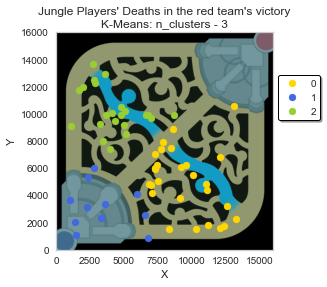

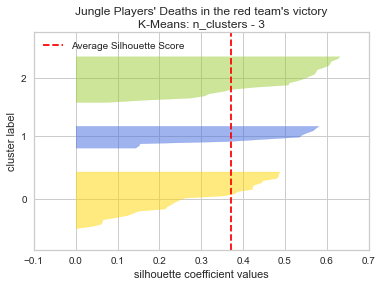

Silhouette score: 0.37103360450496076
0    27
2    22
1    11
Name: cluster, dtype: int64

Inertia: 58.29604357986885

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   9468.851852   5110.185185  -0.407407
1        1   3408.636364   3142.909091   0.363636
2        2   4257.227273  10279.409091  -0.545455

In [207]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "royalblue", "yellowgreen"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [208]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2097.208510   2355.958750   0.624159
1        1   2009.101213   1547.706130   0.481046
2        2   1811.695989   1586.454127   0.497930

In [209]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           13252.0            6841.0           10560.0   
1        1            6790.0            1000.0            6031.0   
2        2            8663.0            1129.0           13699.0   

   min coordinate_y  max timestamp  min timestamp  
0            1516.0              1             -1  
1             864.0              1              0  
2            7386.0              0             -1

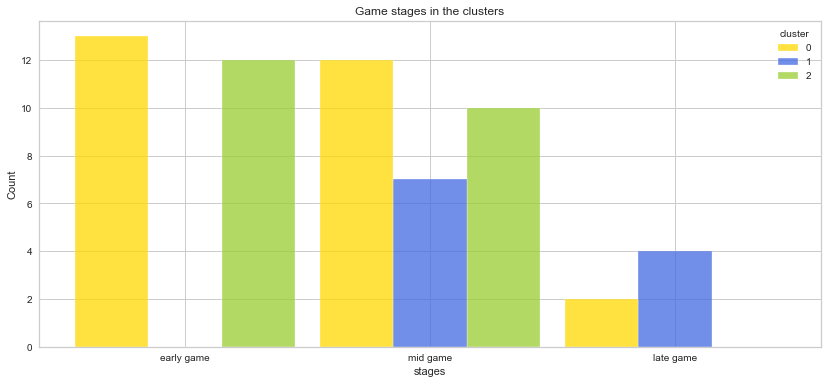

In [210]:
stagesPerClusterV2(redSideVictory_df, colors)

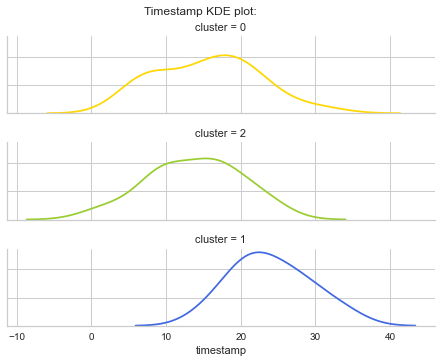

In [211]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [212]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Belveth         7
Nocturne        2
Evelynn         2
Neeko           1

Deaths with each champion:

In [213]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Belveth     35
Nocturne    13
Evelynn     11
Neeko        1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [214]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 4 champions when they won on the red side

Cluster 0 - died with 4 champions:
 ['Belveth' 'Evelynn' 'Neeko' 'Nocturne']
Belveth     13
Nocturne     8
Evelynn      5
Neeko        1
Name: champion, dtype: int64

Cluster 1 - died with 2 champions:
 ['Belveth' 'Evelynn']
Belveth    8
Evelynn    3
Name: champion, dtype: int64

Cluster 2 - died with 3 champions:
 ['Belveth' 'Evelynn' 'Nocturne']
Belveth     14
Nocturne     5
Evelynn      3
Name: champion, dtype: int64



---
#### Clustering Red Team Defeat

In [215]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Silver")]

redSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team      summoner region champion  timestamp  \
8153   EUW1_6391498470  Red  anonymous 79   euw1  Belveth   4.696233   
8161   EUW1_6391498470  Red  anonymous 79   euw1  Belveth   8.312917   
8170   EUW1_6391498470  Red  anonymous 79   euw1  Belveth  11.466067   
8178   EUW1_6391498470  Red  anonymous 79   euw1  Belveth  14.886567   
8183   EUW1_6391498470  Red  anonymous 79   euw1  Belveth  16.344233   
...                ...  ...           ...    ...      ...        ...   
56665  EUW1_6407440557  Red  anonymous 79   euw1  XinZhao  30.490867   
63173  EUW1_6407529013  Red  anonymous 79   euw1  Belveth   2.932583   
63237  EUW1_6407529013  Red  anonymous 79   euw1  Belveth  29.568033   
63243  EUW1_6407529013  Red  anonymous 79   euw1  Belveth  31.327067   
63251  EUW1_6407529013  Red  anonymous 79   euw1  Belveth  34.445933   

       coordinate_x  coordinate_y  level  minionsKilled  ...  trueDamageTaken  \
8153        13111.0        7446.0    NaN            NaN  ...              NaN   
8161         4417.0       10071.0    NaN            NaN  ...              NaN   
8170        11928.0        2128.0    NaN            NaN  ...              NaN   
8178         9080.0        9547.0    NaN            NaN  ...              NaN   
8183         4913.0       11586.0    NaN            NaN  ...              NaN   
...             ...           ...    ...            ...  ...              ...   
56665        8586.0        8794.0    NaN            NaN  ...              NaN   
63173        3026.0        8050.0    NaN            NaN  ...              NaN   
63237        4690.0       10344.0    NaN            NaN  ...              NaN   
63243        3626.0        9357.0    NaN            NaN  ...              NaN   
63251        9192.0        6196.0    NaN            NaN  ...              NaN   

       victory  eventType  skillSlot  buildingType  lane  monster  itemName  \
8153     False      Death        NaN           NaN   NaN      NaN       NaN   
8161     False      Death        NaN           NaN   NaN      NaN       NaN   
8170     False      Death        NaN           NaN   NaN      NaN       NaN   
8178     False      Death        NaN           NaN   NaN      NaN       NaN   
8183     False      Death        NaN           NaN   NaN      NaN       NaN   
...        ...        ...        ...           ...   ...      ...       ...   
56665    False      Death        NaN           NaN   NaN      NaN       NaN   
63173    False      Death        NaN           NaN   NaN      NaN       NaN   
63237    False      Death        NaN           NaN   NaN      NaN       NaN   
63243    False      Death        NaN           NaN   NaN      NaN       NaN   
63251    False      Death        NaN           NaN   NaN      NaN       NaN   

         role    rank  
8153   JUNGLE  Silver  
8161   JUNGLE  Silver  
8170   JUNGLE  Silver  
8178   JUNGLE  Silver  
8183   JUNGLE  Silver  
...       ...     ...  
56665  JUNGLE  Silver  
63173  JUNGLE  Silver  
63237  JUNGLE  Silver  
63243  JUNGLE  Silver  
63251  JUNGLE  Silver  

[174 rows x 56 columns]

In [216]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)].copy()

In [217]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 141 lost 4 matches on the red side
anonymous 141 has an average of 7.75 deaths per game when losing on the red side

anonymous 68 lost 3 matches on the red side
anonymous 68 has an average of 11.333333333333334 deaths per game when losing on the red side

anonymous 79 lost 12 matches on the red side
anonymous 79 has an average of 9.083333333333334 deaths per game when losing on the red side



In [218]:
print("Defeat games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 19 matches in which the jungler died at least once
3 players died a total of 174 times on the red side
Defeat games on red side contains an average of 9.157894736842104 deaths per game


In [219]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
8153        13111.0        7446.0   4.696233
8161         4417.0       10071.0   8.312917
8170        11928.0        2128.0  11.466067
8178         9080.0        9547.0  14.886567
8183         4913.0       11586.0  16.344233
...             ...           ...        ...
56665        8586.0        8794.0  30.490867
63173        3026.0        8050.0   2.932583
63237        4690.0       10344.0  29.568033
63243        3626.0        9357.0  31.327067
63251        9192.0        6196.0  34.445933

[174 rows x 3 columns]

Time discretization

In [220]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [221]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [222]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [223]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [224]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
8153       1.520781      0.067828         -1
8161      -1.390096      0.920056         -1
8170       1.124696     -1.658707         -1
8178       0.171144      0.749935         -1
8183      -1.224028      1.411914          0
...             ...           ...        ...
56665      0.005746      0.505467          1
63173     -1.855822      0.263921         -1
63237     -1.298691      1.008688          1
63243     -1.654934      0.688250          1
63251      0.208643     -0.337996          1

[174 rows x 3 columns]

In [225]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3103384649335874
Silhouette score for k=3: 0.31696336227714245
Silhouette score for k=4: 0.3098668666201244
Silhouette score for k=5: 0.3247154344552052
Silhouette score for k=6: 0.3210811114322751
Silhouette score for k=7: 0.30894558550019097
Silhouette score for k=8: 0.3365945470750568
Silhouette score for k=9: 0.3471131203827044
Silhouette score for k=10: 0.36465172913438393
Silhouette score for k=11: 0.3871089865314808
Silhouette score for k=12: 0.38875934393714695
Silhouette score for k=13: 0.37885698295496323
Silhouette score for k=14: 0.40271757324233504
Silhouette score for k=15: 0.3898684165003177
Silhouette score for k=16: 0.41145179309253266
Silhouette score for k=17: 0.4116804048785022
Silhouette score for k=18: 0.4312135104237085
Silhouette score for k=19: 0.40608440086132047
Silhouette score for k=20: 0.41743301253190723
Silhouette score for k=25: 0.44960344147039955


K-Means with k = 3

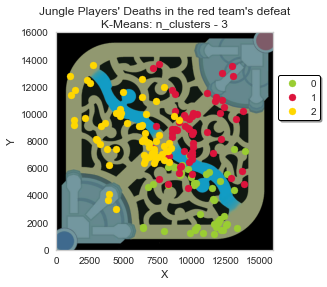

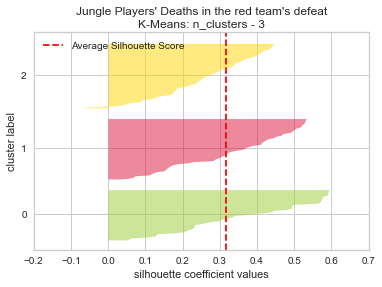

Silhouette score: 0.31696336227714245
2    64
1    60
0    50
Name: cluster, dtype: int64

Inertia: 213.14885601384114

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  10583.660000   3782.420000  -0.500000
1        1  10033.016667   8714.966667   0.766667
2        2   5622.093750   8550.515625  -0.140625

In [226]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "crimson", "gold"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [227]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1832.206130   2012.601978   0.538516
1        1   1775.072933   2283.369425   0.422953
2        2   2193.520413   2155.151118   0.658293

In [228]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           13896.0            6379.0            7446.0   
1        1           13823.0            7082.0           13668.0   
2        2            9080.0            1055.0           13633.0   

   min coordinate_y  max timestamp  min timestamp  
0            1133.0              1             -1  
1            4538.0              1              0  
2            2998.0              1             -1

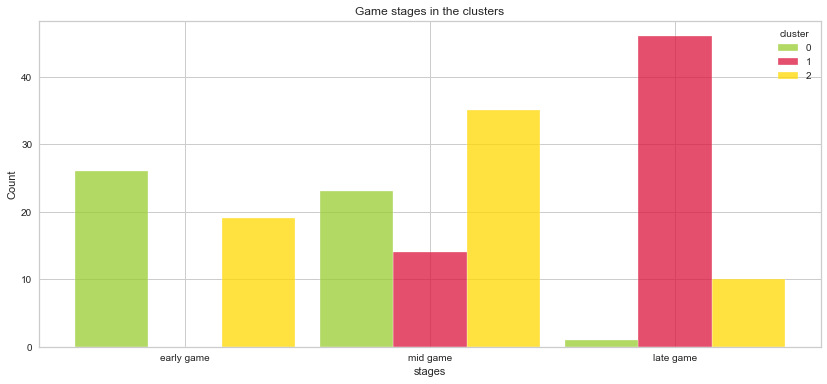

In [229]:
stagesPerClusterV2(redSideDefeat_df, colors)

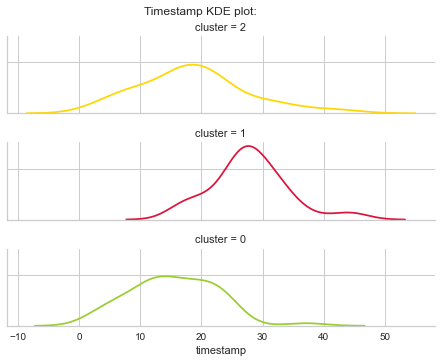

In [230]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [231]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Neeko           4
Nocturne        4
Talon           3
Belveth         3
Evelynn         2
JarvanIV        1
Vi              1
XinZhao         1

Deaths with each champion:

In [232]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Neeko       41
Nocturne    39
Talon       28
Belveth     24
Evelynn     18
Vi           9
JarvanIV     8
XinZhao      7
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [233]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 8 champions when they won on the red side

Cluster 0 - died with 8 champions:
 ['Belveth' 'Evelynn' 'JarvanIV' 'Neeko' 'Nocturne' 'Talon' 'Vi' 'XinZhao']
Nocturne    15
Neeko       11
Talon        7
Evelynn      7
Belveth      4
JarvanIV     3
Vi           2
XinZhao      1
Name: champion, dtype: int64

Cluster 1 - died with 8 champions:
 ['Belveth' 'Evelynn' 'JarvanIV' 'Neeko' 'Nocturne' 'Talon' 'Vi' 'XinZhao']
Neeko       13
Nocturne    12
Belveth     11
Talon       10
JarvanIV     4
XinZhao      4
Evelynn      3
Vi           3
Name: champion, dtype: int64

Cluster 2 - died with 8 champions:
 ['Belveth' 'Evelynn' 'JarvanIV' 'Neeko' 'Nocturne' 'Talon' 'Vi' 'XinZhao']
Neeko       17
Nocturne    12
Talon       11
Belveth      9
Evelynn      8
Vi           4
XinZhao      2
JarvanIV     1
Name: champion, dtype: int64



---
#### Clustering Blue Team Victory

In [234]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Silver")]

blueSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team      summoner region champion  timestamp  \
8320   EUW1_6390273943  Blue  anonymous 79   euw1  Belveth   6.841400   
8356   EUW1_6390273943  Blue  anonymous 79   euw1  Belveth  18.882517   
8361   EUW1_6390273943  Blue  anonymous 79   euw1  Belveth  20.463817   
8367   EUW1_6390273943  Blue  anonymous 79   euw1  Belveth  21.562767   
8878   EUW1_6388919968  Blue  anonymous 79   euw1    Neeko   6.174500   
...                ...   ...           ...    ...      ...        ...   
56790  EUW1_6406061272  Blue  anonymous 79   euw1  Belveth   8.278000   
56794  EUW1_6406061272  Blue  anonymous 79   euw1  Belveth   9.160617   
56804  EUW1_6406061272  Blue  anonymous 79   euw1  Belveth  13.118650   
56810  EUW1_6406061272  Blue  anonymous 79   euw1  Belveth  14.423033   
56835  EUW1_6406061272  Blue  anonymous 79   euw1  Belveth  21.645283   

       coordinate_x  coordinate_y  level  minionsKilled  ...  trueDamageTaken  \
8320         6918.0        7316.0    NaN            NaN  ...              NaN   
8356         7861.0        8213.0    NaN            NaN  ...              NaN   
8361         4540.0        9229.0    NaN            NaN  ...              NaN   
8367         2961.0         933.0    NaN            NaN  ...              NaN   
8878        11582.0        1386.0    NaN            NaN  ...              NaN   
...             ...           ...    ...            ...  ...              ...   
56790        5426.0       10712.0    NaN            NaN  ...              NaN   
56794        1487.0       11239.0    NaN            NaN  ...              NaN   
56804        8268.0        7738.0    NaN            NaN  ...              NaN   
56810        7044.0        8008.0    NaN            NaN  ...              NaN   
56835       10356.0        8770.0    NaN            NaN  ...              NaN   

       victory  eventType  skillSlot  buildingType  lane  monster  itemName  \
8320      True      Death        NaN           NaN   NaN      NaN       NaN   
8356      True      Death        NaN           NaN   NaN      NaN       NaN   
8361      True      Death        NaN           NaN   NaN      NaN       NaN   
8367      True      Death        NaN           NaN   NaN      NaN       NaN   
8878      True      Death        NaN           NaN   NaN      NaN       NaN   
...        ...        ...        ...           ...   ...      ...       ...   
56790     True      Death        NaN           NaN   NaN      NaN       NaN   
56794     True      Death        NaN           NaN   NaN      NaN       NaN   
56804     True      Death        NaN           NaN   NaN      NaN       NaN   
56810     True      Death        NaN           NaN   NaN      NaN       NaN   
56835     True      Death        NaN           NaN   NaN      NaN       NaN   

         role    rank  
8320   JUNGLE  Silver  
8356   JUNGLE  Silver  
8361   JUNGLE  Silver  
8367   JUNGLE  Silver  
8878   JUNGLE  Silver  
...       ...     ...  
56790  JUNGLE  Silver  
56794  JUNGLE  Silver  
56804  JUNGLE  Silver  
56810  JUNGLE  Silver  
56835  JUNGLE  Silver  

[85 rows x 56 columns]

In [235]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)].copy()

In [236]:
blueSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [237]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

18

In [238]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

42.857142857142854

In [239]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_jungler_deaths_df.shape[0]) * 100
winRateBlueSide

3.3151326053042123

In [240]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 141 won 8 matches on the blue side
anonymous 141 has an average of 4.5 deaths per game when winning on the blue side

anonymous 68 won 1 matches on the blue side
anonymous 68 has an average of 5.0 deaths per game when winning on the blue side

anonymous 79 won 9 matches on the blue side
anonymous 79 has an average of 4.888888888888889 deaths per game when winning on the blue side



In [241]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 18 matches in which the jungler died at least once
3 players died a total of 85 times on the blue side
Victory games on blue side contains an average of 4.722222222222222 deaths per game


In [242]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
8320         6918.0        7316.0   6.841400
8356         7861.0        8213.0  18.882517
8361         4540.0        9229.0  20.463817
8367         2961.0         933.0  21.562767
8878        11582.0        1386.0   6.174500
...             ...           ...        ...
56790        5426.0       10712.0   8.278000
56794        1487.0       11239.0   9.160617
56804        8268.0        7738.0  13.118650
56810        7044.0        8008.0  14.423033
56835       10356.0        8770.0  21.645283

[85 rows x 3 columns]

Time discretization

In [243]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [244]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [245]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [246]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [247]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
8320      -0.348722      0.034353         -1
8356      -0.080061      0.327499          0
8361      -1.026217      0.659535          0
8367      -1.476076     -2.051656          0
8878       0.980057     -1.903613         -1
...             ...           ...        ...
56790     -0.773795      1.144190         -1
56794     -1.896021      1.316417         -1
56804      0.035894      0.172266         -1
56810     -0.312825      0.260504         -1
56835      0.630768      0.509531          0

[85 rows x 3 columns]

In [248]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3451725077908939
Silhouette score for k=3: 0.362441595863717
Silhouette score for k=4: 0.3325844985519961
Silhouette score for k=5: 0.3268741088692431
Silhouette score for k=6: 0.331368236603732
Silhouette score for k=7: 0.3421146719178717
Silhouette score for k=8: 0.3482455523678659
Silhouette score for k=9: 0.3564994810233707
Silhouette score for k=10: 0.3533851148201715
Silhouette score for k=11: 0.3682250563190824
Silhouette score for k=12: 0.4000046496895136
Silhouette score for k=13: 0.38334793348657326
Silhouette score for k=14: 0.4090772678974692
Silhouette score for k=15: 0.41346644255369563
Silhouette score for k=16: 0.41177095472926506
Silhouette score for k=17: 0.4026503420042877
Silhouette score for k=18: 0.3989915493244177
Silhouette score for k=19: 0.42712816777818063
Silhouette score for k=20: 0.4417837457137189
Silhouette score for k=25: 0.45397853166210506


K-Means with k = 3

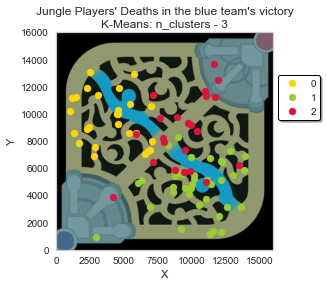

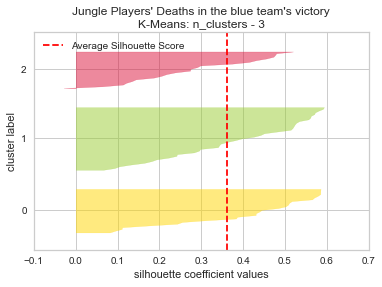

Silhouette score: 0.362441595863717
1    37
0    26
2    22
Name: cluster, dtype: int64

Inertia: 90.22610171231746

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   4024.307692   9634.230769  -0.538462
1        1  10308.945946   4670.216216  -0.648649
2        2   9364.000000   8619.863636   0.727273

In [249]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "crimson"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [250]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1989.248269   1797.180833   0.498519
1        1   2304.659369   1868.367319   0.477392
2        2   2135.860716   2589.537029   0.445362

In [251]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            7044.0            1035.0           13096.0   
1        1           13891.0            2961.0            8285.0   
2        2           13470.0            4222.0           13695.0   

   min coordinate_y  max timestamp  min timestamp  
0            6889.0              0             -1  
1             933.0              0             -1  
2            3871.0              1              0

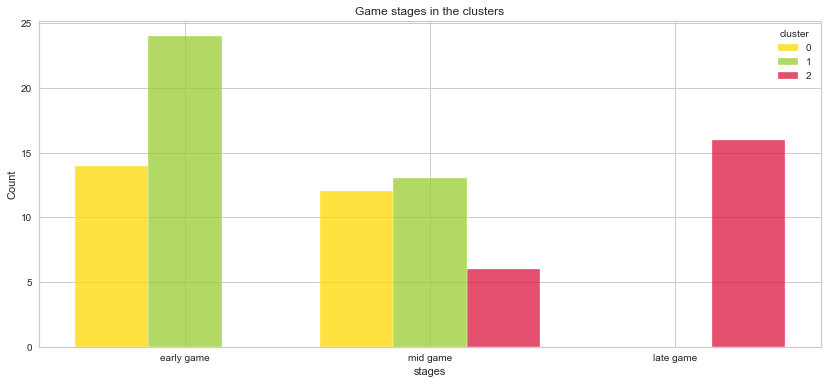

In [252]:
stagesPerClusterV2(blueSideVictory_df, colors)

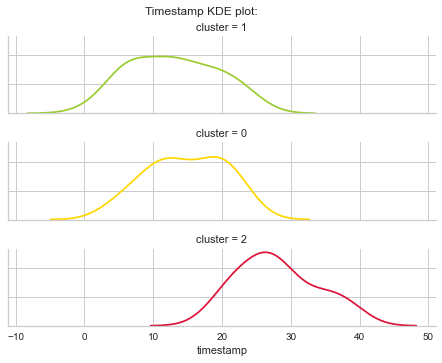

In [253]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [254]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Neeko           4
Belveth         3
JarvanIV        2
MasterYi        2
Nocturne        2
Rammus          2
Shyvana         1
Evelynn         1
Vi              1

Deaths with each champion:

In [255]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Neeko       22
MasterYi    13
Belveth     12
JarvanIV     9
Nocturne     9
Rammus       6
Shyvana      5
Evelynn      5
Vi           4
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [256]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 9 champions when they won on the red side

Cluster 0 - died with 8 champions:
 ['Belveth' 'JarvanIV' 'MasterYi' 'Neeko' 'Nocturne' 'Rammus' 'Shyvana'
 'Vi']
Neeko       8
Belveth     5
MasterYi    5
JarvanIV    2
Shyvana     2
Vi          2
Rammus      1
Nocturne    1
Name: champion, dtype: int64

Cluster 1 - died with 8 champions:
 ['Belveth' 'Evelynn' 'JarvanIV' 'MasterYi' 'Neeko' 'Nocturne' 'Rammus'
 'Vi']
Neeko       10
Nocturne     7
MasterYi     5
Belveth      4
JarvanIV     3
Rammus       3
Evelynn      3
Vi           2
Name: champion, dtype: int64

Cluster 2 - died with 8 champions:
 ['Belveth' 'Evelynn' 'JarvanIV' 'MasterYi' 'Neeko' 'Nocturne' 'Rammus'
 'Shyvana']
Neeko       4
JarvanIV    4
Belveth     3
MasterYi    3
Shyvana     3
Rammus      2
Evelynn     2
Nocturne    1
Name: champion, dtype: int64



---
#### Clustering Blue Team Defeat

In [257]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Silver")]

blueSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team      summoner region  champion  timestamp  \
7969   EUW1_6388960820  Blue  anonymous 68   euw1  Nocturne   9.246683   
7976   EUW1_6388960820  Blue  anonymous 68   euw1  Nocturne  11.149117   
7978   EUW1_6388960820  Blue  anonymous 68   euw1  Nocturne  11.948517   
7984   EUW1_6388960820  Blue  anonymous 68   euw1  Nocturne  14.680700   
7997   EUW1_6388960820  Blue  anonymous 68   euw1  Nocturne  17.851450   
...                ...   ...           ...    ...       ...        ...   
52314  EUW1_6403985754  Blue  anonymous 79   euw1   Belveth  13.947300   
52317  EUW1_6403985754  Blue  anonymous 79   euw1   Belveth  14.809733   
52321  EUW1_6403985754  Blue  anonymous 79   euw1   Belveth  16.218517   
52327  EUW1_6403985754  Blue  anonymous 79   euw1   Belveth  19.303733   
52331  EUW1_6403985754  Blue  anonymous 79   euw1   Belveth  21.019250   

       coordinate_x  coordinate_y  level  minionsKilled  ...  trueDamageTaken  \
7969        10918.0        7177.0    NaN            NaN  ...              NaN   
7976         4771.0        9152.0    NaN            NaN  ...              NaN   
7978         6568.0        6794.0    NaN            NaN  ...              NaN   
7984        11344.0        4512.0    NaN            NaN  ...              NaN   
7997         4951.0        8406.0    NaN            NaN  ...              NaN   
...             ...           ...    ...            ...  ...              ...   
52314       11084.0        5664.0    NaN            NaN  ...              NaN   
52317        1267.0        7622.0    NaN            NaN  ...              NaN   
52321        1900.0        7702.0    NaN            NaN  ...              NaN   
52327       10576.0        2938.0    NaN            NaN  ...              NaN   
52331        3493.0        3578.0    NaN            NaN  ...              NaN   

       victory  eventType  skillSlot  buildingType  lane  monster  itemName  \
7969     False      Death        NaN           NaN   NaN      NaN       NaN   
7976     False      Death        NaN           NaN   NaN      NaN       NaN   
7978     False      Death        NaN           NaN   NaN      NaN       NaN   
7984     False      Death        NaN           NaN   NaN      NaN       NaN   
7997     False      Death        NaN           NaN   NaN      NaN       NaN   
...        ...        ...        ...           ...   ...      ...       ...   
52314    False      Death        NaN           NaN   NaN      NaN       NaN   
52317    False      Death        NaN           NaN   NaN      NaN       NaN   
52321    False      Death        NaN           NaN   NaN      NaN       NaN   
52327    False      Death        NaN           NaN   NaN      NaN       NaN   
52331    False      Death        NaN           NaN   NaN      NaN       NaN   

         role    rank  
7969   JUNGLE  Silver  
7976   JUNGLE  Silver  
7978   JUNGLE  Silver  
7984   JUNGLE  Silver  
7997   JUNGLE  Silver  
...       ...     ...  
52314  JUNGLE  Silver  
52317  JUNGLE  Silver  
52321  JUNGLE  Silver  
52327  JUNGLE  Silver  
52331  JUNGLE  Silver  

[227 rows x 56 columns]

In [258]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)].copy()

In [259]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 141 lost 8 matches on the blue side
anonymous 141 has an average of 9.375 deaths per game when losing on the blue side

anonymous 68 lost 2 matches on the blue side
anonymous 68 has an average of 10.0 deaths per game when losing on the blue side

anonymous 79 lost 14 matches on the blue side
anonymous 79 has an average of 9.428571428571429 deaths per game when losing on the blue side



In [260]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 24 matches in which the jungler died at least once
3 players died a total of 227 times on the blue side
Defeat games on blue side contains an average of 9.458333333333334 deaths per game


In [261]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
7969        10918.0        7177.0   9.246683
7976         4771.0        9152.0  11.149117
7978         6568.0        6794.0  11.948517
7984        11344.0        4512.0  14.680700
7997         4951.0        8406.0  17.851450
...             ...           ...        ...
52314       11084.0        5664.0  13.947300
52317        1267.0        7622.0  14.809733
52321        1900.0        7702.0  16.218517
52327       10576.0        2938.0  19.303733
52331        3493.0        3578.0  21.019250

[227 rows x 3 columns]

Time discretization

In [262]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [263]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [264]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [265]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [266]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
7969       1.147484      0.274228         -1
7976      -0.603417      0.893608         -1
7978      -0.091562      0.154115         -1
7984       1.268825     -0.561543         -1
7997      -0.552146      0.659655          0
...             ...           ...        ...
52314      1.194767     -0.200264         -1
52317     -1.601490      0.413784         -1
52321     -1.421187      0.438873          0
52327      1.050069     -1.055166          0
52331     -0.967440     -0.854455          0

[227 rows x 3 columns]

In [267]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.32484293271025405
Silhouette score for k=3: 0.32268385047898324
Silhouette score for k=4: 0.32245554195868525
Silhouette score for k=5: 0.31982961665062315
Silhouette score for k=6: 0.3286120085343389
Silhouette score for k=7: 0.3261326845702087
Silhouette score for k=8: 0.34767622302160395
Silhouette score for k=9: 0.33980486554016276
Silhouette score for k=10: 0.3474965692750154
Silhouette score for k=11: 0.35970677394271067
Silhouette score for k=12: 0.3451563922645578
Silhouette score for k=13: 0.35108610866385437
Silhouette score for k=14: 0.3659565478094705
Silhouette score for k=15: 0.3652679275739767
Silhouette score for k=16: 0.3781398647160899
Silhouette score for k=17: 0.38220025036359295
Silhouette score for k=18: 0.3764778382298195
Silhouette score for k=19: 0.39866525231091593
Silhouette score for k=20: 0.41082955642940794
Silhouette score for k=25: 0.42805941040106604


K-Means with k = 3

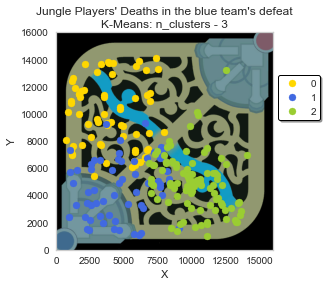

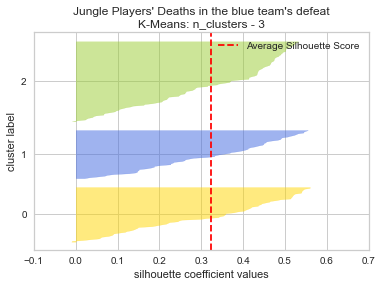

Silhouette score: 0.32268385047898324
2    99
0    68
1    60
Name: cluster, dtype: int64

Inertia: 276.70537116104623

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   4039.220588   9825.632353  -0.514706
1        1   4746.783333   4625.416667   0.733333
2        2  10145.777778   4899.161616  -0.222222

In [268]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "royalblue", "yellowgreen"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [269]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2079.673722   2474.622526   0.629954
1        1   2248.486870   2143.606084   0.442217
2        2   1805.696427   2030.481849   0.746108

In [270]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            7976.0             742.0           14085.0   
1        1            9045.0             930.0            9358.0   
2        2           14070.0            6842.0           13257.0   

   min coordinate_y  max timestamp  min timestamp  
0            5448.0              1             -1  
1            1112.0              1              0  
2             991.0              1             -1

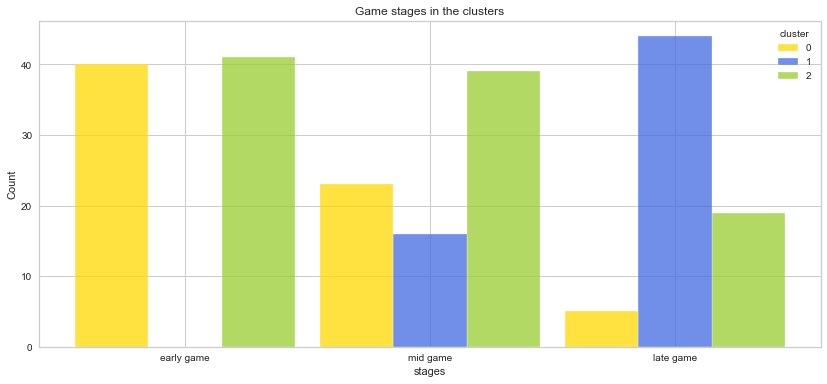

In [271]:
stagesPerClusterV2(blueSideDefeat_df, colors)

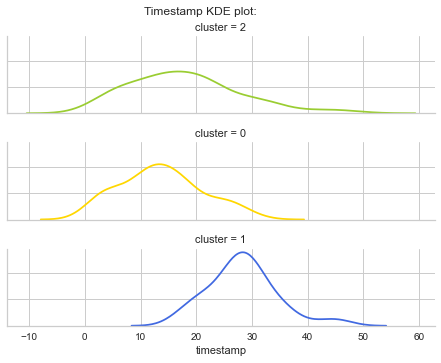

In [272]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [273]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Neeko           6
Evelynn         4
JarvanIV        3
Belveth         3
Nocturne        2
MasterYi        2
Amumu           2
LeeSin          1
Khazix          1

Deaths with each champion:

In [274]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Neeko       65
Evelynn     34
JarvanIV    26
Belveth     25
MasterYi    21
Nocturne    20
Amumu       18
Khazix      10
LeeSin       8
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [275]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 9 champions when they won on the red side

Cluster 0 - died with 9 champions:
 ['Amumu' 'Belveth' 'Evelynn' 'JarvanIV' 'Khazix' 'LeeSin' 'MasterYi'
 'Neeko' 'Nocturne']
Neeko       19
Nocturne     9
Amumu        8
Evelynn      7
MasterYi     6
JarvanIV     6
Belveth      5
LeeSin       4
Khazix       4
Name: champion, dtype: int64

Cluster 1 - died with 9 champions:
 ['Amumu' 'Belveth' 'Evelynn' 'JarvanIV' 'Khazix' 'LeeSin' 'MasterYi'
 'Neeko' 'Nocturne']
Neeko       22
Belveth      9
JarvanIV     7
MasterYi     5
Evelynn      5
Khazix       4
Nocturne     3
Amumu        3
LeeSin       2
Name: champion, dtype: int64

Cluster 2 - died with 9 champions:
 ['Amumu' 'Belveth' 'Evelynn' 'JarvanIV' 'Khazix' 'LeeSin' 'MasterYi'
 'Neeko' 'Nocturne']
Neeko       24
Evelynn     22
JarvanIV    13
Belveth     11
MasterYi    10
Nocturne     8
Amumu        7
LeeSin       2
Khazix       2
Name: champion, dtype: int64



---
### Gold Players

#### Clustering Red Team Victory

In [276]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]

redSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)]
redSideVictory_df

gameId team       summoner region champion  timestamp  \
14495  EUW1_6387757031  Red  anonymous 138   euw1   LeeSin   5.746867   
14523  EUW1_6387757031  Red  anonymous 138   euw1   LeeSin  18.062933   
14541  EUW1_6387757031  Red  anonymous 138   euw1   LeeSin  22.238250   
14549  EUW1_6387757031  Red  anonymous 138   euw1   LeeSin  24.866567   
15482  EUW1_6392503189  Red  anonymous 153   euw1  Belveth   2.938167   
...                ...  ...            ...    ...      ...        ...   
61143  EUW1_6405362027  Red  anonymous 172   euw1   Singed   3.813783   
63995  EUW1_6407810599  Red  anonymous 172   euw1    Viego  19.547567   
64004  EUW1_6407810599  Red  anonymous 172   euw1    Viego  25.212050   
64012  EUW1_6407810599  Red  anonymous 172   euw1    Viego  27.111500   
64019  EUW1_6407810599  Red  anonymous 172   euw1    Viego  30.194417   

       coordinate_x  coordinate_y  level  minionsKilled  ...  trueDamageTaken  \
14495        1479.0       10281.0    NaN            NaN  ...              NaN   
14523        5831.0        7272.0    NaN            NaN  ...              NaN   
14541        3122.0        9130.0    NaN            NaN  ...              NaN   
14549        4900.0        4834.0    NaN            NaN  ...              NaN   
15482        8003.0        7974.0    NaN            NaN  ...              NaN   
...             ...           ...    ...            ...  ...              ...   
61143       11043.0        4443.0    NaN            NaN  ...              NaN   
63995       13405.0        3908.0    NaN            NaN  ...              NaN   
64004        8455.0        9787.0    NaN            NaN  ...              NaN   
64012        7934.0        8580.0    NaN            NaN  ...              NaN   
64019        6263.0        7130.0    NaN            NaN  ...              NaN   

       victory  eventType  skillSlot  buildingType  lane  monster  itemName  \
14495     True      Death        NaN           NaN   NaN      NaN       NaN   
14523     True      Death        NaN           NaN   NaN      NaN       NaN   
14541     True      Death        NaN           NaN   NaN      NaN       NaN   
14549     True      Death        NaN           NaN   NaN      NaN       NaN   
15482     True      Death        NaN           NaN   NaN      NaN       NaN   
...        ...        ...        ...           ...   ...      ...       ...   
61143     True      Death        NaN           NaN   NaN      NaN       NaN   
63995     True      Death        NaN           NaN   NaN      NaN       NaN   
64004     True      Death        NaN           NaN   NaN      NaN       NaN   
64012     True      Death        NaN           NaN   NaN      NaN       NaN   
64019     True      Death        NaN           NaN   NaN      NaN       NaN   

         role  rank  
14495  JUNGLE  Gold  
14523  JUNGLE  Gold  
14541  JUNGLE  Gold  
14549  JUNGLE  Gold  
15482  JUNGLE  Gold  
...       ...   ...  
61143  JUNGLE  Gold  
63995  JUNGLE  Gold  
64004  JUNGLE  Gold  
64012  JUNGLE  Gold  
64019  JUNGLE  Gold  

[135 rows x 56 columns]

In [277]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)].copy()

In [278]:
redSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [279]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

30

In [280]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

47.61904761904761

In [281]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_jungler_deaths_df.shape[0]) * 100
winRateRedSide

6.037567084078712

In [282]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 138 won 1 matches on the red side
anonymous 138 has an average of 4.0 deaths per game when winning on the red side

anonymous 153 won 2 matches on the red side
anonymous 153 has an average of 7.5 deaths per game when winning on the red side

anonymous 155 won 8 matches on the red side
anonymous 155 has an average of 3.25 deaths per game when winning on the red side

anonymous 172 won 19 matches on the red side
anonymous 172 has an average of 4.7368421052631575 deaths per game when winning on the red side



In [283]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 30 matches in which the jungler died at least once
4 players died a total of 135 times on the red side
Victory games on red side contains an average of 4.5 deaths per game


In [284]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
14495        1479.0       10281.0   5.746867
14523        5831.0        7272.0  18.062933
14541        3122.0        9130.0  22.238250
14549        4900.0        4834.0  24.866567
15482        8003.0        7974.0   2.938167
...             ...           ...        ...
61143       11043.0        4443.0   3.813783
63995       13405.0        3908.0  19.547567
64004        8455.0        9787.0  25.212050
64012        7934.0        8580.0  27.111500
64019        6263.0        7130.0  30.194417

[135 rows x 3 columns]

Time discretization

In [285]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [286]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [287]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [288]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [289]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
14495     -1.741338      1.315848         -1
14523     -0.379535      0.296856          0
14541     -1.227220      0.926064          0
14549     -0.670858     -0.528767          0
15482      0.300115      0.534587         -1
...             ...           ...        ...
61143      1.251374     -0.661179         -1
63995      1.990478     -0.842355          0
64004      0.441552      1.148556          1
64012      0.278524      0.739808          1
64019     -0.244356      0.248768          1

[135 rows x 3 columns]

In [290]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.28804532713601955
Silhouette score for k=3: 0.31705217107547384
Silhouette score for k=4: 0.3417616562525791
Silhouette score for k=5: 0.33603069503155986
Silhouette score for k=6: 0.3300787865039546
Silhouette score for k=7: 0.34020904884894426
Silhouette score for k=8: 0.354332918502359
Silhouette score for k=9: 0.3645829567992683
Silhouette score for k=10: 0.3389844742881299
Silhouette score for k=11: 0.35831207202798715
Silhouette score for k=12: 0.3536798740478629
Silhouette score for k=13: 0.3626734288044075
Silhouette score for k=14: 0.3779964084809211
Silhouette score for k=15: 0.39205239461937474
Silhouette score for k=16: 0.4001558850605005
Silhouette score for k=17: 0.4117791897380391
Silhouette score for k=18: 0.4094719863903183
Silhouette score for k=19: 0.4264544786786984
Silhouette score for k=20: 0.3925308576960292
Silhouette score for k=25: 0.4172597200112551


K-Means with k = 3

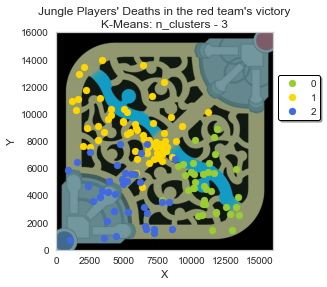

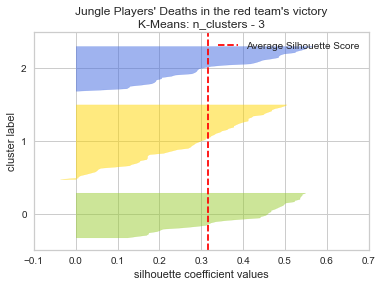

Silhouette score: 0.31705217107547384
1    61
2    37
0    37
Name: cluster, dtype: int64

Inertia: 173.84303453700088

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  11084.567568   4651.216216  -0.270270
1        1   5832.639344   8832.688525  -0.426230
2        2   5000.189189   4121.378378   0.567568

In [291]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "royalblue"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [292]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1288.783578   1825.288472   0.793509
1        1   2292.193266   1959.663149   0.711936
2        2   2004.373014   2036.015058   0.495414

In [293]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           13479.0            7832.0            8860.0   
1        1           11200.0            1159.0           13934.0   
2        2            8795.0             911.0            7762.0   

   min coordinate_y  max timestamp  min timestamp  
0            1424.0              1             -1  
1            4644.0              1             -1  
2             710.0              1              0

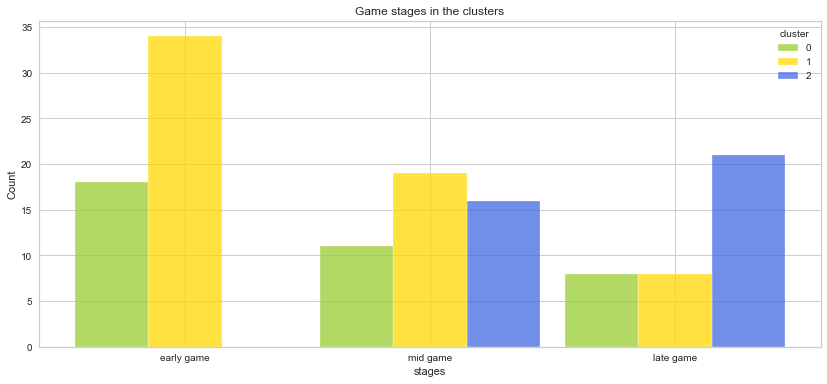

In [294]:
stagesPerClusterV2(redSideVictory_df, colors)

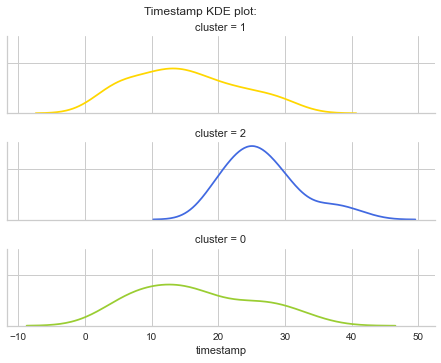

In [295]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [296]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Viego         15
Kayn           9
LeeSin         1
Hecarim        1
Belveth        1
Ekko           1
Singed         1
Taliyah        1

Deaths with each champion:

In [297]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Viego      75
Kayn       32
Hecarim    10
Belveth     9
LeeSin      4
Ekko        3
Taliyah     1
Singed      1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [298]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 8 champions when they won on the red side

Cluster 0 - died with 5 champions:
 ['Belveth' 'Hecarim' 'Kayn' 'Singed' 'Viego']
Viego      25
Kayn        6
Hecarim     4
Belveth     1
Singed      1
Name: champion, dtype: int64

Cluster 1 - died with 6 champions:
 ['Belveth' 'Hecarim' 'Kayn' 'LeeSin' 'Taliyah' 'Viego']
Viego      33
Kayn       17
Belveth     4
LeeSin      3
Hecarim     3
Taliyah     1
Name: champion, dtype: int64

Cluster 2 - died with 6 champions:
 ['Belveth' 'Ekko' 'Hecarim' 'Kayn' 'LeeSin' 'Viego']
Viego      17
Kayn        9
Belveth     4
Hecarim     3
Ekko        3
LeeSin      1
Name: champion, dtype: int64



---
#### Clustering Red Team Defeat

In [299]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]

redSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team       summoner region champion  timestamp  \
15894  EUW1_6389700300  Red  anonymous 153   euw1  Belveth   5.333850   
15897  EUW1_6389700300  Red  anonymous 153   euw1  Belveth   6.793183   
15901  EUW1_6389700300  Red  anonymous 153   euw1  Belveth   8.865317   
15907  EUW1_6389700300  Red  anonymous 153   euw1  Belveth  10.759850   
15913  EUW1_6389700300  Red  anonymous 153   euw1  Belveth  12.247583   
...                ...  ...            ...    ...      ...        ...   
60425  EUW1_6406952992  Red  anonymous 172   euw1  Taliyah  24.314683   
60436  EUW1_6406952992  Red  anonymous 172   euw1  Taliyah  29.570167   
60442  EUW1_6406952992  Red  anonymous 172   euw1  Taliyah  30.814083   
60451  EUW1_6406952992  Red  anonymous 172   euw1  Taliyah  34.094133   
60453  EUW1_6406952992  Red  anonymous 172   euw1  Taliyah  35.174650   

       coordinate_x  coordinate_y  level  minionsKilled  ...  trueDamageTaken  \
15894        7242.0        6574.0    NaN            NaN  ...              NaN   
15897       11688.0        6586.0    NaN            NaN  ...              NaN   
15901        8930.0        6064.0    NaN            NaN  ...              NaN   
15907        3926.0       13636.0    NaN            NaN  ...              NaN   
15913       11554.0        1412.0    NaN            NaN  ...              NaN   
...             ...           ...    ...            ...  ...              ...   
60425       12477.0        9431.0    NaN            NaN  ...              NaN   
60436       10620.0        9950.0    NaN            NaN  ...              NaN   
60442       12193.0       10447.0    NaN            NaN  ...              NaN   
60451       12987.0        9802.0    NaN            NaN  ...              NaN   
60453       12866.0       13041.0    NaN            NaN  ...              NaN   

       victory  eventType  skillSlot  buildingType  lane  monster  itemName  \
15894    False      Death        NaN           NaN   NaN      NaN       NaN   
15897    False      Death        NaN           NaN   NaN      NaN       NaN   
15901    False      Death        NaN           NaN   NaN      NaN       NaN   
15907    False      Death        NaN           NaN   NaN      NaN       NaN   
15913    False      Death        NaN           NaN   NaN      NaN       NaN   
...        ...        ...        ...           ...   ...      ...       ...   
60425    False      Death        NaN           NaN   NaN      NaN       NaN   
60436    False      Death        NaN           NaN   NaN      NaN       NaN   
60442    False      Death        NaN           NaN   NaN      NaN       NaN   
60451    False      Death        NaN           NaN   NaN      NaN       NaN   
60453    False      Death        NaN           NaN   NaN      NaN       NaN   

         role  rank  
15894  JUNGLE  Gold  
15897  JUNGLE  Gold  
15901  JUNGLE  Gold  
15907  JUNGLE  Gold  
15913  JUNGLE  Gold  
...       ...   ...  
60425  JUNGLE  Gold  
60436  JUNGLE  Gold  
60442  JUNGLE  Gold  
60451  JUNGLE  Gold  
60453  JUNGLE  Gold  

[211 rows x 56 columns]

In [300]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)].copy()

In [301]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 138 lost 1 matches on the red side
anonymous 138 has an average of 6.0 deaths per game when losing on the red side

anonymous 153 lost 4 matches on the red side
anonymous 153 has an average of 12.0 deaths per game when losing on the red side

anonymous 155 lost 11 matches on the red side
anonymous 155 has an average of 4.7272727272727275 deaths per game when losing on the red side

anonymous 172 lost 15 matches on the red side
anonymous 172 has an average of 5.933333333333334 deaths per game when losing on the red side

anonymous 179 lost 2 matches on the red side
anonymous 179 has an average of 8.0 deaths per game when losing on the red side



In [302]:
print("Defeat games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 33 matches in which the jungler died at least once
5 players died a total of 211 times on the red side
Defeat games on red side contains an average of 6.393939393939394 deaths per game


In [303]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
15894        7242.0        6574.0   5.333850
15897       11688.0        6586.0   6.793183
15901        8930.0        6064.0   8.865317
15907        3926.0       13636.0  10.759850
15913       11554.0        1412.0  12.247583
...             ...           ...        ...
60425       12477.0        9431.0  24.314683
60436       10620.0        9950.0  29.570167
60442       12193.0       10447.0  30.814083
60451       12987.0        9802.0  34.094133
60453       12866.0       13041.0  35.174650

[211 rows x 3 columns]

Time discretization

In [304]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [305]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [306]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [307]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [308]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
15894     -0.399073     -0.331931         -1
15897      0.972296     -0.328227         -1
15901      0.121591     -0.489337         -1
15907     -1.421894      1.847680         -1
15913      0.930964     -1.925127         -1
...             ...           ...        ...
60425      1.215664      0.549852          0
60436      0.642872      0.710036          1
60442      1.128064      0.863429          1
60451      1.372973      0.664357          1
60453      1.335651      1.664040          1

[211 rows x 3 columns]

In [309]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3538205090616487
Silhouette score for k=3: 0.3428122560285914
Silhouette score for k=4: 0.3262581776149016
Silhouette score for k=5: 0.3332353530558503
Silhouette score for k=6: 0.3304737946435769
Silhouette score for k=7: 0.3450797701515286
Silhouette score for k=8: 0.3267008797933027
Silhouette score for k=9: 0.34166876594722007
Silhouette score for k=10: 0.32607544857178167
Silhouette score for k=11: 0.3564704312547738
Silhouette score for k=12: 0.3579377026923956
Silhouette score for k=13: 0.3576080272423452
Silhouette score for k=14: 0.37537237818853847
Silhouette score for k=15: 0.3920099898998963
Silhouette score for k=16: 0.3755980419450875
Silhouette score for k=17: 0.39673438845237263
Silhouette score for k=18: 0.3927917656336081
Silhouette score for k=19: 0.3870983883392395
Silhouette score for k=20: 0.37908884298083445
Silhouette score for k=25: 0.3947491776760784


K-Means with k = 3

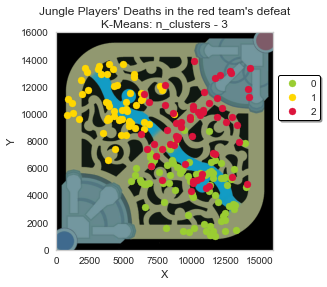

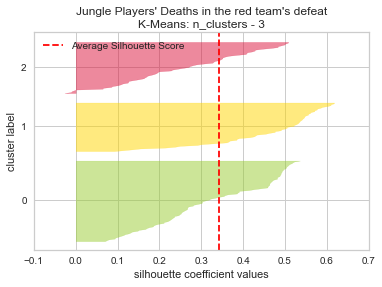

Silhouette score: 0.3428122560285914
0    94
2    60
1    57
Name: cluster, dtype: int64

Inertia: 233.84047032061346

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   9918.606383   4997.478723  -0.595745
1        1   4428.210526  10727.543860  -0.421053
2        2  10271.616667   8880.066667   0.616667

In [310]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "crimson"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [311]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2212.809792   2007.825360   0.511966
1        1   1725.231007   1652.443667   0.619773
2        2   2103.856729   2544.350584   0.486198

In [312]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           13969.0            5492.0            9731.0   
1        1            8682.0             828.0           13673.0   
2        2           14252.0            6276.0           13869.0   

   min coordinate_y  max timestamp  min timestamp  
0            1018.0              1             -1  
1            6640.0              1             -1  
2            4324.0              1              0

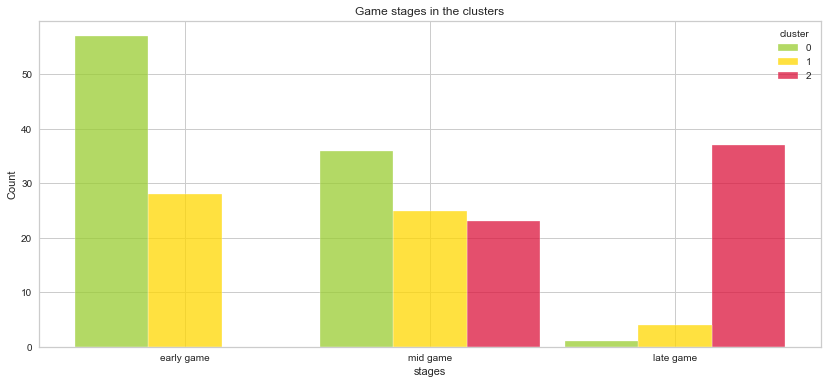

In [313]:
stagesPerClusterV2(redSideDefeat_df, colors)

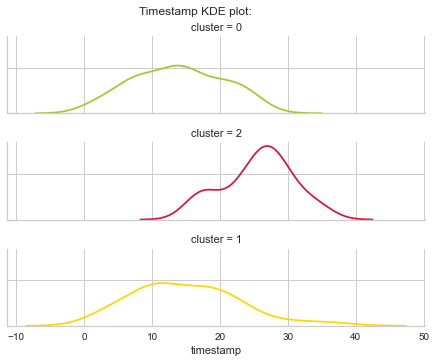

In [314]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [315]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Viego            13
Kayn              9
Belveth           3
Hecarim           2
Taliyah           2
Khazix            1
MonkeyKing        1
LeeSin            1
Sylas             1

Deaths with each champion:

In [316]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Viego         75
Kayn          44
Belveth       34
Hecarim       16
Sylas         14
Taliyah       14
LeeSin         6
Khazix         5
MonkeyKing     3
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [317]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 9 champions when they won on the red side

Cluster 0 - died with 9 champions:
 ['Belveth' 'Hecarim' 'Kayn' 'Khazix' 'LeeSin' 'MonkeyKing' 'Sylas'
 'Taliyah' 'Viego']
Viego         33
Kayn          21
Belveth       16
Sylas          6
LeeSin         5
Hecarim        5
Taliyah        5
Khazix         2
MonkeyKing     1
Name: champion, dtype: int64

Cluster 1 - died with 8 champions:
 ['Belveth' 'Hecarim' 'Kayn' 'Khazix' 'LeeSin' 'Sylas' 'Taliyah' 'Viego']
Viego      20
Belveth    12
Kayn       10
Sylas       6
Hecarim     4
Taliyah     3
Khazix      1
LeeSin      1
Name: champion, dtype: int64

Cluster 2 - died with 8 champions:
 ['Belveth' 'Hecarim' 'Kayn' 'Khazix' 'MonkeyKing' 'Sylas' 'Taliyah'
 'Viego']
Viego         22
Kayn          13
Hecarim        7
Belveth        6
Taliyah        6
MonkeyKing     2
Khazix         2
Sylas          2
Name: champion, dtype: int64



---
#### Clustering Blue Team Victory

In [318]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]

blueSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team       summoner region champion  timestamp  \
14322  EUW1_6389440477  Blue  anonymous 129   euw1      Zac   5.685967   
14341  EUW1_6389440477  Blue  anonymous 129   euw1      Zac  10.421117   
14353  EUW1_6389440477  Blue  anonymous 129   euw1      Zac  13.832833   
14369  EUW1_6389440477  Blue  anonymous 129   euw1      Zac  19.949583   
15752  EUW1_6390956328  Blue  anonymous 153   euw1     Nunu  12.017367   
...                ...   ...            ...    ...      ...        ...   
60910  EUW1_6405416698  Blue  anonymous 172   euw1      Zac  21.443400   
60948  EUW1_6405416698  Blue  anonymous 172   euw1      Zac  33.124267   
63901  EUW1_6407724842  Blue  anonymous 155   euw1     Kayn  12.577367   
63918  EUW1_6407724842  Blue  anonymous 155   euw1     Kayn  18.249800   
63923  EUW1_6407724842  Blue  anonymous 155   euw1     Kayn  19.345400   

       coordinate_x  coordinate_y  level  minionsKilled  ...  trueDamageTaken  \
14322        7747.0        5097.0    NaN            NaN  ...              NaN   
14341        4615.0        9372.0    NaN            NaN  ...              NaN   
14353       10118.0        4498.0    NaN            NaN  ...              NaN   
14369       10218.0        4479.0    NaN            NaN  ...              NaN   
15752        7842.0        8335.0    NaN            NaN  ...              NaN   
...             ...           ...    ...            ...  ...              ...   
60910        4670.0        7999.0    NaN            NaN  ...              NaN   
60948       10157.0        8735.0    NaN            NaN  ...              NaN   
63901        9705.0        5339.0    NaN            NaN  ...              NaN   
63918        9256.0        9190.0    NaN            NaN  ...              NaN   
63923        6868.0        4248.0    NaN            NaN  ...              NaN   

       victory  eventType  skillSlot  buildingType  lane  monster  itemName  \
14322     True      Death        NaN           NaN   NaN      NaN       NaN   
14341     True      Death        NaN           NaN   NaN      NaN       NaN   
14353     True      Death        NaN           NaN   NaN      NaN       NaN   
14369     True      Death        NaN           NaN   NaN      NaN       NaN   
15752     True      Death        NaN           NaN   NaN      NaN       NaN   
...        ...        ...        ...           ...   ...      ...       ...   
60910     True      Death        NaN           NaN   NaN      NaN       NaN   
60948     True      Death        NaN           NaN   NaN      NaN       NaN   
63901     True      Death        NaN           NaN   NaN      NaN       NaN   
63918     True      Death        NaN           NaN   NaN      NaN       NaN   
63923     True      Death        NaN           NaN   NaN      NaN       NaN   

         role  rank  
14322  JUNGLE  Gold  
14341  JUNGLE  Gold  
14353  JUNGLE  Gold  
14369  JUNGLE  Gold  
15752  JUNGLE  Gold  
...       ...   ...  
60910  JUNGLE  Gold  
60948  JUNGLE  Gold  
63901  JUNGLE  Gold  
63918  JUNGLE  Gold  
63923  JUNGLE  Gold  

[208 rows x 56 columns]

In [319]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)].copy()

In [320]:
blueSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [321]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

52

In [322]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

53.06122448979592

In [323]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_jungler_deaths_df.shape[0]) * 100
winRateBlueSide

8.11232449297972

In [324]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 129 won 1 matches on the blue side
anonymous 129 has an average of 4.0 deaths per game when winning on the blue side

anonymous 138 won 1 matches on the blue side
anonymous 138 has an average of 7.0 deaths per game when winning on the blue side

anonymous 153 won 3 matches on the blue side
anonymous 153 has an average of 6.666666666666667 deaths per game when winning on the blue side

anonymous 155 won 15 matches on the blue side
anonymous 155 has an average of 3.1333333333333333 deaths per game when winning on the blue side

anonymous 172 won 29 matches on the blue side
anonymous 172 has an average of 3.896551724137931 deaths per game when winning on the blue side

anonymous 179 won 3 matches on the blue side
anonymous 179 has an average of 5.666666666666667 deaths per game when winning on the blue side



In [325]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 52 matches in which the jungler died at least once
6 players died a total of 208 times on the blue side
Victory games on blue side contains an average of 4.0 deaths per game


In [326]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
14322        7747.0        5097.0   5.685967
14341        4615.0        9372.0  10.421117
14353       10118.0        4498.0  13.832833
14369       10218.0        4479.0  19.949583
15752        7842.0        8335.0  12.017367
...             ...           ...        ...
60910        4670.0        7999.0  21.443400
60948       10157.0        8735.0  33.124267
63901        9705.0        5339.0  12.577367
63918        9256.0        9190.0  18.249800
63923        6868.0        4248.0  19.345400

[208 rows x 3 columns]

Time discretization

In [327]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [328]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [329]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [330]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [331]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
14322     -0.092906     -0.780894         -1
14341     -1.017515      0.608551         -1
14353      0.607046     -0.975578         -1
14369      0.636567     -0.981754          0
15752     -0.064860      0.271509         -1
...             ...           ...        ...
60910     -1.001278      0.162303          0
60948      0.618559      0.401515          1
63901      0.485123     -0.702240         -1
63918      0.352572      0.549398          0
63923     -0.352399     -1.056833          0

[208 rows x 3 columns]

In [332]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3457555962773372
Silhouette score for k=3: 0.33149714289738597
Silhouette score for k=4: 0.3364799535193616
Silhouette score for k=5: 0.2986713662231342
Silhouette score for k=6: 0.3148584911982662
Silhouette score for k=7: 0.3018565354909384
Silhouette score for k=8: 0.30829015504676716
Silhouette score for k=9: 0.3150393915487189
Silhouette score for k=10: 0.3131461664083043
Silhouette score for k=11: 0.3211584920815674
Silhouette score for k=12: 0.34219849801429486
Silhouette score for k=13: 0.3576586851352127
Silhouette score for k=14: 0.36119292912464485
Silhouette score for k=15: 0.3550129352822215
Silhouette score for k=16: 0.3600272312264509
Silhouette score for k=17: 0.3715405716390055
Silhouette score for k=18: 0.37943053383952025
Silhouette score for k=19: 0.37783893708323796
Silhouette score for k=20: 0.39480445139732817
Silhouette score for k=25: 0.4125276516434001


K-Means with k = 3

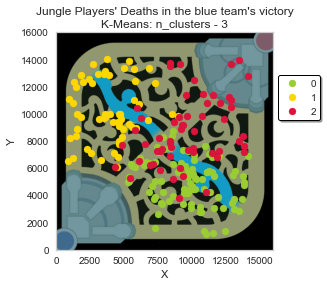

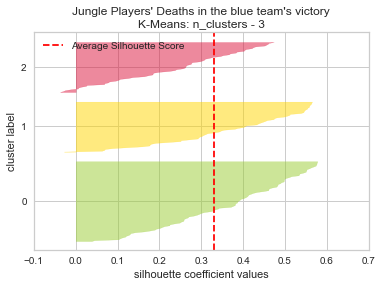

Silhouette score: 0.33149714289738597
0    92
1    58
2    58
Name: cluster, dtype: int64

Inertia: 245.93509196518468

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   9687.163043   5011.521739  -0.630435
1        1   3941.034483  10196.137931  -0.465517
2        2   9604.068966   8749.775862   0.637931

In [333]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "crimson"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [334]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2233.278995   1676.876123   0.525799
1        1   1878.614878   2149.580179   0.649018
2        2   2481.748646   2492.822940   0.480599

In [335]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14105.0            5282.0            8744.0   
1        1            8990.0             895.0           14006.0   
2        2           14148.0            4349.0           13995.0   

   min coordinate_y  max timestamp  min timestamp  
0            1169.0              1             -1  
1            6099.0              1             -1  
2            3789.0              1              0

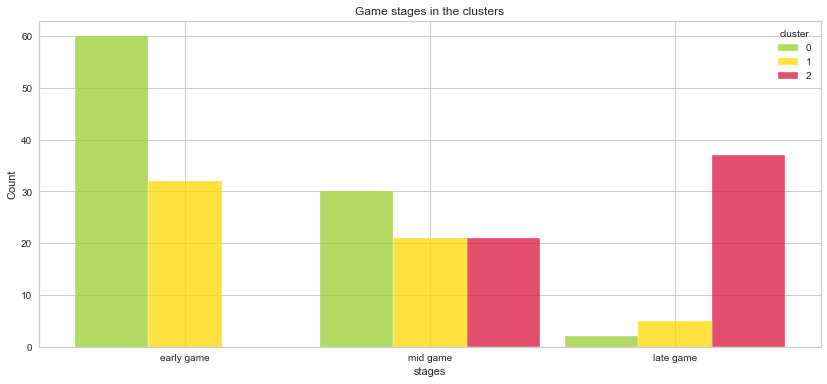

In [336]:
stagesPerClusterV2(blueSideVictory_df, colors)

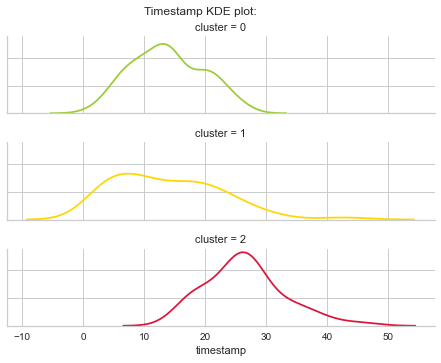

In [337]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [338]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Viego         20
Kayn          14
Belveth        2
Zac            2
Hecarim        2
Sejuani        2
Taliyah        2
Vi             1
Nunu           1
Maokai         1
Diana          1
Neeko          1
Karthus        1
XinZhao        1
Singed         1

Deaths with each champion:

In [339]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Viego      68
Kayn       46
Hecarim    13
Zac        10
Nunu       10
Belveth    10
Neeko      10
Taliyah     9
Karthus     7
XinZhao     6
Vi          4
Diana       4
Sejuani     4
Singed      4
Maokai      3
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [340]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 15 champions when they won on the red side

Cluster 0 - died with 14 champions:
 ['Belveth' 'Diana' 'Hecarim' 'Karthus' 'Kayn' 'Maokai' 'Neeko' 'Nunu'
 'Sejuani' 'Taliyah' 'Vi' 'Viego' 'XinZhao' 'Zac']
Viego      31
Kayn       22
Hecarim     6
Taliyah     6
Zac         5
Nunu        4
Karthus     4
Vi          3
Neeko       3
XinZhao     3
Belveth     2
Maokai      1
Diana       1
Sejuani     1
Name: champion, dtype: int64

Cluster 1 - died with 12 champions:
 ['Belveth' 'Diana' 'Hecarim' 'Karthus' 'Kayn' 'Maokai' 'Neeko' 'Singed'
 'Taliyah' 'Viego' 'XinZhao' 'Zac']
Viego      20
Kayn       10
Belveth     5
Zac         4
Hecarim     4
Neeko       3
Taliyah     3
Singed      3
Maokai      2
Diana       2
Karthus     1
XinZhao     1
Name: champion, dtype: int64

Cluster 2 - died with 13 champions:
 ['Belveth' 'Diana' 'Hecarim' 'Karthus' 'Kayn' 'Neeko' 'Nunu' 'Sejuani'
 'Singed' 'Vi' 'Viego' 'XinZhao' 'Zac']
Viego      17
Kayn       14
Nunu        6
Neeko      

---
#### Clustering Blue Team Defeat

In [341]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]

blueSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team       summoner region champion  timestamp  \
14210  EUW1_6391949591  Blue  anonymous 129   euw1    Poppy  13.549267   
14233  EUW1_6391949591  Blue  anonymous 129   euw1    Poppy  19.101950   
14251  EUW1_6391949591  Blue  anonymous 129   euw1    Poppy  27.971283   
14257  EUW1_6391949591  Blue  anonymous 129   euw1    Poppy  30.104850   
14284  EUW1_6391949591  Blue  anonymous 129   euw1    Poppy  39.403617   
...                ...   ...            ...    ...      ...        ...   
63869  EUW1_6407896909  Blue  anonymous 153   euw1  Kindred  30.355200   
64052  EUW1_6407761926  Blue  anonymous 172   euw1    Viego   3.635767   
64060  EUW1_6407761926  Blue  anonymous 172   euw1    Viego   6.848700   
64075  EUW1_6407761926  Blue  anonymous 172   euw1    Viego  12.076533   
64078  EUW1_6407761926  Blue  anonymous 172   euw1    Viego  13.335150   

       coordinate_x  coordinate_y  level  minionsKilled  ...  trueDamageTaken  \
14210       10643.0         882.0    NaN            NaN  ...              NaN   
14233        5995.0        8645.0    NaN            NaN  ...              NaN   
14251        4856.0       10346.0    NaN            NaN  ...              NaN   
14257       11001.0        3533.0    NaN            NaN  ...              NaN   
14284       10978.0        3618.0    NaN            NaN  ...              NaN   
...             ...           ...    ...            ...  ...              ...   
63869        1543.0        2138.0    NaN            NaN  ...              NaN   
64052       11589.0        2129.0    NaN            NaN  ...              NaN   
64060       11220.0        4287.0    NaN            NaN  ...              NaN   
64075       11809.0        2140.0    NaN            NaN  ...              NaN   
64078        4986.0        6000.0    NaN            NaN  ...              NaN   

       victory  eventType  skillSlot  buildingType  lane  monster  itemName  \
14210    False      Death        NaN           NaN   NaN      NaN       NaN   
14233    False      Death        NaN           NaN   NaN      NaN       NaN   
14251    False      Death        NaN           NaN   NaN      NaN       NaN   
14257    False      Death        NaN           NaN   NaN      NaN       NaN   
14284    False      Death        NaN           NaN   NaN      NaN       NaN   
...        ...        ...        ...           ...   ...      ...       ...   
63869    False      Death        NaN           NaN   NaN      NaN       NaN   
64052    False      Death        NaN           NaN   NaN      NaN       NaN   
64060    False      Death        NaN           NaN   NaN      NaN       NaN   
64075    False      Death        NaN           NaN   NaN      NaN       NaN   
64078    False      Death        NaN           NaN   NaN      NaN       NaN   

         role  rank  
14210  JUNGLE  Gold  
14233  JUNGLE  Gold  
14251  JUNGLE  Gold  
14257  JUNGLE  Gold  
14284  JUNGLE  Gold  
...       ...   ...  
63869  JUNGLE  Gold  
64052  JUNGLE  Gold  
64060  JUNGLE  Gold  
64075  JUNGLE  Gold  
64078  JUNGLE  Gold  

[328 rows x 56 columns]

In [342]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)].copy()

In [343]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 129 lost 1 matches on the blue side
anonymous 129 has an average of 10.0 deaths per game when losing on the blue side

anonymous 138 lost 1 matches on the blue side
anonymous 138 has an average of 4.0 deaths per game when losing on the blue side

anonymous 153 lost 5 matches on the blue side
anonymous 153 has an average of 14.0 deaths per game when losing on the blue side

anonymous 155 lost 10 matches on the blue side
anonymous 155 has an average of 5.0 deaths per game when losing on the blue side

anonymous 172 lost 26 matches on the blue side
anonymous 172 has an average of 6.846153846153846 deaths per game when losing on the blue side

anonymous 179 lost 3 matches on the blue side
anonymous 179 has an average of 5.333333333333333 deaths per game when losing on the blue side



In [344]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 46 matches in which the jungler died at least once
6 players died a total of 328 times on the blue side
Defeat games on blue side contains an average of 7.130434782608695 deaths per game


In [345]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
14210       10643.0         882.0  13.549267
14233        5995.0        8645.0  19.101950
14251        4856.0       10346.0  27.971283
14257       11001.0        3533.0  30.104850
14284       10978.0        3618.0  39.403617
...             ...           ...        ...
63869        1543.0        2138.0  30.355200
64052       11589.0        2129.0   3.635767
64060       11220.0        4287.0   6.848700
64075       11809.0        2140.0  12.076533
64078        4986.0        6000.0  13.335150

[328 rows x 3 columns]

Time discretization

In [346]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [347]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [348]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [349]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [350]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
14210      1.103957     -1.617726         -1
14233     -0.294071      0.708866          0
14251     -0.636659      1.218661          1
14257      1.211636     -0.823214          1
14284      1.204718     -0.797739          1
...             ...           ...        ...
63869     -1.633145     -1.241299          1
64052      1.388495     -1.243997         -1
64060      1.277507     -0.597238         -1
64075      1.454666     -1.240700         -1
64078     -0.597558     -0.083847         -1

[328 rows x 3 columns]

In [351]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3275295038088564
Silhouette score for k=3: 0.31145293654566825
Silhouette score for k=4: 0.314057223400562
Silhouette score for k=5: 0.30494192553390637
Silhouette score for k=6: 0.2959595080275352
Silhouette score for k=7: 0.3120538074498595
Silhouette score for k=8: 0.323572260422055
Silhouette score for k=9: 0.31448505353107403
Silhouette score for k=10: 0.32037531943387443
Silhouette score for k=11: 0.3329305745098848
Silhouette score for k=12: 0.3394877120923663
Silhouette score for k=13: 0.3543347943290807
Silhouette score for k=14: 0.3587865882958336
Silhouette score for k=15: 0.35231064712725224
Silhouette score for k=16: 0.35871782121031587
Silhouette score for k=17: 0.35791492278431064
Silhouette score for k=18: 0.362676286907324
Silhouette score for k=19: 0.3707245723485629
Silhouette score for k=20: 0.365359165631333
Silhouette score for k=25: 0.3762848165700351


K-Means with k = 3

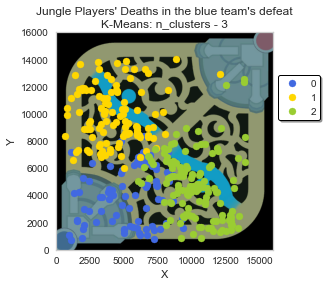

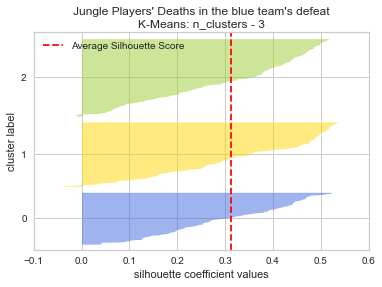

Silhouette score: 0.31145293654566825
2    131
1    109
0     88
Name: cluster, dtype: int64

Inertia: 393.54680008848374

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   5442.397727   4069.693182   0.488636
1        1   4329.091743   9856.706422  -0.247706
2        2  10200.312977   4788.167939  -0.442748

In [352]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "gold", "yellowgreen"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [353]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2185.516548   2054.884350   0.499871
1        1   1975.937699   2017.463656   0.718765
2        2   1847.466502   2345.304209   0.678574

In [354]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            9371.0             995.0            8387.0   
1        1           12068.0             693.0           14025.0   
2        2           13924.0            6018.0           12584.0   

   min coordinate_y  max timestamp  min timestamp  
0             695.0              1              0  
1            6000.0              1             -1  
2             874.0              1             -1

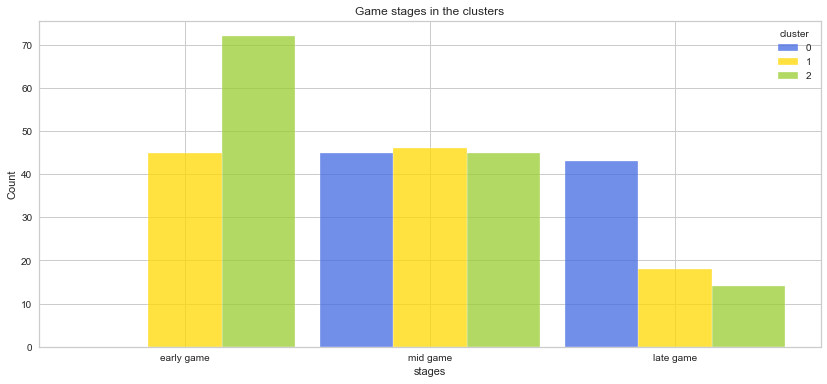

In [355]:
stagesPerClusterV2(blueSideDefeat_df, colors)

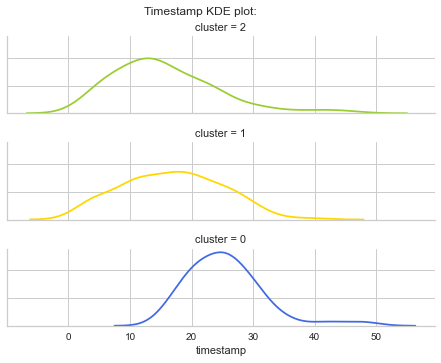

In [356]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [357]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Viego          23
Kayn            8
Belveth         1
Nunu            1
Taliyah         1
Ekko            1
Sejuani         1
Warwick         1
Khazix          1
Poppy           1
JarvanIV        1
Nocturne        1
Sylas           1
Diana           1
LeeSin          1
Vi              1
Kindred         1

Deaths with each champion:

In [358]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Viego       161
Kayn         37
Warwick      20
Kindred      16
Sylas        14
Nunu         11
Poppy        10
Khazix        9
Belveth       9
JarvanIV      7
Diana         7
Sejuani       6
Taliyah       6
Vi            5
Nocturne      4
LeeSin        4
Ekko          2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [359]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 17 champions when they won on the red side

Cluster 0 - died with 14 champions:
 ['Belveth' 'Diana' 'JarvanIV' 'Kayn' 'Khazix' 'Kindred' 'Nocturne' 'Nunu'
 'Poppy' 'Sylas' 'Taliyah' 'Vi' 'Viego' 'Warwick']
Viego       37
Kayn        13
Kindred      7
Sylas        5
JarvanIV     4
Poppy        3
Belveth      3
Vi           3
Warwick      3
Nunu         3
Diana        2
Nocturne     2
Khazix       2
Taliyah      1
Name: champion, dtype: int64

Cluster 1 - died with 16 champions:
 ['Belveth' 'Diana' 'Ekko' 'Kayn' 'Khazix' 'Kindred' 'LeeSin' 'Nocturne'
 'Nunu' 'Poppy' 'Sejuani' 'Sylas' 'Taliyah' 'Vi' 'Viego' 'Warwick']
Viego       54
Kayn        16
Warwick      9
Sylas        5
Khazix       4
Sejuani      3
Nunu         3
Kindred      3
Poppy        2
LeeSin       2
Belveth      2
Diana        2
Nocturne     1
Vi           1
Taliyah      1
Ekko         1
Name: champion, dtype: int64

Cluster 2 - died with 17 champions:
 ['Belveth' 'Diana' 'Ekko' 'JarvanIV' 'Kayn

---
### Platinum Players

#### Clustering Red Team Victory

In [360]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Platinum")]

redSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)]
redSideVictory_df

gameId team      summoner region champion  timestamp  \
1518   EUW1_6391919487  Red  anonymous 21   euw1     Kayn   4.546083   
1534   EUW1_6391919487  Red  anonymous 21   euw1     Kayn  10.632200   
1560   EUW1_6391919487  Red  anonymous 21   euw1     Kayn  19.721400   
1575   EUW1_6391919487  Red  anonymous 21   euw1     Kayn  24.142583   
1581   EUW1_6391919487  Red  anonymous 21   euw1     Kayn  26.083650   
...                ...  ...           ...    ...      ...        ...   
63028  EUW1_6407685127  Red  anonymous 37   euw1    Viego  10.683600   
63036  EUW1_6407685127  Red  anonymous 37   euw1    Viego  13.181100   
63044  EUW1_6407685127  Red  anonymous 37   euw1    Viego  15.123717   
63048  EUW1_6407685127  Red  anonymous 37   euw1    Viego  16.302150   
63054  EUW1_6407685127  Red  anonymous 37   euw1    Viego  18.632300   

       coordinate_x  coordinate_y  level  minionsKilled  ...  trueDamageTaken  \
1518         7421.0        6233.0    NaN            NaN  ...              NaN   
1534         7510.0        4689.0    NaN            NaN  ...              NaN   
1560         8386.0        6324.0    NaN            NaN  ...              NaN   
1575         6524.0       11268.0    NaN            NaN  ...              NaN   
1581        10577.0        5210.0    NaN            NaN  ...              NaN   
...             ...           ...    ...            ...  ...              ...   
63028        4903.0       10638.0    NaN            NaN  ...              NaN   
63036        8741.0        6697.0    NaN            NaN  ...              NaN   
63044        6721.0        6299.0    NaN            NaN  ...              NaN   
63048        4835.0        7075.0    NaN            NaN  ...              NaN   
63054        6093.0        8954.0    NaN            NaN  ...              NaN   

       victory  eventType  skillSlot  buildingType  lane  monster  itemName  \
1518      True      Death        NaN           NaN   NaN      NaN       NaN   
1534      True      Death        NaN           NaN   NaN      NaN       NaN   
1560      True      Death        NaN           NaN   NaN      NaN       NaN   
1575      True      Death        NaN           NaN   NaN      NaN       NaN   
1581      True      Death        NaN           NaN   NaN      NaN       NaN   
...        ...        ...        ...           ...   ...      ...       ...   
63028     True      Death        NaN           NaN   NaN      NaN       NaN   
63036     True      Death        NaN           NaN   NaN      NaN       NaN   
63044     True      Death        NaN           NaN   NaN      NaN       NaN   
63048     True      Death        NaN           NaN   NaN      NaN       NaN   
63054     True      Death        NaN           NaN   NaN      NaN       NaN   

         role      rank  
1518   JUNGLE  Platinum  
1534   JUNGLE  Platinum  
1560   JUNGLE  Platinum  
1575   JUNGLE  Platinum  
1581   JUNGLE  Platinum  
...       ...       ...  
63028  JUNGLE  Platinum  
63036  JUNGLE  Platinum  
63044  JUNGLE  Platinum  
63048  JUNGLE  Platinum  
63054  JUNGLE  Platinum  

[306 rows x 56 columns]

In [361]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)].copy()

In [362]:
redSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [363]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

57

In [364]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

49.137931034482754

In [365]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_jungler_deaths_df.shape[0]) * 100
winRateRedSide

13.685152057245082

In [366]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 21 won 26 matches on the red side
anonymous 21 has an average of 4.230769230769231 deaths per game when winning on the red side

anonymous 22 won 1 matches on the red side
anonymous 22 has an average of 8.0 deaths per game when winning on the red side

anonymous 34 won 6 matches on the red side
anonymous 34 has an average of 6.0 deaths per game when winning on the red side

anonymous 36 won 12 matches on the red side
anonymous 36 has an average of 5.75 deaths per game when winning on the red side

anonymous 37 won 11 matches on the red side
anonymous 37 has an average of 7.090909090909091 deaths per game when winning on the red side

anonymous 44 won 1 matches on the red side
anonymous 44 has an average of 5.0 deaths per game when winning on the red side



In [367]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 57 matches in which the jungler died at least once
6 players died a total of 306 times on the red side
Victory games on red side contains an average of 5.368421052631579 deaths per game


In [368]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
1518         7421.0        6233.0   4.546083
1534         7510.0        4689.0  10.632200
1560         8386.0        6324.0  19.721400
1575         6524.0       11268.0  24.142583
1581        10577.0        5210.0  26.083650
...             ...           ...        ...
63028        4903.0       10638.0  10.683600
63036        8741.0        6697.0  13.181100
63044        6721.0        6299.0  15.123717
63048        4835.0        7075.0  16.302150
63054        6093.0        8954.0  18.632300

[306 rows x 3 columns]

Time discretization

In [369]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [370]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [371]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [372]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [373]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
1518       0.032706      0.022188         -1
1534       0.059574     -0.481651         -1
1560       0.324028      0.051883          0
1575      -0.238086      1.665212          0
1581       0.985463     -0.311638          1
...             ...           ...        ...
63028     -0.727446      1.459630         -1
63036      0.431198      0.173600         -1
63044     -0.178615      0.043725          0
63048     -0.747974      0.296950          0
63054     -0.368200      0.910106          0

[306 rows x 3 columns]

In [374]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.321418112484334
Silhouette score for k=3: 0.3144659248249129
Silhouette score for k=4: 0.3077660781644125
Silhouette score for k=5: 0.3121362169174667
Silhouette score for k=6: 0.3148901693526763
Silhouette score for k=7: 0.3041751134634541
Silhouette score for k=8: 0.3219228822690984
Silhouette score for k=9: 0.30470143874578826
Silhouette score for k=10: 0.32448550834239653
Silhouette score for k=11: 0.3357765867361168
Silhouette score for k=12: 0.3493508789351027
Silhouette score for k=13: 0.34366410457127694
Silhouette score for k=14: 0.33507820283586237
Silhouette score for k=15: 0.34632430115419627
Silhouette score for k=16: 0.34998897937703866
Silhouette score for k=17: 0.35476440115513586
Silhouette score for k=18: 0.3582048577549763
Silhouette score for k=19: 0.35343645306229676
Silhouette score for k=20: 0.34393233061593986
Silhouette score for k=25: 0.3623041307033212


K-Means with k = 3

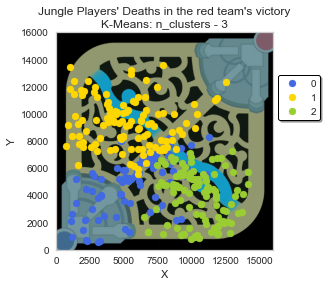

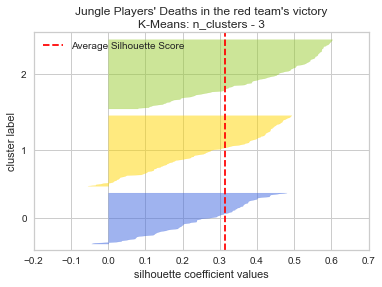

Silhouette score: 0.3144659248249129
1    113
2    111
0     82
Name: cluster, dtype: int64

Inertia: 365.93922574271505

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   5885.219512   4758.426829   0.463415
1        1   5308.000000   9329.761062  -0.336283
2        2  10407.945946   3982.324324  -0.684685

In [375]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "gold", "yellowgreen"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [376]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2630.497542   1966.700400   0.522544
1        1   2602.781042   1767.076934   0.673265
2        2   1750.283364   1852.202011   0.501924

In [377]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           11228.0            1071.0            8328.0   
1        1           12540.0             749.0           13600.0   
2        2           14138.0            6465.0            7252.0   

   min coordinate_y  max timestamp  min timestamp  
0             577.0              1             -1  
1            5556.0              1             -1  
2             788.0              1             -1

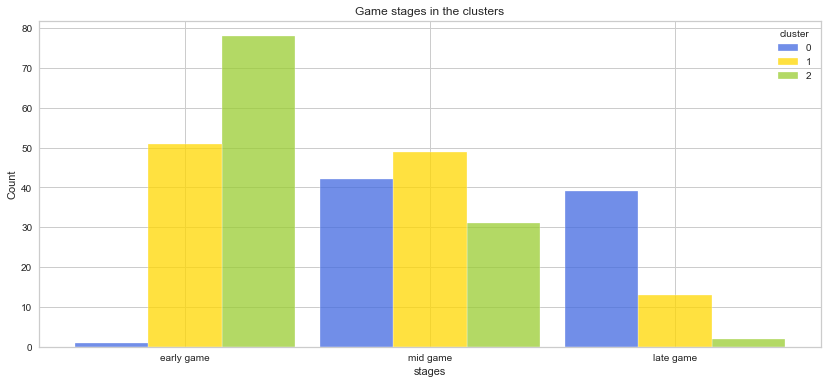

In [378]:
stagesPerClusterV2(redSideVictory_df, colors)

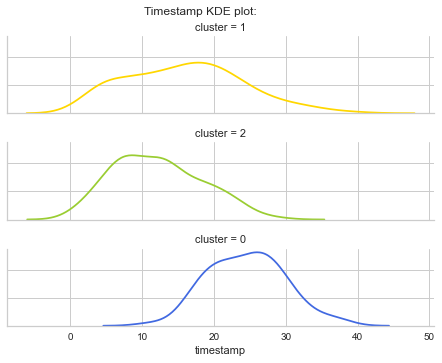

In [379]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [380]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Viego          17
Kayn           12
Jax             6
Udyr            4
Hecarim         3
Belveth         3
Ekko            3
Neeko           2
Volibear        2
MasterYi        2
Rengar          1
Malzahar        1
Khazix          1

Deaths with each champion:

In [381]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Viego       83
Kayn        65
Jax         35
Udyr        27
Belveth     14
Volibear    14
Hecarim     13
Ekko        13
Neeko       11
Malzahar    10
MasterYi    10
Rengar       6
Khazix       5
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [382]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 13 champions when they won on the red side

Cluster 0 - died with 12 champions:
 ['Belveth' 'Ekko' 'Hecarim' 'Jax' 'Kayn' 'Khazix' 'Malzahar' 'MasterYi'
 'Neeko' 'Udyr' 'Viego' 'Volibear']
Kayn        20
Viego       16
Jax          8
Belveth      7
Udyr         7
Hecarim      6
MasterYi     5
Neeko        4
Malzahar     3
Khazix       3
Volibear     2
Ekko         1
Name: champion, dtype: int64

Cluster 1 - died with 13 champions:
 ['Belveth' 'Ekko' 'Hecarim' 'Jax' 'Kayn' 'Khazix' 'Malzahar' 'MasterYi'
 'Neeko' 'Rengar' 'Udyr' 'Viego' 'Volibear']
Viego       34
Kayn        22
Jax         12
Volibear    10
Udyr         8
Ekko         5
Hecarim      4
Rengar       4
MasterYi     4
Belveth      3
Neeko        3
Malzahar     3
Khazix       1
Name: champion, dtype: int64

Cluster 2 - died with 13 champions:
 ['Belveth' 'Ekko' 'Hecarim' 'Jax' 'Kayn' 'Khazix' 'Malzahar' 'MasterYi'
 'Neeko' 'Rengar' 'Udyr' 'Viego' 'Volibear']
Viego       33
Kayn        23
Jax       

---
#### Clustering Red Team Defeat

In [383]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Platinum")]

redSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team      summoner region champion  timestamp  \
1382   EUW1_6392049871  Red  anonymous 21   euw1    Sylas  11.884717   
1385   EUW1_6392049871  Red  anonymous 21   euw1    Sylas  13.014383   
1394   EUW1_6392049871  Red  anonymous 21   euw1    Sylas  18.469150   
1396   EUW1_6392049871  Red  anonymous 21   euw1    Sylas  19.265033   
1423   EUW1_6391969818  Red  anonymous 21   euw1    Viego   9.540533   
...                ...  ...           ...    ...      ...        ...   
62509  EUW1_6407674165  Red  anonymous 36   euw1      Jax  14.620500   
62519  EUW1_6407674165  Red  anonymous 36   euw1      Jax  17.736200   
62526  EUW1_6407674165  Red  anonymous 36   euw1      Jax  19.925200   
62535  EUW1_6407674165  Red  anonymous 36   euw1      Jax  23.589167   
62539  EUW1_6407674165  Red  anonymous 36   euw1      Jax  25.202300   

       coordinate_x  coordinate_y  level  minionsKilled  ...  trueDamageTaken  \
1382         9430.0        9991.0    NaN            NaN  ...              NaN   
1385         9072.0        8394.0    NaN            NaN  ...              NaN   
1394        13271.0        8841.0    NaN            NaN  ...              NaN   
1396        10480.0       10434.0    NaN            NaN  ...              NaN   
1423         6126.0        6707.0    NaN            NaN  ...              NaN   
...             ...           ...    ...            ...  ...              ...   
62509       12157.0        8195.0    NaN            NaN  ...              NaN   
62519        6428.0       13600.0    NaN            NaN  ...              NaN   
62526        8126.0       10056.0    NaN            NaN  ...              NaN   
62535       12517.0       13208.0    NaN            NaN  ...              NaN   
62539        9503.0       11567.0    NaN            NaN  ...              NaN   

       victory  eventType  skillSlot  buildingType  lane  monster  itemName  \
1382     False      Death        NaN           NaN   NaN      NaN       NaN   
1385     False      Death        NaN           NaN   NaN      NaN       NaN   
1394     False      Death        NaN           NaN   NaN      NaN       NaN   
1396     False      Death        NaN           NaN   NaN      NaN       NaN   
1423     False      Death        NaN           NaN   NaN      NaN       NaN   
...        ...        ...        ...           ...   ...      ...       ...   
62509    False      Death        NaN           NaN   NaN      NaN       NaN   
62519    False      Death        NaN           NaN   NaN      NaN       NaN   
62526    False      Death        NaN           NaN   NaN      NaN       NaN   
62535    False      Death        NaN           NaN   NaN      NaN       NaN   
62539    False      Death        NaN           NaN   NaN      NaN       NaN   

         role      rank  
1382   JUNGLE  Platinum  
1385   JUNGLE  Platinum  
1394   JUNGLE  Platinum  
1396   JUNGLE  Platinum  
1423   JUNGLE  Platinum  
...       ...       ...  
62509  JUNGLE  Platinum  
62519  JUNGLE  Platinum  
62526  JUNGLE  Platinum  
62535  JUNGLE  Platinum  
62539  JUNGLE  Platinum  

[494 rows x 56 columns]

In [384]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)].copy()

In [385]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 21 lost 16 matches on the red side
anonymous 21 has an average of 6.5 deaths per game when losing on the red side

anonymous 22 lost 2 matches on the red side
anonymous 22 has an average of 6.0 deaths per game when losing on the red side

anonymous 34 lost 13 matches on the red side
anonymous 34 has an average of 8.615384615384615 deaths per game when losing on the red side

anonymous 36 lost 14 matches on the red side
anonymous 36 has an average of 8.214285714285714 deaths per game when losing on the red side

anonymous 37 lost 14 matches on the red side
anonymous 37 has an average of 10.785714285714286 deaths per game when losing on the red side



In [386]:
print("Defeat games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 59 matches in which the jungler died at least once
5 players died a total of 494 times on the red side
Defeat games on red side contains an average of 8.372881355932204 deaths per game


In [387]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
1382         9430.0        9991.0  11.884717
1385         9072.0        8394.0  13.014383
1394        13271.0        8841.0  18.469150
1396        10480.0       10434.0  19.265033
1423         6126.0        6707.0   9.540533
...             ...           ...        ...
62509       12157.0        8195.0  14.620500
62519        6428.0       13600.0  17.736200
62526        8126.0       10056.0  19.925200
62535       12517.0       13208.0  23.589167
62539        9503.0       11567.0  25.202300

[494 rows x 3 columns]

Time discretization

In [388]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [389]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [390]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [391]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [392]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
1382       0.261452      0.621424         -1
1385       0.152198      0.121266         -1
1394       1.433645      0.261260          0
1396       0.581890      0.760165          0
1423      -0.746860     -0.407079         -1
...             ...           ...        ...
62509      1.093675      0.058942         -1
62519     -0.654695      1.751711          0
62526     -0.136502      0.641781          0
62535      1.203540      1.628942          0
62539      0.283730      1.115004          1

[494 rows x 3 columns]

In [393]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.30528465448430253
Silhouette score for k=3: 0.3141716433379993
Silhouette score for k=4: 0.28428429495737645
Silhouette score for k=5: 0.3035707848260232
Silhouette score for k=6: 0.3124518545543548
Silhouette score for k=7: 0.31077052729446064
Silhouette score for k=8: 0.32125968245666797
Silhouette score for k=9: 0.32943084853523
Silhouette score for k=10: 0.33400196649441766
Silhouette score for k=11: 0.3551279468822261
Silhouette score for k=12: 0.3567497884437347
Silhouette score for k=13: 0.36288431939484295
Silhouette score for k=14: 0.3702187772343122
Silhouette score for k=15: 0.35568561453039466
Silhouette score for k=16: 0.3730404562088891
Silhouette score for k=17: 0.37731922914752253
Silhouette score for k=18: 0.37997977474122074
Silhouette score for k=19: 0.3840806913613412
Silhouette score for k=20: 0.389399822346751
Silhouette score for k=25: 0.41103663154795667


K-Means with k = 3

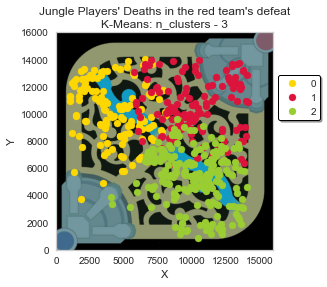

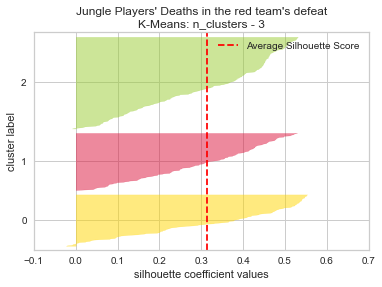

Silhouette score: 0.3141716433379993
2    226
1    141
0    127
Name: cluster, dtype: int64

Inertia: 606.2621763734803

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   4287.700787  10212.110236  -0.370079
1        1  10097.531915  10324.964539   0.553191
2        2  10030.584071   5321.243363  -0.376106

In [394]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "crimson", "yellowgreen"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [395]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1911.133243   2130.864222   0.729612
1        1   2272.108985   2054.669925   0.511229
2        2   2074.222297   1949.800609   0.668610

In [396]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            8078.0            1004.0           14058.0   
1        1           14127.0            5722.0           13993.0   
2        2           14060.0            4056.0            9634.0   

   min coordinate_y  max timestamp  min timestamp  
0            3748.0              1             -1  
1            6283.0              1             -1  
2             854.0              1             -1

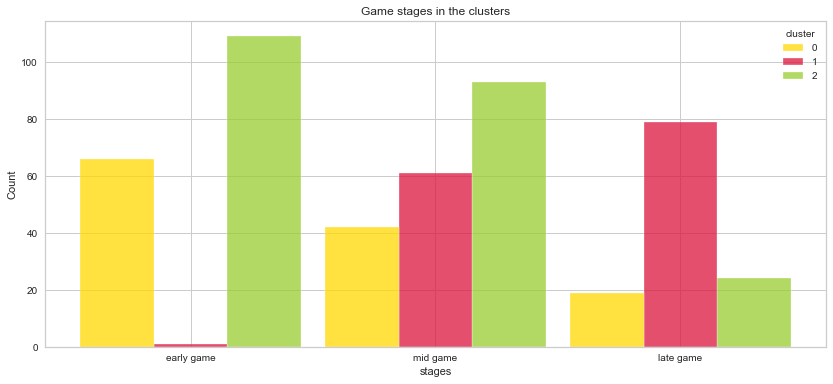

In [397]:
stagesPerClusterV2(redSideDefeat_df, colors)

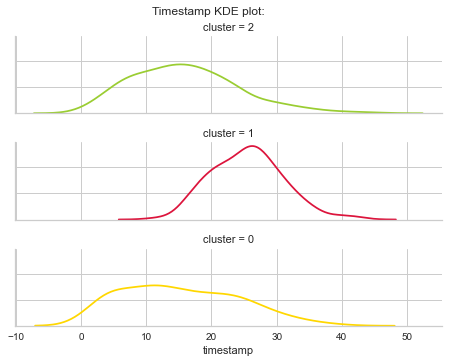

In [398]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [399]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Viego          13
Jax             7
Udyr            7
Belveth         6
Kayn            5
Khazix          5
Neeko           4
Sylas           2
Rengar          2
MasterYi        1
Lillia          1
Hecarim         1
Ekko            1
Volibear        1
XinZhao         1
Nocturne        1
Graves          1

Deaths with each champion:

In [400]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Viego       97
Udyr        72
Jax         61
Khazix      52
Belveth     45
Kayn        38
Neeko       24
Rengar      21
Nocturne    13
Volibear    12
MasterYi    12
XinZhao     11
Ekko         9
Sylas        9
Lillia       8
Hecarim      6
Graves       4
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [401]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 17 champions when they won on the red side

Cluster 0 - died with 16 champions:
 ['Belveth' 'Ekko' 'Graves' 'Hecarim' 'Jax' 'Kayn' 'Khazix' 'Lillia'
 'MasterYi' 'Neeko' 'Nocturne' 'Rengar' 'Udyr' 'Viego' 'Volibear'
 'XinZhao']
Viego       23
Udyr        18
Khazix      18
Jax         14
Belveth     13
Kayn         6
Neeko        6
Rengar       6
Nocturne     5
Volibear     4
MasterYi     4
XinZhao      3
Hecarim      2
Ekko         2
Lillia       2
Graves       1
Name: champion, dtype: int64

Cluster 1 - died with 16 champions:
 ['Belveth' 'Ekko' 'Graves' 'Jax' 'Kayn' 'Khazix' 'Lillia' 'MasterYi'
 'Neeko' 'Nocturne' 'Rengar' 'Sylas' 'Udyr' 'Viego' 'Volibear' 'XinZhao']
Viego       29
Jax         22
Udyr        17
Khazix      12
Kayn        11
Neeko       11
Belveth     10
Rengar       9
XinZhao      4
Sylas        3
Nocturne     3
Volibear     3
Ekko         2
Lillia       2
MasterYi     2
Graves       1
Name: champion, dtype: int64

Cluster 2 - died with 17 

---
#### Clustering Blue Team Victory

In [402]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Platinum")]

blueSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team      summoner region champion  timestamp  \
2055   EUW1_6390398118  Blue  anonymous 21   euw1    Viego  11.151183   
2066   EUW1_6390398118  Blue  anonymous 21   euw1    Viego  14.557483   
2074   EUW1_6390398118  Blue  anonymous 21   euw1    Viego  17.186100   
2079   EUW1_6390398118  Blue  anonymous 21   euw1    Viego  18.681767   
2084   EUW1_6390398118  Blue  anonymous 21   euw1    Viego  20.636400   
...                ...   ...           ...    ...      ...        ...   
62792  EUW1_6408240261  Blue  anonymous 37   euw1   Rengar  13.110083   
62804  EUW1_6408240261  Blue  anonymous 37   euw1   Rengar  17.368683   
62817  EUW1_6408240261  Blue  anonymous 37   euw1   Rengar  21.272050   
62823  EUW1_6408240261  Blue  anonymous 37   euw1   Rengar  23.195167   
62828  EUW1_6408240261  Blue  anonymous 37   euw1   Rengar  24.995033   

       coordinate_x  coordinate_y  level  minionsKilled  ...  trueDamageTaken  \
2055         7326.0        7630.0    NaN            NaN  ...              NaN   
2066        12135.0        1648.0    NaN            NaN  ...              NaN   
2074         9372.0        2192.0    NaN            NaN  ...              NaN   
2079         9784.0        3938.0    NaN            NaN  ...              NaN   
2084        11297.0        9736.0    NaN            NaN  ...              NaN   
...             ...           ...    ...            ...  ...              ...   
62792        2776.0        7950.0    NaN            NaN  ...              NaN   
62804       10012.0        9761.0    NaN            NaN  ...              NaN   
62817        7154.0       11240.0    NaN            NaN  ...              NaN   
62823        7744.0       10907.0    NaN            NaN  ...              NaN   
62828       11004.0       10069.0    NaN            NaN  ...              NaN   

       victory  eventType  skillSlot  buildingType  lane  monster  itemName  \
2055      True      Death        NaN           NaN   NaN      NaN       NaN   
2066      True      Death        NaN           NaN   NaN      NaN       NaN   
2074      True      Death        NaN           NaN   NaN      NaN       NaN   
2079      True      Death        NaN           NaN   NaN      NaN       NaN   
2084      True      Death        NaN           NaN   NaN      NaN       NaN   
...        ...        ...        ...           ...   ...      ...       ...   
62792     True      Death        NaN           NaN   NaN      NaN       NaN   
62804     True      Death        NaN           NaN   NaN      NaN       NaN   
62817     True      Death        NaN           NaN   NaN      NaN       NaN   
62823     True      Death        NaN           NaN   NaN      NaN       NaN   
62828     True      Death        NaN           NaN   NaN      NaN       NaN   

         role      rank  
2055   JUNGLE  Platinum  
2066   JUNGLE  Platinum  
2074   JUNGLE  Platinum  
2079   JUNGLE  Platinum  
2084   JUNGLE  Platinum  
...       ...       ...  
62792  JUNGLE  Platinum  
62804  JUNGLE  Platinum  
62817  JUNGLE  Platinum  
62823  JUNGLE  Platinum  
62828  JUNGLE  Platinum  

[335 rows x 56 columns]

In [403]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)].copy()

In [404]:
blueSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [405]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

65

In [406]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

53.71900826446281

In [407]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_jungler_deaths_df.shape[0]) * 100
winRateBlueSide

13.065522620904838

In [408]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 21 won 22 matches on the blue side
anonymous 21 has an average of 4.818181818181818 deaths per game when winning on the blue side

anonymous 22 won 6 matches on the blue side
anonymous 22 has an average of 4.666666666666667 deaths per game when winning on the blue side

anonymous 34 won 8 matches on the blue side
anonymous 34 has an average of 4.0 deaths per game when winning on the blue side

anonymous 36 won 11 matches on the blue side
anonymous 36 has an average of 4.636363636363637 deaths per game when winning on the blue side

anonymous 37 won 17 matches on the blue side
anonymous 37 has an average of 6.647058823529412 deaths per game when winning on the blue side

anonymous 44 won 1 matches on the blue side
anonymous 44 has an average of 5.0 deaths per game when winning on the blue side



In [409]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 65 matches in which the jungler died at least once
6 players died a total of 335 times on the blue side
Victory games on blue side contains an average of 5.153846153846154 deaths per game


In [410]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
2055         7326.0        7630.0  11.151183
2066        12135.0        1648.0  14.557483
2074         9372.0        2192.0  17.186100
2079         9784.0        3938.0  18.681767
2084        11297.0        9736.0  20.636400
...             ...           ...        ...
62792        2776.0        7950.0  13.110083
62804       10012.0        9761.0  17.368683
62817        7154.0       11240.0  21.272050
62823        7744.0       10907.0  23.195167
62828       11004.0       10069.0  24.995033

[335 rows x 3 columns]

Time discretization

In [411]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [412]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [413]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [414]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [415]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
2055      -0.333847     -0.085249         -1
2066       1.084796     -1.870914         -1
2074       0.269718     -1.708526          0
2079       0.391257     -1.187334          0
2084       0.837588      0.543405          0
...             ...           ...        ...
62792     -1.676087      0.010273         -1
62804      0.458516      0.550868          0
62817     -0.384587      0.992359          0
62823     -0.210538      0.892956          0
62828      0.751154      0.642808          0

[335 rows x 3 columns]

In [416]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3295662288337956
Silhouette score for k=3: 0.3653788747585325
Silhouette score for k=4: 0.31727644896583784
Silhouette score for k=5: 0.3295949679281622
Silhouette score for k=6: 0.3342407824269305
Silhouette score for k=7: 0.341219010851144
Silhouette score for k=8: 0.33037521586215224
Silhouette score for k=9: 0.3272820776466742
Silhouette score for k=10: 0.33745203678342744
Silhouette score for k=11: 0.3442233832423638
Silhouette score for k=12: 0.32248008280019214
Silhouette score for k=13: 0.3365885979245063
Silhouette score for k=14: 0.3331548176523497
Silhouette score for k=15: 0.35706907290062084
Silhouette score for k=16: 0.352360902615551
Silhouette score for k=17: 0.3454038757730039
Silhouette score for k=18: 0.3588199993540657
Silhouette score for k=19: 0.3458070522904735
Silhouette score for k=20: 0.3550385272900482
Silhouette score for k=25: 0.36774693575991796


K-Means with k = 3

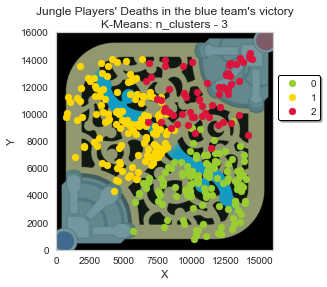

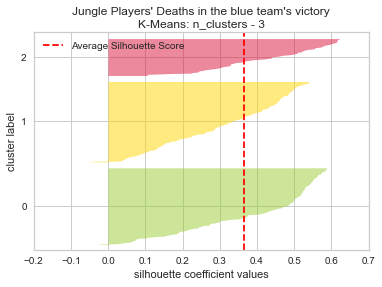

Silhouette score: 0.3653788747585325
1    139
0    132
2     64
Name: cluster, dtype: int64

Inertia: 370.1376553102915

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  10677.159091   4720.659091  -0.537879
1        1   5265.460432   9337.381295  -0.431655
2        2  10813.187500  11417.156250   0.625000

In [417]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "crimson"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [418]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2088.110066   1819.382620   0.644385
1        1   1970.408219   2262.456071   0.635297
2        2   2209.799530   1759.064268   0.484123

In [419]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           13996.0            5638.0            9457.0   
1        1            8668.0             776.0           14070.0   
2        2           14392.0            6608.0           14493.0   

   min coordinate_y  max timestamp  min timestamp  
0             827.0              1             -1  
1            4340.0              1             -1  
2            7507.0              1              0

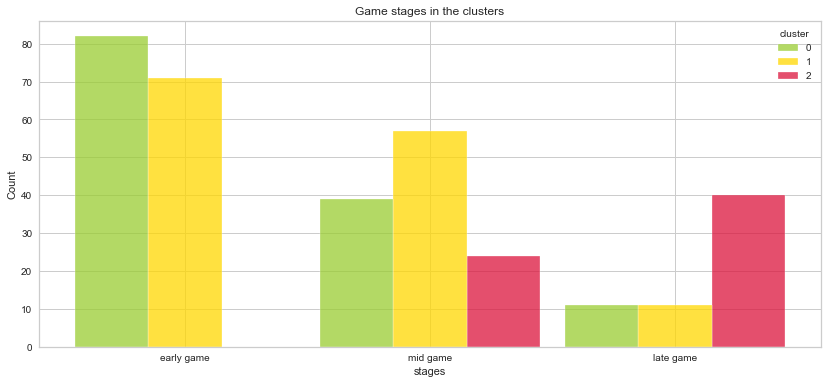

In [420]:
stagesPerClusterV2(blueSideVictory_df, colors)

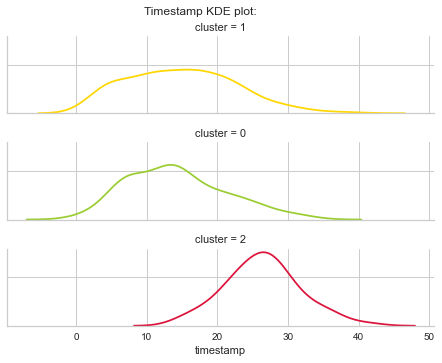

In [421]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [422]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Viego         15
Kayn          15
Belveth       10
Jax            6
Udyr           5
Ekko           3
Evelynn        2
Lillia         2
Khazix         2
Zac            1
Hecarim        1
Sylas          1
Rengar         1
Kindred        1

Deaths with each champion:

In [423]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Viego      77
Kayn       75
Belveth    52
Jax        32
Khazix     19
Udyr       18
Lillia     13
Ekko       13
Kindred     9
Evelynn     8
Sylas       6
Rengar      6
Hecarim     5
Zac         2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [424]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 14 champions when they won on the red side

Cluster 0 - died with 14 champions:
 ['Belveth' 'Ekko' 'Evelynn' 'Hecarim' 'Jax' 'Kayn' 'Khazix' 'Kindred'
 'Lillia' 'Rengar' 'Sylas' 'Udyr' 'Viego' 'Zac']
Viego      38
Kayn       29
Belveth    21
Udyr        8
Jax         8
Khazix      8
Ekko        4
Sylas       4
Evelynn     3
Kindred     3
Zac         2
Lillia      2
Hecarim     1
Rengar      1
Name: champion, dtype: int64

Cluster 1 - died with 13 champions:
 ['Belveth' 'Ekko' 'Evelynn' 'Hecarim' 'Jax' 'Kayn' 'Khazix' 'Kindred'
 'Lillia' 'Rengar' 'Sylas' 'Udyr' 'Viego']
Kayn       34
Viego      24
Belveth    17
Jax        15
Lillia     10
Udyr        9
Khazix      9
Ekko        6
Kindred     6
Hecarim     3
Rengar      3
Evelynn     2
Sylas       1
Name: champion, dtype: int64

Cluster 2 - died with 12 champions:
 ['Belveth' 'Ekko' 'Evelynn' 'Hecarim' 'Jax' 'Kayn' 'Khazix' 'Lillia'
 'Rengar' 'Sylas' 'Udyr' 'Viego']
Viego      15
Belveth    14
Kayn       12
Ja

---
#### Clustering Blue Team Defeat

In [425]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Platinum")]

blueSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team      summoner region champion  timestamp  \
2344   EUW1_6390159523  Blue  anonymous 21   euw1     Kayn   3.197300   
2371   EUW1_6390159523  Blue  anonymous 21   euw1     Kayn  13.872800   
2377   EUW1_6390159523  Blue  anonymous 21   euw1     Kayn  15.049483   
2394   EUW1_6390159523  Blue  anonymous 21   euw1     Kayn  21.097183   
2398   EUW1_6390159523  Blue  anonymous 21   euw1     Kayn  22.798050   
...                ...   ...           ...    ...      ...        ...   
62901  EUW1_6408110315  Blue  anonymous 37   euw1  Belveth  21.259067   
62906  EUW1_6408110315  Blue  anonymous 37   euw1  Belveth  23.801467   
62912  EUW1_6408110315  Blue  anonymous 37   euw1  Belveth  25.873033   
62921  EUW1_6408110315  Blue  anonymous 37   euw1  Belveth  28.635417   
62926  EUW1_6408110315  Blue  anonymous 37   euw1  Belveth  30.324500   

       coordinate_x  coordinate_y  level  minionsKilled  ...  trueDamageTaken  \
2344         4923.0        8839.0    NaN            NaN  ...              NaN   
2371         6474.0        4789.0    NaN            NaN  ...              NaN   
2377        12410.0        5578.0    NaN            NaN  ...              NaN   
2394         6785.0        7625.0    NaN            NaN  ...              NaN   
2398         6223.0        6324.0    NaN            NaN  ...              NaN   
...             ...           ...    ...            ...  ...              ...   
62901        4736.0       13613.0    NaN            NaN  ...              NaN   
62906        2416.0        9932.0    NaN            NaN  ...              NaN   
62912        5745.0        9152.0    NaN            NaN  ...              NaN   
62921        4422.0        4586.0    NaN            NaN  ...              NaN   
62926        5380.0        9262.0    NaN            NaN  ...              NaN   

       victory  eventType  skillSlot  buildingType  lane  monster  itemName  \
2344     False      Death        NaN           NaN   NaN      NaN       NaN   
2371     False      Death        NaN           NaN   NaN      NaN       NaN   
2377     False      Death        NaN           NaN   NaN      NaN       NaN   
2394     False      Death        NaN           NaN   NaN      NaN       NaN   
2398     False      Death        NaN           NaN   NaN      NaN       NaN   
...        ...        ...        ...           ...   ...      ...       ...   
62901    False      Death        NaN           NaN   NaN      NaN       NaN   
62906    False      Death        NaN           NaN   NaN      NaN       NaN   
62912    False      Death        NaN           NaN   NaN      NaN       NaN   
62921    False      Death        NaN           NaN   NaN      NaN       NaN   
62926    False      Death        NaN           NaN   NaN      NaN       NaN   

         role      rank  
2344   JUNGLE  Platinum  
2371   JUNGLE  Platinum  
2377   JUNGLE  Platinum  
2394   JUNGLE  Platinum  
2398   JUNGLE  Platinum  
...       ...       ...  
62901  JUNGLE  Platinum  
62906  JUNGLE  Platinum  
62912  JUNGLE  Platinum  
62921  JUNGLE  Platinum  
62926  JUNGLE  Platinum  

[433 rows x 56 columns]

In [426]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)].copy()

In [427]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 21 lost 24 matches on the blue side
anonymous 21 has an average of 7.25 deaths per game when losing on the blue side

anonymous 22 lost 5 matches on the blue side
anonymous 22 has an average of 8.4 deaths per game when losing on the blue side

anonymous 34 lost 9 matches on the blue side
anonymous 34 has an average of 7.444444444444445 deaths per game when losing on the blue side

anonymous 36 lost 6 matches on the blue side
anonymous 36 has an average of 8.166666666666666 deaths per game when losing on the blue side

anonymous 37 lost 12 matches on the blue side
anonymous 37 has an average of 8.416666666666666 deaths per game when losing on the blue side



In [428]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 56 matches in which the jungler died at least once
5 players died a total of 433 times on the blue side
Defeat games on blue side contains an average of 7.732142857142857 deaths per game


In [429]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
2344         4923.0        8839.0   3.197300
2371         6474.0        4789.0  13.872800
2377        12410.0        5578.0  15.049483
2394         6785.0        7625.0  21.097183
2398         6223.0        6324.0  22.798050
...             ...           ...        ...
62901        4736.0       13613.0  21.259067
62906        2416.0        9932.0  23.801467
62912        5745.0        9152.0  25.873033
62921        4422.0        4586.0  28.635417
62926        5380.0        9262.0  30.324500

[433 rows x 3 columns]

Time discretization

In [430]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [431]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [432]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [433]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [434]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
2344      -0.662753      0.777952         -1
2371      -0.214339     -0.490493         -1
2377       1.501833     -0.243381          0
2394      -0.124425      0.397732          0
2398      -0.286907     -0.009737          0
...             ...           ...        ...
62901     -0.716817      2.273150          0
62906     -1.387558      1.120275          0
62912     -0.425102      0.875982          1
62921     -0.807598     -0.554071          1
62926     -0.530628      0.910434          1

[433 rows x 3 columns]

In [435]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.32345710028278135
Silhouette score for k=3: 0.31710828781529327
Silhouette score for k=4: 0.3463783745805299
Silhouette score for k=5: 0.33297112938799744
Silhouette score for k=6: 0.33943430315541295
Silhouette score for k=7: 0.3352526193621379
Silhouette score for k=8: 0.3449790445368722
Silhouette score for k=9: 0.34701218814871354
Silhouette score for k=10: 0.36147475251011885
Silhouette score for k=11: 0.3463242416667308
Silhouette score for k=12: 0.3553249061277038
Silhouette score for k=13: 0.3688826609345497
Silhouette score for k=14: 0.37078994562037415
Silhouette score for k=15: 0.3744981599794648
Silhouette score for k=16: 0.38146210981936074
Silhouette score for k=17: 0.373858455964249
Silhouette score for k=18: 0.38223935371348744
Silhouette score for k=19: 0.3816191869956427
Silhouette score for k=20: 0.39316651375273265
Silhouette score for k=25: 0.40375056899086503


K-Means with k = 3

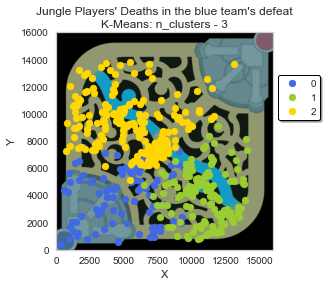

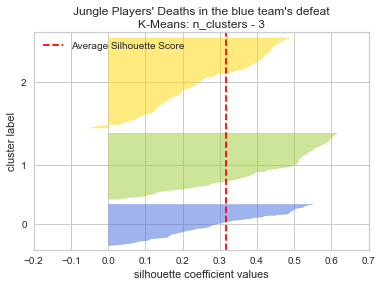

Silhouette score: 0.31710828781529327
2    197
1    145
0     91
Name: cluster, dtype: int64

Inertia: 543.0675117303847

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   4901.681319   3938.164835   0.582418
1        1  10857.641379   4063.179310  -0.427586
2        2   5603.269036   9158.472081  -0.208122

In [436]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "yellowgreen", "gold"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [437]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2451.069060   2004.542508   0.514962
1        1   1614.640324   1799.388213   0.682236
2        2   2601.106872   1935.036973   0.742020

In [438]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            9303.0             394.0            7581.0   
1        1           14076.0            6474.0            9136.0   
2        2           13065.0             726.0           13803.0   

   min coordinate_y  max timestamp  min timestamp  
0             461.0              1             -1  
1             784.0              1             -1  
2            5158.0              1             -1

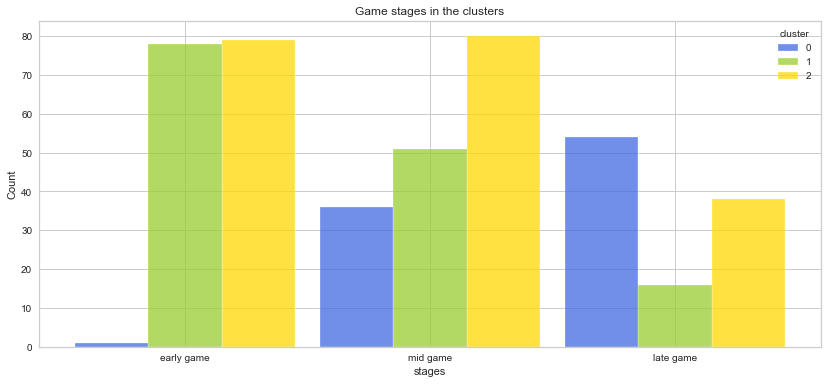

In [439]:
stagesPerClusterV2(blueSideDefeat_df, colors)

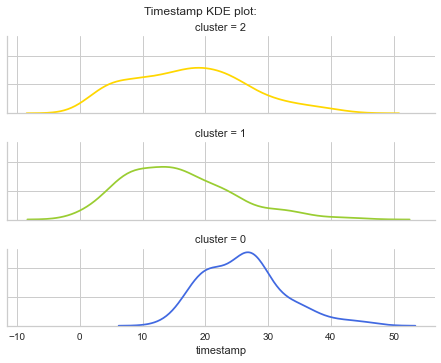

In [440]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [441]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Kayn           16
Viego          10
Belveth         8
Udyr            5
Ekko            4
Sylas           3
Jax             2
Khazix          2
Neeko           1
Hecarim         1
JarvanIV        1
Gragas          1
Evelynn         1
Rammus          1

Deaths with each champion:

In [442]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Kayn        104
Viego        88
Belveth      51
Udyr         39
Sylas        34
Ekko         34
Jax          19
Khazix       18
Hecarim      10
Neeko        10
Rammus        9
JarvanIV      7
Gragas        5
Evelynn       5
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [443]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 14 champions when they won on the red side

Cluster 0 - died with 11 champions:
 ['Belveth' 'Ekko' 'Hecarim' 'Jax' 'Kayn' 'Khazix' 'Neeko' 'Rammus' 'Sylas'
 'Udyr' 'Viego']
Kayn       20
Viego      20
Belveth    13
Ekko        9
Udyr        8
Sylas       7
Neeko       4
Jax         4
Rammus      3
Hecarim     2
Khazix      1
Name: champion, dtype: int64

Cluster 1 - died with 14 champions:
 ['Belveth' 'Ekko' 'Evelynn' 'Gragas' 'Hecarim' 'JarvanIV' 'Jax' 'Kayn'
 'Khazix' 'Neeko' 'Rammus' 'Sylas' 'Udyr' 'Viego']
Kayn        36
Viego       28
Belveth     15
Sylas       13
Udyr        11
Khazix       9
Ekko         8
Jax          6
Hecarim      4
JarvanIV     4
Rammus       4
Gragas       3
Neeko        2
Evelynn      2
Name: champion, dtype: int64

Cluster 2 - died with 14 champions:
 ['Belveth' 'Ekko' 'Evelynn' 'Gragas' 'Hecarim' 'JarvanIV' 'Jax' 'Kayn'
 'Khazix' 'Neeko' 'Rammus' 'Sylas' 'Udyr' 'Viego']
Kayn        48
Viego       40
Belveth     23
Udyr        

---

### Blue Win Rate vs Red Win Rate

In [9]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death")]

wins_df = jungler_deaths_df[jungler_deaths_df["victory"] == True]
wins_df

gameId  team       summoner region  champion  timestamp  \
476    EUW1_6389189627   Red    anonymous 8   euw1  JarvanIV   7.085800   
490    EUW1_6389189627   Red    anonymous 8   euw1  JarvanIV  12.553583   
524    EUW1_6389189627   Red    anonymous 8   euw1  JarvanIV  23.419633   
537    EUW1_6389189627   Red    anonymous 8   euw1  JarvanIV  27.492133   
544    EUW1_6389189627   Red    anonymous 8   euw1  JarvanIV  30.037567   
...                ...   ...            ...    ...       ...        ...   
63923  EUW1_6407724842  Blue  anonymous 155   euw1      Kayn  19.345400   
63995  EUW1_6407810599   Red  anonymous 172   euw1     Viego  19.547567   
64004  EUW1_6407810599   Red  anonymous 172   euw1     Viego  25.212050   
64012  EUW1_6407810599   Red  anonymous 172   euw1     Viego  27.111500   
64019  EUW1_6407810599   Red  anonymous 172   euw1     Viego  30.194417   

       coordinate_x  coordinate_y  level  minionsKilled  ...  trueDamageTaken  \
476         13316.0        4381.0    NaN            NaN  ...              NaN   
490          1556.0       11508.0    NaN            NaN  ...              NaN   
524          6943.0       12893.0    NaN            NaN  ...              NaN   
537         12014.0        1921.0    NaN            NaN  ...              NaN   
544          9956.0        6567.0    NaN            NaN  ...              NaN   
...             ...           ...    ...            ...  ...              ...   
63923        6868.0        4248.0    NaN            NaN  ...              NaN   
63995       13405.0        3908.0    NaN            NaN  ...              NaN   
64004        8455.0        9787.0    NaN            NaN  ...              NaN   
64012        7934.0        8580.0    NaN            NaN  ...              NaN   
64019        6263.0        7130.0    NaN            NaN  ...              NaN   

       victory  eventType  skillSlot  buildingType  lane  monster  itemName  \
476       True      Death        NaN           NaN   NaN      NaN       NaN   
490       True      Death        NaN           NaN   NaN      NaN       NaN   
524       True      Death        NaN           NaN   NaN      NaN       NaN   
537       True      Death        NaN           NaN   NaN      NaN       NaN   
544       True      Death        NaN           NaN   NaN      NaN       NaN   
...        ...        ...        ...           ...   ...      ...       ...   
63923     True      Death        NaN           NaN   NaN      NaN       NaN   
63995     True      Death        NaN           NaN   NaN      NaN       NaN   
64004     True      Death        NaN           NaN   NaN      NaN       NaN   
64012     True      Death        NaN           NaN   NaN      NaN       NaN   
64019     True      Death        NaN           NaN   NaN      NaN       NaN   

         role  rank  
476    JUNGLE  Iron  
490    JUNGLE  Iron  
524    JUNGLE  Iron  
537    JUNGLE  Iron  
544    JUNGLE  Iron  
...       ...   ...  
63923  JUNGLE  Gold  
63995  JUNGLE  Gold  
64004  JUNGLE  Gold  
64012  JUNGLE  Gold  
64019  JUNGLE  Gold  

[1837 rows x 56 columns]

In [10]:
wins = len(np.unique(wins_df["gameId"]))
wins

364

In [11]:
b = (winsBlueSide/ wins) * 100
r = (winsRedSide/ wins) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 44.505494505494504 vs Blue: 55.494505494505496


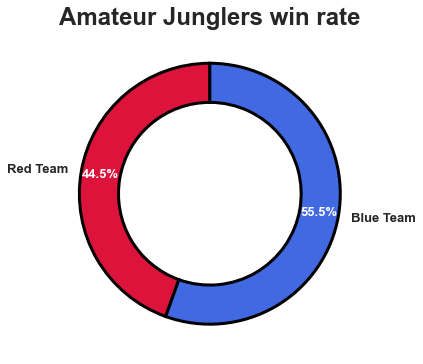

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))
 
wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':3}

_, texts, autotexts = ax.pie([r,b], 
       wedgeprops= wedgeprops, 
       startangle=90,
       labels=["Red Team", "Blue Team"],
       autopct='%1.1f%%',
       pctdistance=0.85,
       colors=['crimson', 'royalblue'])

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight("bold")
    autotext.set_fontsize(13)

texts[0].set_fontsize(13)
texts[1].set_fontsize(13)
texts[0].set_fontweight("bold")
texts[1].set_fontweight("bold")

plt.title('Amateur Junglers win rate', fontsize=24, loc='center', fontweight="bold")

plt.show()